In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE

## Data Exploration and Preprocessing

In [3]:
# Read the Dataset
df = pd.read_excel('World_development_mesurement (1).xlsx')
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [4]:
# Renaming columns
df.rename({'Birth Rate':'Birth_Rate',
           'Business Tax Rate':'Business_Tax_Rate',
           'CO2 Emissions':'CO2_Emissions',
           'Days to Start Business':'Days_to_Start_Business',
           'Ease of Business':'Ease_of_Business',
           'Energy Usage':'Energy_Usage',
           'Health Exp % GDP':'Health_Exp_GDP',
           'Health Exp/Capita':'Health_Exp_per_Capita',
           'Hours to do Tax':'Hours_to_do_Tax',
           'Infant Mortality Rate':'Infant_Mortality_Rate',
           'Internet Usage':'Internet_Usage',
           'Lending Interest':'Lending_Interest',
           'Life Expectancy Female':'Life_Expectancy_Female',
           'Life Expectancy Male':'Life_Expectancy_Male',
           'Mobile Phone Usage':'Mobile_Phone_Usage',
           'Number of Records':'Number_of_Records',
           'Population 0-14':'Population_0_to_14',
           'Population 15-64':'Population_15_to_64',
           'Population 65+':'Population_above_65',
           'Population Total':'Population_Total',
           'Population Urban':'Population_Urban',
           'Tourism Inbound':'Tourism_Inbound',
           'Tourism Outbound':'Tourism_Outbound'}, axis=1, inplace=True)
df

Birth_Rate Business_Tax_Rate  CO2_Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days_to_Start_Business  Ease_of_Business  Energy_Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health_Exp_GDP Health_Exp_per_Capita  ...  \
0         $54,790,058,957           0.035                   $60  ...   
1          $9,129,594,819           0.034                   $22  ...   
2          $2,359,122,303           0.043                   $15  ...   
3          $5,788,311,645           0.047                  $152  ...   
4          $2,610,959,139           0.051                   $12  ...   
...                   ...             ...                   ...  ...   
2699                  NaN             NaN                   NaN  ...   
2700  $16,244,600,000,000           0.179                $8,895  ...   
2701      $50,004,354,667           0.089                $1,308  ...   
2702     $381,286,223,859           0.046                  $593  ...   
2703                  NaN             NaN                   NaN  ...   

      Life_Expectancy_Male  Mobile_Phone_Usage  Number_of_Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population_0_to_14  Population_15_to_64  Population_above_65  \
0                  0.342                0.619                0.039   
1                  0.476                0.499                0.025   
2                  0.454                0.517                0.029   
3                  0.383                0.587                0.029   
4                  0.468                0.505                0.028   
...                  ...                  ...                  ...   
2699                 NaN                  NaN                  NaN   
2700               0.196          

### Feature descriptions:
- Birth Rate:- The number of live births per 1000 people in a given population.
- Business Tax Rate:- The percentage of profits that a buisness has to pay in taxes to the government.
- CO2 Emissions:- The amount of carbon dioxide released into the atmosphere, primarily from burning of fossil fuels.
- Days to Start Business:- The number of days required to complete the procedures to legally operate a buisness.
- Ease of Business:- An index that assesses the regulatory environment and how easy it is to start and operate a business in a country.
- Energy Usage:- The total amount of energy consumed by a country or region. Typically measured in units like kWh or joules.
- GDP:- The total monetary value of all goods and services produced within a country's borders in a specific time period.
- Health Exp % GDP:- The percentage of a country's GDP spent on healthcare.
- Health Exp/Capita:- The average healthcare expenditure per person in a country.
- Hours to do Tax:- The average number of hours a business or individual spends to comply with tax regulations.
- Infant Mortality Rate:- The number of deaths of infants under one year old per 1000 live births.
- Internet Usage:- The percentage of a country's population that has access to the internet.
- Lending Intrest:- The intrest rate at which banks lend to each other or to the central bank.
- Life Expectancy Female/Male:- The average number of years a female/male is expected to live from birth.
- Mobile Phone Usage:- The percentage of population that uses mobile phones.
- Population 0-14, 15-64, 65+:- The population distribution across age groups. Measured as a percentage of total population.
- Population Total:- The total number of people living in a country.
- Population Urban:- The percentage of population living in urban areas.
- Tourism Inbound/Outbound:- The number of visitors entering/leaving a country for tourism.

In [5]:
# Creating copy of original dataset for our analysis
df1 = df.copy()
df1

Birth_Rate Business_Tax_Rate  CO2_Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days_to_Start_Business  Ease_of_Business  Energy_Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health_Exp_GDP Health_Exp_per_Capita  ...  \
0         $54,790,058,957           0.035                   $60  ...   
1          $9,129,594,819           0.034                   $22  ...   
2          $2,359,122,303           0.043                   $15  ...   
3          $5,788,311,645           0.047                  $152  ...   
4          $2,610,959,139           0.051                   $12  ...   
...                   ...             ...                   ...  ...   
2699                  NaN             NaN                   NaN  ...   
2700  $16,244,600,000,000           0.179                $8,895  ...   
2701      $50,004,354,667           0.089                $1,308  ...   
2702     $381,286,223,859           0.046                  $593  ...   
2703                  NaN             NaN                   NaN  ...   

      Life_Expectancy_Male  Mobile_Phone_Usage  Number_of_Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population_0_to_14  Population_15_to_64  Population_above_65  \
0                  0.342                0.619                0.039   
1                  0.476                0.499                0.025   
2                  0.454                0.517                0.029   
3                  0.383                0.587                0.029   
4                  0.468                0.505                0.028   
...                  ...                  ...                  ...   
2699                 NaN                  NaN                  NaN   
2700               0.196          

In [6]:
# Total Rows and Columns
df1.shape

(2704, 25)

In [7]:
# Display basic information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2585 non-null   float64
 1   Business_Tax_Rate       1423 non-null   object 
 2   CO2_Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days_to_Start_Business  1718 non-null   float64
 5   Ease_of_Business        185 non-null    float64
 6   Energy_Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health_Exp_GDP          2395 non-null   float64
 9   Health_Exp_per_Capita   2395 non-null   object 
 10  Hours_to_do_Tax         1416 non-null   float64
 11  Infant_Mortality_Rate   2444 non-null   float64
 12  Internet_Usage          2531 non-null   float64
 13  Lending_Interest        1880 non-null   float64
 14  Life_Expectancy_Female  2568 non-null   

In [8]:
# Descriptive Statistics
df1.describe()

Birth_Rate  CO2_Emissions  Days_to_Start_Business  Ease_of_Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy_Usage  Health_Exp_GDP  Hours_to_do_Tax  Infant_Mortality_Rate  \
count  1.785000e+03     2395.000000      1416.000000            2444.000000   
mean   7.723684e+04        0.064170       302.068503               0.032813   
std    2.599239e+05        0.026325       273.299686               0.029968   
min    8.000000e+00        0.008000        12.000000               0.002000   
25%    3.737000e+03        0.046000       156.000000               0.009000   
50%    1.433800e+04        0.061000       239.000000               0.020000   
75%    4.185200e+04        0.079000       344.750000               0.053000   
max    2.727728e+06        0.225000      2600.000000               0.141000   

       Internet_Usage  Lending_Interest  Life_Expectancy_Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life_Expectancy_Male  Mobile_Phone_Usage  Number_of_Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population_0_to_14  Population_15_to_64  Population_above_65  \
count         2484.000000          2484.000000          2484.000000   
mean             0.303051             0.623481             0.073465   
std              0.106577             0.069660             0.049541   
min              0.118000             0.474000             0.003000   
25%              0.204750             0.559000             0.033000   
50%              0.299500             0.642500             0.052000   
75%              0.402000             0.676000             0.112000   
max              0.500000             0.858000             0.244000   

       Population_Total  Population_Urban  
count      2.704000e+03       2678.000000  
mean       3.145729e+07          0.562953  
std        1.242894e+08          0.245897  
min        1.887600e+04          0.082000  
25%        8.783360e+05          0.356000  
50%        5.800324e+06          0.560000  
75%        2.014089e+07          0.765000  
max        1.350695e+09          1.000000

In [9]:
# Checking duplicated values
df1[df1.duplicated()].shape

(0, 25)

##### There are no duplicated values in the dataset.

In [10]:
# Remove '%' and '$' symbols from specific columns
df1['Business_Tax_Rate'] = df1['Business_Tax_Rate'].str.rstrip('%').astype('float') / 100
df1['GDP'] = df1['GDP'].replace('[\$,]', '', regex=True).astype('float')
df1['Health_Exp_per_Capita'] = df1['Health_Exp_per_Capita'].replace('[\$,]', '', regex=True).astype('float')
df1['Tourism_Inbound'] = df1['Tourism_Inbound'].replace('[\$,]', '', regex=True).astype('float')
df1['Tourism_Outbound'] = df1['Tourism_Outbound'].replace('[\$,]', '', regex=True).astype('float')

### Data distribution and outliers

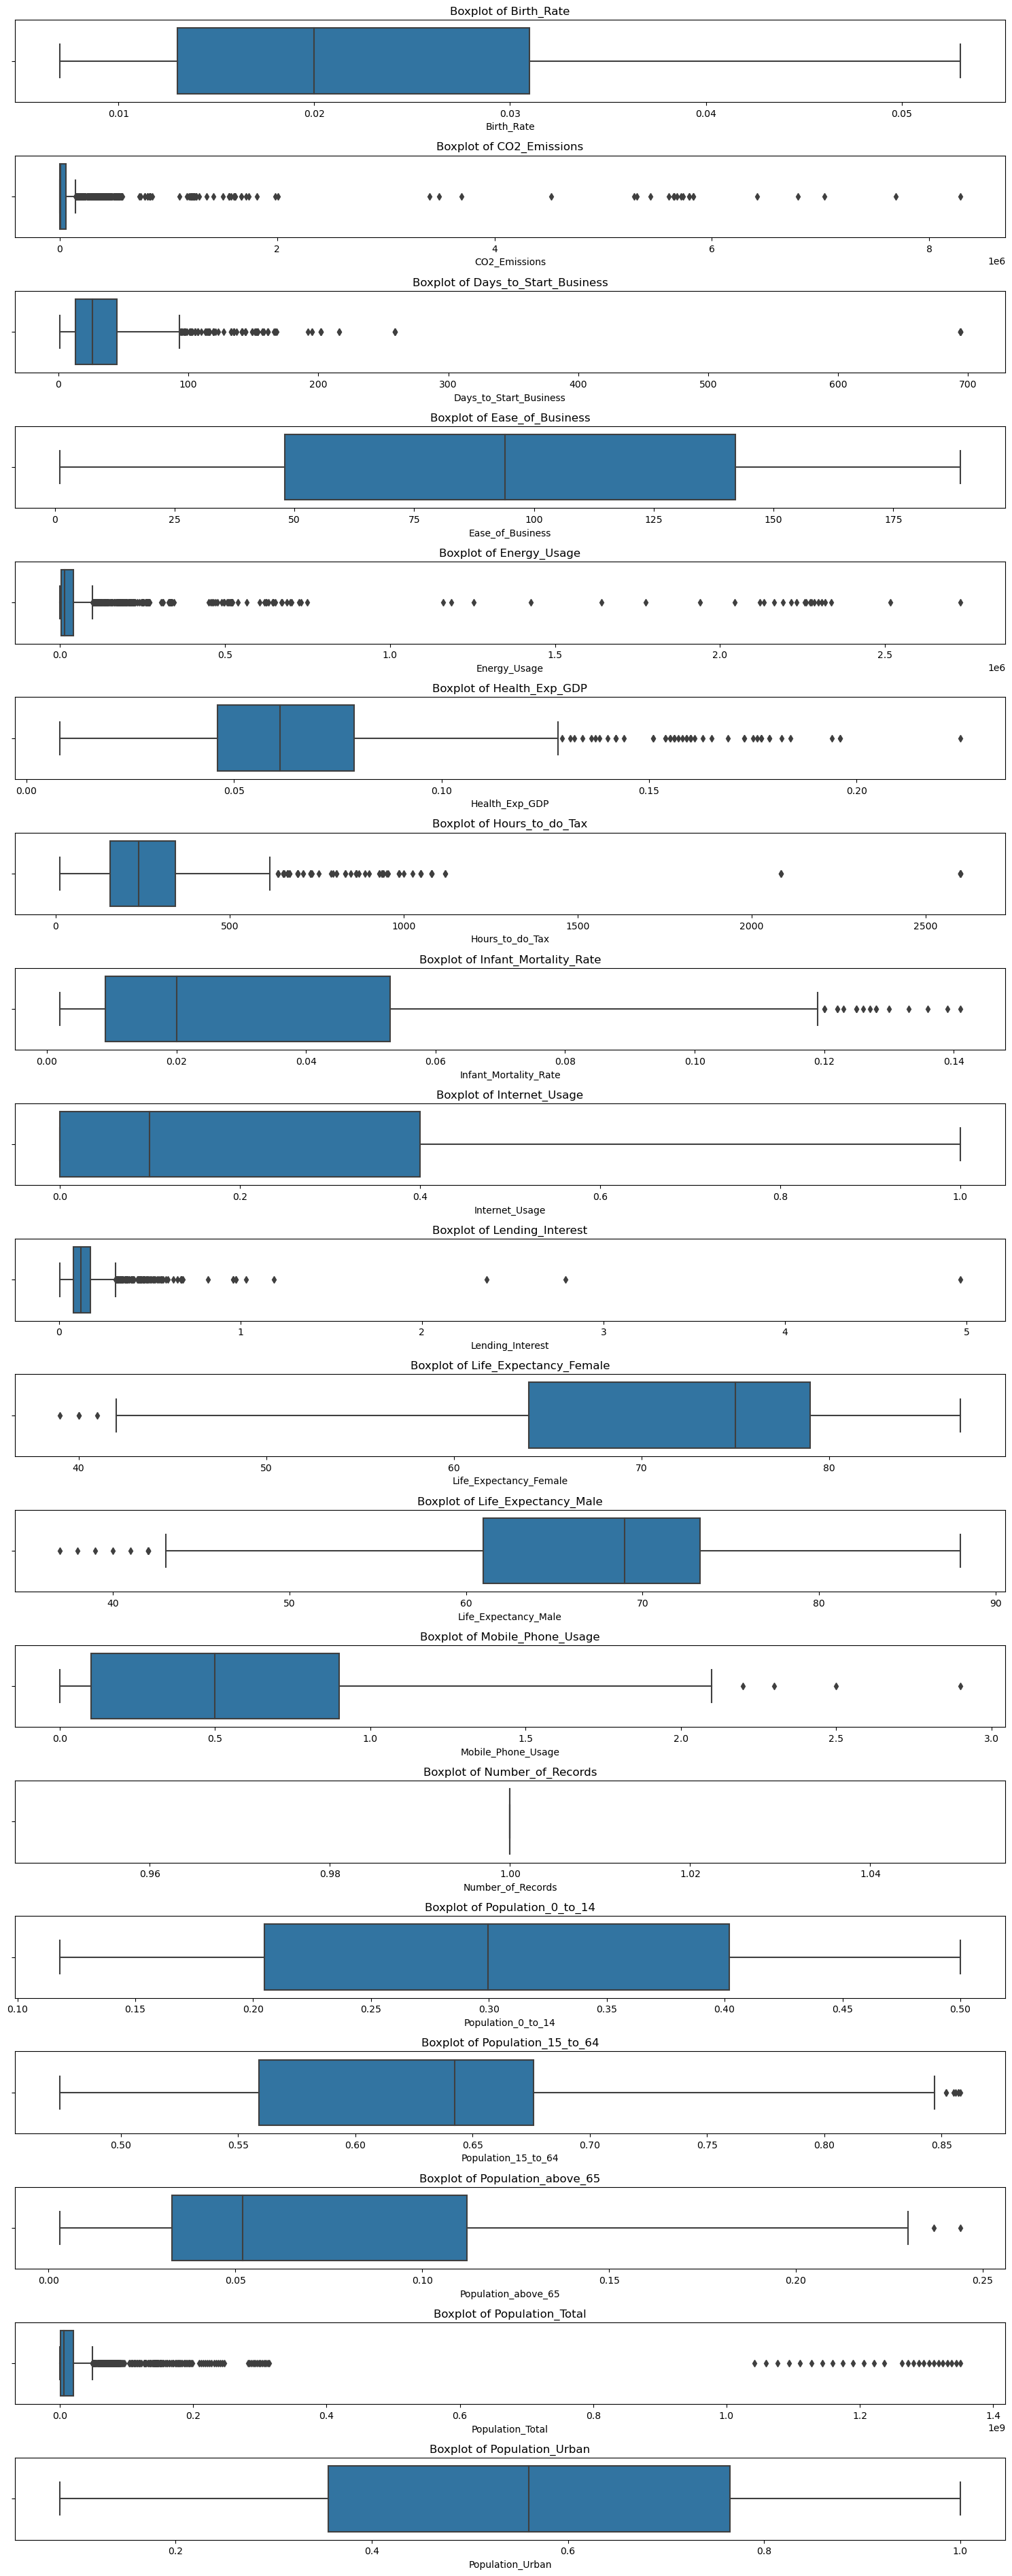

In [11]:
# Boxplots for each numerical column
numerical_columns = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(15, 2 * len(numerical_columns)))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

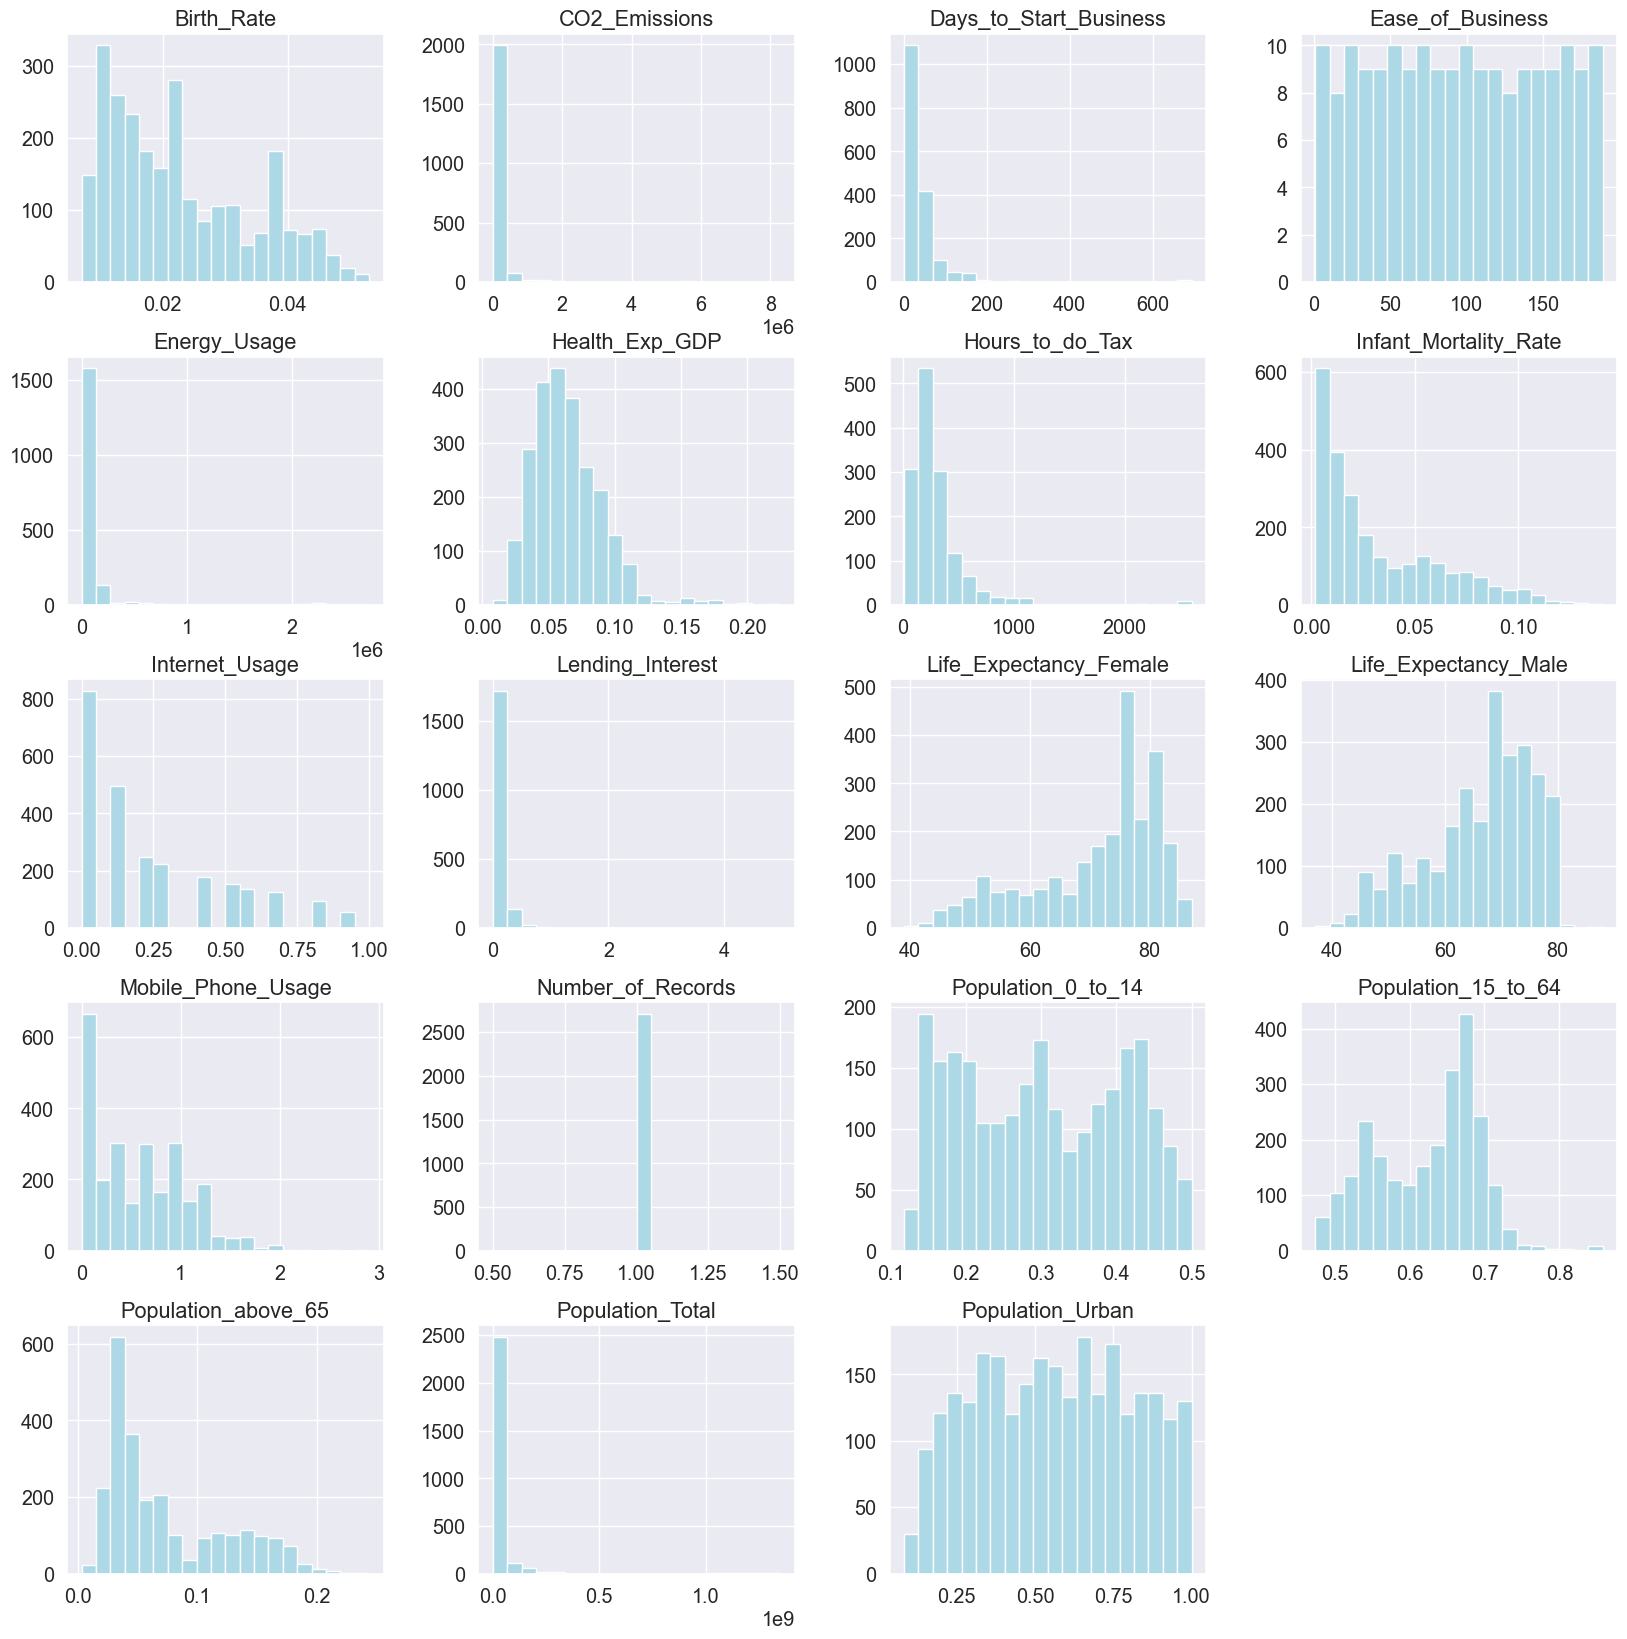

In [12]:
# Histogram to display distribution
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='lightblue' )

### Handling Missing Values

In [13]:
# Check for null values
df1.isnull().sum()

Birth_Rate                 119
Business_Tax_Rate         1281
CO2_Emissions              579
Country                      0
Days_to_Start_Business     986
Ease_of_Business          2519
Energy_Usage               919
GDP                        210
Health_Exp_GDP             309
Health_Exp_per_Capita      309
Hours_to_do_Tax           1288
Infant_Mortality_Rate      260
Internet_Usage             173
Lending_Interest           824
Life_Expectancy_Female     136
Life_Expectancy_Male       136
Mobile_Phone_Usage         167
Number_of_Records            0
Population_0_to_14         220
Population_15_to_64        220
Population_above_65        220
Population_Total             0
Population_Urban            26
Tourism_Inbound            368
Tourism_Outbound           471
dtype: int64

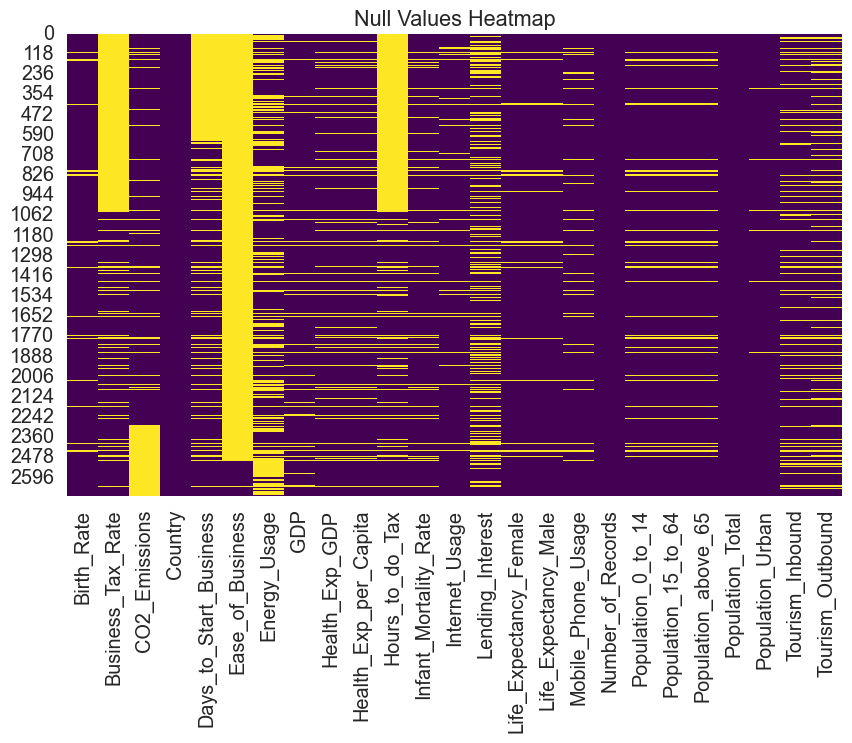

In [14]:
# Heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

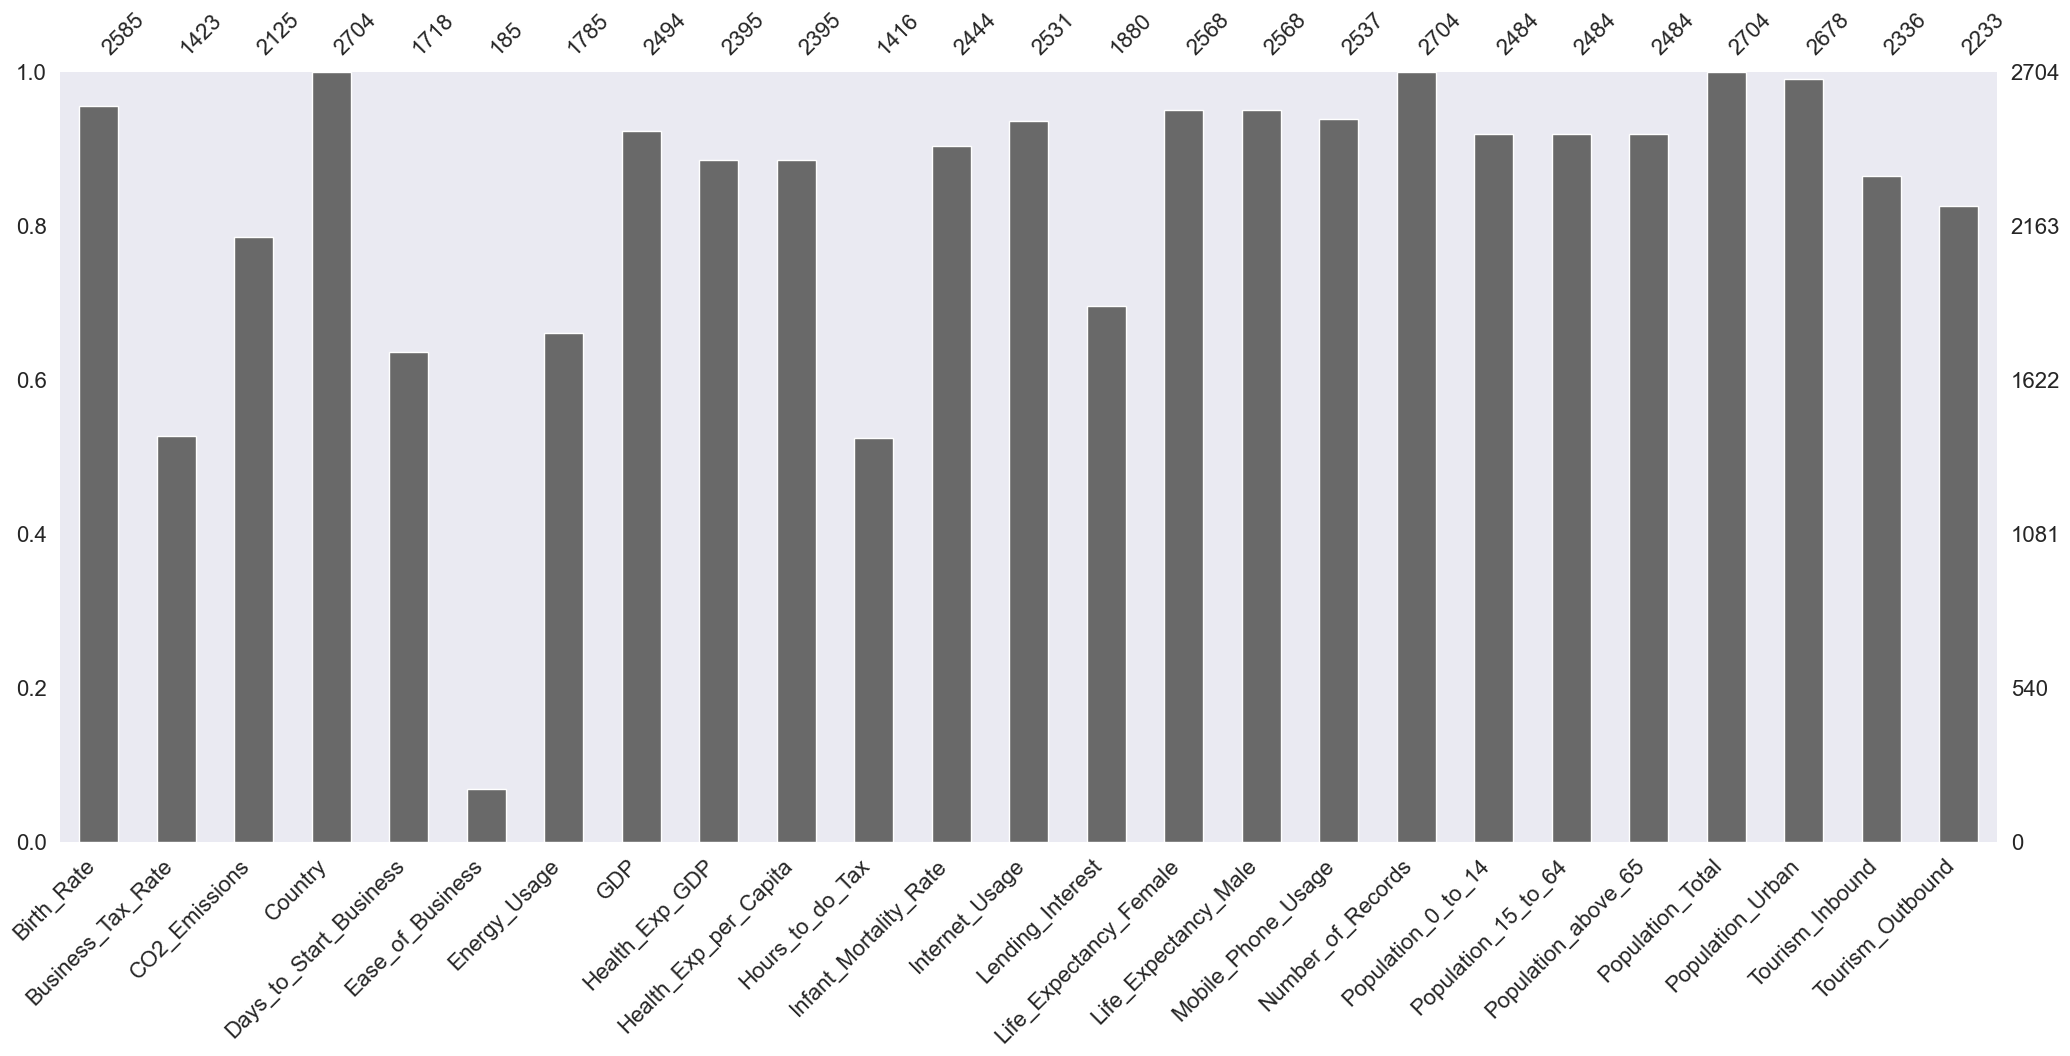

In [15]:
# Missing value plot displaying missing values present in each column
msno.bar(df1)
plt.show()

In [16]:
# Percentage of missing values present in each column
missing_percentage = df1.isnull().mean() * 100
print(missing_percentage)

Birth_Rate                 4.400888
Business_Tax_Rate         47.374260
CO2_Emissions             21.412722
Country                    0.000000
Days_to_Start_Business    36.464497
Ease_of_Business          93.158284
Energy_Usage              33.986686
GDP                        7.766272
Health_Exp_GDP            11.427515
Health_Exp_per_Capita     11.427515
Hours_to_do_Tax           47.633136
Infant_Mortality_Rate      9.615385
Internet_Usage             6.397929
Lending_Interest          30.473373
Life_Expectancy_Female     5.029586
Life_Expectancy_Male       5.029586
Mobile_Phone_Usage         6.176036
Number_of_Records          0.000000
Population_0_to_14         8.136095
Population_15_to_64        8.136095
Population_above_65        8.136095
Population_Total           0.000000
Population_Urban           0.961538
Tourism_Inbound           13.609467
Tourism_Outbound          17.418639
dtype: float64


In [17]:
# Count of unique values in each column
for column in df1.columns:
    unique_count = df1[column].nunique()
    print(f"Number of unique values in {column} column: {unique_count}")

Number of unique values in Birth_Rate column: 47
Number of unique values in Business_Tax_Rate column: 447
Number of unique values in CO2_Emissions column: 1743
Number of unique values in Country column: 208
Number of unique values in Days_to_Start_Business column: 126
Number of unique values in Ease_of_Business column: 185
Number of unique values in Energy_Usage column: 1721
Number of unique values in GDP column: 2494
Number of unique values in Health_Exp_GDP column: 145
Number of unique values in Health_Exp_per_Capita column: 1069
Number of unique values in Hours_to_do_Tax column: 280
Number of unique values in Infant_Mortality_Rate column: 129
Number of unique values in Internet_Usage column: 11
Number of unique values in Lending_Interest column: 351
Number of unique values in Life_Expectancy_Female column: 49
Number of unique values in Life_Expectancy_Male column: 47
Number of unique values in Mobile_Phone_Usage column: 26
Number of unique values in Number_of_Records column: 1
Numbe

In [18]:
# As we can observe Ease_of_Business column has 93.15% missing values and Number_of_Records column has only one unique value, so we will drop those columns.
# Drop columns not required
df1 = df1.drop(['Ease_of_Business', 'Number_of_Records'], axis=1)
df1

Birth_Rate  Business_Tax_Rate  CO2_Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013              0.464            NaN             United States   
2701       0.015              0.419            NaN                   Uruguay   
2702       0.020              0.619            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_GDP  \
0                        NaN       26998.0  5.479006e+10           0.035   
1                        NaN        7499.0  9.129595e+09           0.034   
2                        NaN        1983.0  2.359122e+09           0.043   
3                        NaN        1836.0  5.788312e+09           0.047   
4                        NaN           NaN  2.610959e+09           0.051   
...                      ...           ...           ...             ...   
2699                     NaN           NaN           NaN             NaN   
2700                     5.0     2132446.0  1.624460e+13           0.179   
2701                     7.0           NaN  5.000435e+10           0.089   
2702                   144.0           NaN  3.812862e+11           0.046   
2703                     NaN           NaN           NaN             NaN   

      Health_Exp_per_Capita  Hours_to_do_Tax  ...  Life_Expectancy_Female  \
0                      60.0              NaN  ...                    71.0   
1                      22.0              NaN  ...                    47.0   
2                      15.0              NaN  ...                    57.0   
3                     152.0              NaN  ...                    52.0   
4                      12.0              NaN  ...                    52.0   
...                     ...              ...  ...                     ...   
2699                    NaN              NaN  ...                     NaN   
2700                 8895.0            175.0  ...                    81.0   
2701                 1308.0            310.0  ...                    80.0   
2702                  593.0            792.0  ...                    78.0   
2703                    NaN              NaN  ...                    83.0   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0_to_14  \
0                     67.0                 0.0               0.342   
1                     44.0                 0.0               0.476   
2                     53.0                 0.0               0.454   
3                     49.0                 0.1               0.383   
4                     49.0                 0.0               0.468   
...                    ...                 ...                 ...   
2699                   NaN                 NaN                 NaN   
2700                  76.0                 1.0               0.196   
2701                  74.0                 1.5               0.220   
2702                  72.0                 1.0               0.288   
2703                  76.0                 NaN               0.206   

      Population_15_to_64  Population_above_65  Population_Total  \
0                   0.619                0.039          31719449   
1                   0.499                0.025          13924930   
2                   0.517                0.029           6949366   
3                   0.587                0.029           1755375   
4                   0.505 

In [19]:
# Calculate skewness for each numeric column
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) == 0:
    print("No numeric columns found.")
else:
    skewness_data = df1[numeric_cols].skew()
    print("Skewness for each column:")
    for col, skew_val in skewness_data.items():
        print(f"{col}: {skew_val}")

Skewness for each column:
Birth_Rate: 0.6621510380354036
Business_Tax_Rate: 4.342567887753289
CO2_Emissions: 8.654038731705004
Days_to_Start_Business: 7.437591899372352
Energy_Usage: 7.062229552511793
GDP: 9.424246663041874
Health_Exp_GDP: 1.1797571226709336
Health_Exp_per_Capita: 2.817482102813476
Hours_to_do_Tax: 4.491308245177779
Infant_Mortality_Rate: 1.0491183898119616
Internet_Usage: 0.9409664473188067
Lending_Interest: 15.536119446749021
Life_Expectancy_Female: -0.8915562819063326
Life_Expectancy_Male: -0.7054848933236255
Mobile_Phone_Usage: 0.5696054197192167
Population_0_to_14: 0.05965959320605741
Population_15_to_64: -0.18688062210003248
Population_above_65: 0.9198414105956375
Population_Total: 8.788164352982424
Population_Urban: 0.01251875044249089
Tourism_Inbound: 7.114871156585484
Tourism_Outbound: 5.210304234697493


In [20]:
# Transfrom Country column using label encoder
label_encoder = LabelEncoder()
df1['Country']= label_encoder.fit_transform(df1['Country'])

In [21]:
# Mapping which country has been assigned what value
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'American Samoa': 3,
 'Andorra': 4,
 'Angola': 5,
 'Antigua and Barbuda': 6,
 'Argentina': 7,
 'Armenia': 8,
 'Aruba': 9,
 'Australia': 10,
 'Austria': 11,
 'Azerbaijan': 12,
 'Bahamas, The': 13,
 'Bahrain': 14,
 'Bangladesh': 15,
 'Barbados': 16,
 'Belarus': 17,
 'Belgium': 18,
 'Belize': 19,
 'Benin': 20,
 'Bermuda': 21,
 'Bhutan': 22,
 'Bolivia': 23,
 'Bosnia and Herzegovina': 24,
 'Botswana': 25,
 'Brazil': 26,
 'Brunei Darussalam': 27,
 'Bulgaria': 28,
 'Burkina Faso': 29,
 'Burundi': 30,
 'Cambodia': 31,
 'Cameroon': 32,
 'Canada': 33,
 'Cayman Islands': 34,
 'Central African Republic': 35,
 'Chad': 36,
 'Chile': 37,
 'China': 38,
 'Colombia': 39,
 'Comoros': 40,
 'Congo, Dem. Rep.': 41,
 'Congo, Rep.': 42,
 'Costa Rica': 43,
 "Cote d'Ivoire": 44,
 'Croatia': 45,
 'Cuba': 46,
 'Curacao': 47,
 'Cyprus': 48,
 'Czech Republic': 49,
 'Denmark': 50,
 'Djibouti': 51,
 'Dominica': 52,
 'Dominican Republic': 53,
 'Ecuador': 54,
 'Egypt, A

In [22]:
# New info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2585 non-null   float64
 1   Business_Tax_Rate       1423 non-null   float64
 2   CO2_Emissions           2125 non-null   float64
 3   Country                 2704 non-null   int32  
 4   Days_to_Start_Business  1718 non-null   float64
 5   Energy_Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health_Exp_GDP          2395 non-null   float64
 8   Health_Exp_per_Capita   2395 non-null   float64
 9   Hours_to_do_Tax         1416 non-null   float64
 10  Infant_Mortality_Rate   2444 non-null   float64
 11  Internet_Usage          2531 non-null   float64
 12  Lending_Interest        1880 non-null   float64
 13  Life_Expectancy_Female  2568 non-null   float64
 14  Life_Expectancy_Male    2568 non-null   

##### We can observe that all column datatype has been converted to numeric.

In [23]:
# Handling missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=7)
df2 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
df2

Birth_Rate  Business_Tax_Rate  CO2_Emissions  Country  \
0       0.020000           0.474000   87931.000000      2.0   
1       0.050000           0.461286    9542.000000      5.0   
2       0.043000           0.492286    1617.000000     20.0   
3       0.027000           0.362143    4276.000000     25.0   
4       0.046000           0.757571    1041.000000     29.0   
...          ...                ...            ...      ...   
2699    0.011143           0.527000     143.571429    193.0   
2700    0.013000           0.464000   79064.285714    198.0   
2701    0.015000           0.419000     590.714286    199.0   
2702    0.020000           0.619000   79064.285714    202.0   
2703    0.011000           0.435714     155.571429    204.0   

      Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_GDP  \
0                  34.142857  2.699800e+04  5.479006e+10        0.035000   
1                  35.285714  7.499000e+03  9.129595e+09        0.034000   
2                  49.857143  1.983000e+03  2.359122e+09        0.043000   
3                  47.428571  1.836000e+03  5.788312e+09        0.047000   
4                  39.000000  1.727486e+04  2.610959e+09        0.051000   
...                      ...           ...           ...             ...   
2699               21.714286  5.785714e+01  2.985755e+09        0.042714   
2700                5.000000  2.132446e+06  1.624460e+13        0.179000   
2701                7.000000  2.087271e+04  5.000435e+10        0.089000   
2702              144.000000  2.061186e+04  3.812862e+11        0.046000   
2703               15.571429  7.228571e+01  5.363724e+08        0.076000   

      Health_Exp_per_Capita  Hours_to_do_Tax  ...  Life_Expectancy_Female  \
0                 60.000000       309.000000  ...               71.000000   
1                 22.000000       327.000000  ...               47.000000   
2                 15.000000       237.857143  ...               57.000000   
3                152.000000       233.142857  ...               52.000000   
4                 12.000000       222.285714  ...               52.000000   
...                     ...              ...  ...                     ...   
2699            3547.714286       146.142857  ...               83.428571   
2700            8895.000000       175.000000  ...               81.000000   
2701            1308.000000       310.000000  ...               80.000000   
2702             593.000000       792.000000  ...               78.000000   
2703             347.285714       143.428571  ...               83.000000   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0_to_14  \
0                67.000000            0.000000            0.342000   
1                44.000000            0.000000            0.476000   
2                53.000000            0.000000            0.454000   
3                49.000000            0.100000            0.383000   
4                49.000000            0.000000            0.468000   
...                    ...                 ...                 ...   
2699             77.857143            0.414286            0.286286   
2700             76.000000            1.000000            0.196000   
2701             74.000000            1.500000            0.220000   
2702             72.000000            1.000000            0.288000   
2703             76.000000            0.728571            0.206000   

      Population_15_to_64  Population_above_65  Population_Total  \
0                   0.619             0.039000        31719449.0   
1                   0.499             0.025000        13924930.0   
2                   0.517             0.029000         6949366.0   
3                   0.587             0.029000         1755375.0   
4                   0.505             0.028000        11607944.0   
...                   ...                  ...               ...   
2699                0.640             0.073571           32427.0   
2700                0.667 

In [24]:
# Descriptive statistics after imputation
df2.describe()

Birth_Rate  Business_Tax_Rate  CO2_Emissions     Country  \
count  2704.000000        2704.000000   2.704000e+03  2704.00000   
mean      0.022334           0.479100   1.154716e+05   103.50000   
std       0.011243           0.310108   5.485983e+05    60.05484   
min       0.007000           0.082000   7.000000e+00     0.00000   
25%       0.013000           0.369000   5.925714e+02    51.75000   
50%       0.019000           0.426429   5.022000e+03   103.50000   
75%       0.030000           0.499000   5.510025e+04   155.25000   
max       0.053000           3.391000   8.286892e+06   207.00000   

       Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_GDP  \
count             2704.000000  2.704000e+03  2.704000e+03     2704.000000   
mean                38.870139  5.629967e+04  2.449424e+11        0.064300   
std                 47.097657  2.132207e+05  1.087159e+12        0.025633   
min                  1.000000  8.000000e+00  6.310127e+07        0.008000   
25%                 19.000000  4.478250e+03  2.819221e+09        0.047000   
50%                 29.857143  1.803164e+04  1.324843e+10        0.061143   
75%                 44.000000  2.409725e+04  9.608259e+10        0.078000   
max                694.000000  2.727728e+06  1.624460e+13        0.225000   

       Health_Exp_per_Capita  Hours_to_do_Tax  ...  Life_Expectancy_Female  \
count            2704.000000      2704.000000  ...             2704.000000   
mean              972.279269       277.454934  ...               71.631551   
std              1574.485839       204.885563  ...               10.676584   
min                 2.000000        12.000000  ...               39.000000   
25%                57.000000       183.000000  ...               65.000000   
50%               236.500000       248.000000  ...               75.000000   
75%               951.750000       310.785714  ...               80.000000   
max              9908.000000      2600.000000  ...               87.000000   

       Life_Expectancy_Male  Mobile_Phone_Usage  Population_0_to_14  \
count           2704.000000         2704.000000         2704.000000   
mean              66.903476            0.578402            0.300374   
std                9.398020            0.466122            0.103093   
min               37.000000            0.000000            0.118000   
25%               61.000000            0.125000            0.209000   
50%               69.000000            0.500000            0.290000   
75%               74.000000            0.900000            0.395000   
max               88.000000            2.900000            0.500000   

       Population_15_to_64  Population_above_65  Population_Total  \
count          2704.000000          2704.000000      2.704000e+03   
mean              0.625520             0.074105      3.145729e+07   
std               0.067355             0.047895      1.242894e+08   
min               0.474000             0.003000      1.887600e+04   
25%               0.565000             0.034000      8.783360e+05   
50%               0.642214             0.057000      5.800324e+06   
75%               0.674000             0.107000      2.014089e+07   
max               0.858000             0.244000      1.350695e+09   

       Population_Urban  Tourism_Inbound  Tourism_Outbound  
count       2704.000000     2.704000e+03      2.704000e+03  
mean           0.564817     4.406826e+09      3.981902e+09  
std            0.246022     1.295375e+10      1.217313e+10  
min            0.082000     7.000000e+05      2.000000e+05  
25%            0.357750     1.700000e+08      1.120000e+08  
50%            0.563000     6.260000e+08      3.340000e+08  
75%            0.766000     2.810250e+09      1.812250e+09  
max            1.000000     2.000920e+11      1.265730e+11  

[8 rows x 23 columns]

In [25]:
# Check for null values after imputation
df2.isnull().sum()

Birth_Rate                0
Business_Tax_Rate         0
CO2_Emissions             0
Country                   0
Days_to_Start_Business    0
Energy_Usage              0
GDP                       0
Health_Exp_GDP            0
Health_Exp_per_Capita     0
Hours_to_do_Tax           0
Infant_Mortality_Rate     0
Internet_Usage            0
Lending_Interest          0
Life_Expectancy_Female    0
Life_Expectancy_Male      0
Mobile_Phone_Usage        0
Population_0_to_14        0
Population_15_to_64       0
Population_above_65       0
Population_Total          0
Population_Urban          0
Tourism_Inbound           0
Tourism_Outbound          0
dtype: int64

##### We can observe that all the null values have been imputed.

In [26]:
# Handling missing values using Median Imputation
#df2 = df1.apply(lambda x: x.fillna(x.median()), axis=0)
#df2

In [27]:
# Correlation matrix
df2.corr()

Birth_Rate  Business_Tax_Rate  CO2_Emissions  \
Birth_Rate                1.000000           0.243753      -0.141019   
Business_Tax_Rate         0.243753           1.000000       0.012115   
CO2_Emissions            -0.141019           0.012115       1.000000   
Country                   0.034393          -0.122448       0.032840   
Days_to_Start_Business    0.157050           0.013255      -0.043637   
Energy_Usage             -0.146793           0.013824       0.911270   
GDP                      -0.175966           0.001176       0.697611   
Health_Exp_GDP           -0.202089           0.030886       0.135890   
Health_Exp_per_Capita    -0.472791          -0.089998       0.153958   
Hours_to_do_Tax           0.072029           0.140133       0.074692   
Infant_Mortality_Rate     0.823983           0.258710      -0.101527   
Internet_Usage           -0.641911          -0.154658       0.079005   
Lending_Interest          0.238301           0.106281      -0.067928   
Life_Expectancy_Female   -0.867218          -0.243655       0.098528   
Life_Expectancy_Male     -0.825915          -0.259574       0.102026   
Mobile_Phone_Usage       -0.535808          -0.163640       0.016585   
Population_0_to_14        0.938920           0.197384      -0.163301   
Population_15_to_64      -0.900106          -0.226415       0.155748   
Population_above_65      -0.755445          -0.106733       0.132660   
Population_Total         -0.048393           0.037830       0.657718   
Population_Urban         -0.606237          -0.123691       0.070924   
Tourism_Inbound          -0.253049          -0.019691       0.595392   
Tourism_Outbound         -0.261453          -0.024595       0.566591   

                         Country  Days_to_Start_Business  Energy_Usage  \
Birth_Rate              0.034393                0.157050     -0.146793   
Business_Tax_Rate      -0.122448                0.013255      0.013824   
CO2_Emissions           0.032840               -0.043637      0.911270   
Country                 1.000000                0.007747      0.046879   
Days_to_Start_Business  0.007747                1.000000     -0.052464   
Energy_Usage            0.046879               -0.052464      1.000000   
GDP                     0.070413               -0.074464      0.852528   
Health_Exp_GDP         -0.002669               -0.126668      0.192336   
Health_Exp_per_Capita   0.015600               -0.173935      0.218866   
Hours_to_do_Tax        -0.100856                0.146809      0.075070   
Infant_Mortality_Rate  -0.006352                0.154858     -0.107552   
Internet_Usage         -0.019851               -0.216147      0.122302   
Lending_Interest        0.022652                0.143561     -0.073056   
Life_Expectancy_Female -0.003243               -0.180423      0.107886   
Life_Expectancy_Male   -0.010588               -0.188678      0.111875   
Mobile_Phone_Usage     -0.017069               -0.168949      0.039947   
Population_0_to_14      0.046701                0.182274     -0.177509   
Population_15_to_64    -0.029313               -0.146032      0.156186   
Population_above_65    -0.059318               -0.186773      0.162426   
Population_Total       -0.044341               -0.003950      0.654114   
Population_Urban       -0.109539               -0.082884      0.084393   
Tourism_Inbound         0.089724               -0.116943      0.737653   
Tourism_Outbound        0.055831               -0.114427      0.696114   

                             GDP  Health_Exp_GDP  Health_Exp_per_Capita  \
Birth_Rate             -0.175966       -0.202089              -0.472791   
Business_Tax_Rate       0.001176        0.030886              -0.089998   
CO2_Emissions           0.697611        0.135890               0.153958   
Country                 0.070413       -0.002669               0.015600   
Days_to_Start_Business -0.074464       -0.126668              -0.173935   
Energy_Usage            0.852528        0.192336               0.218

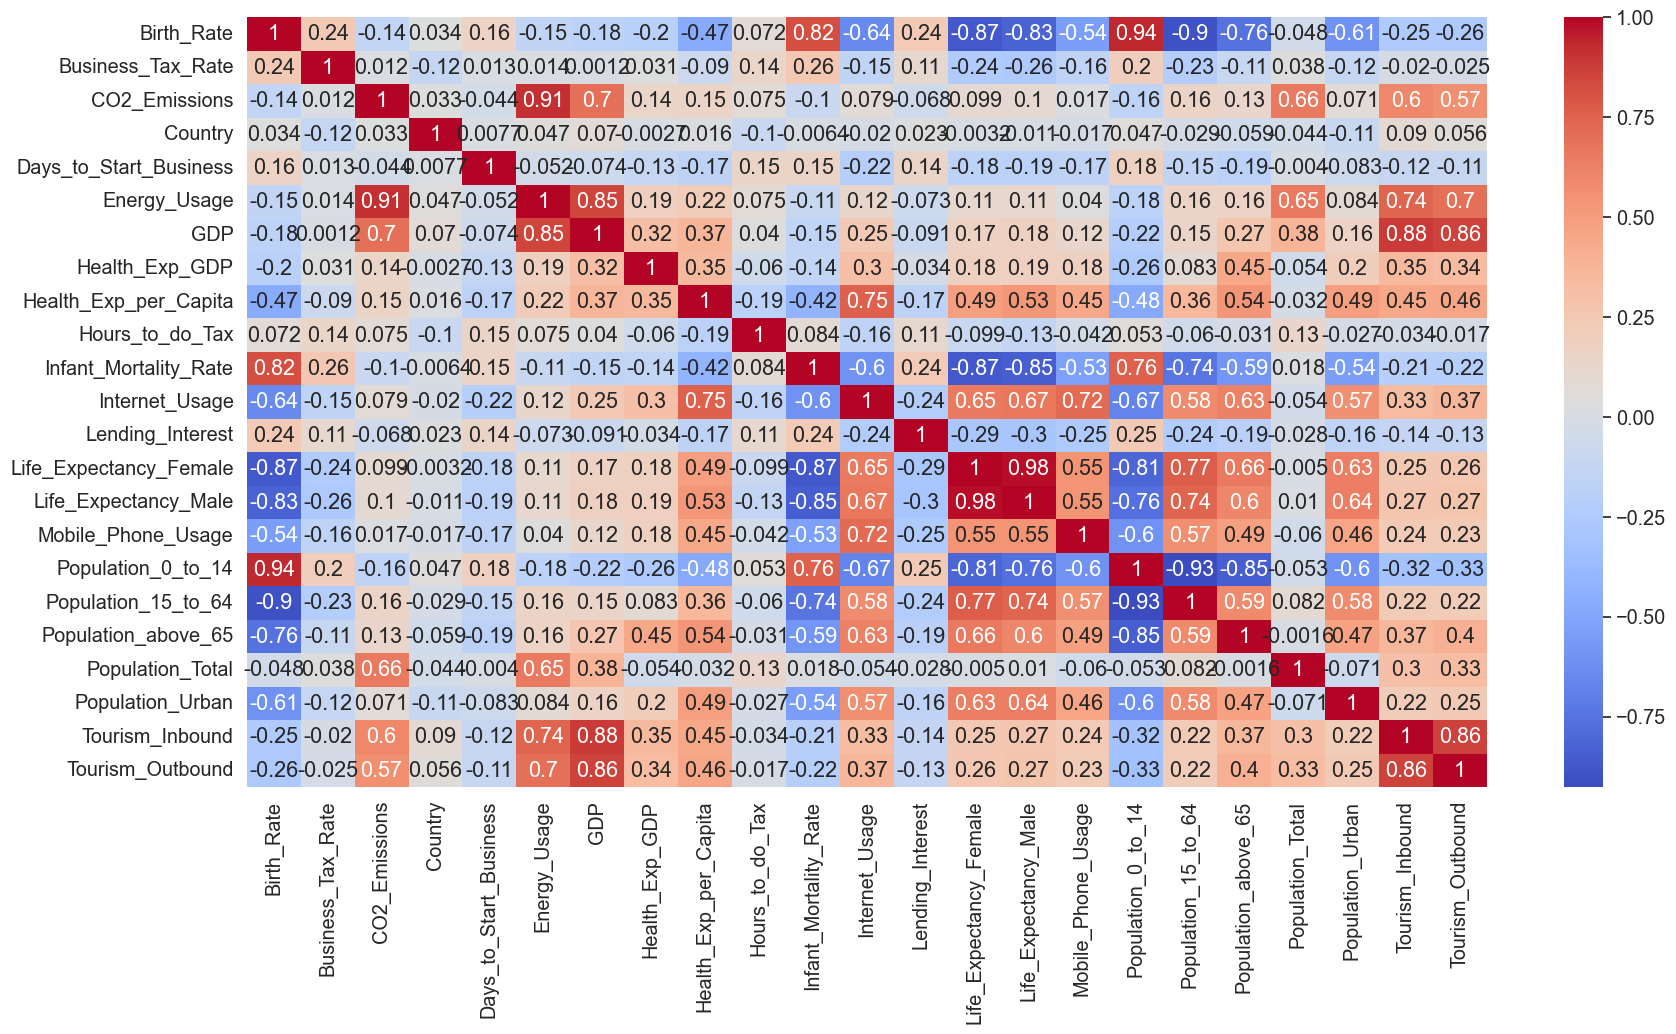

In [28]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
plt.show()

## Data Visualization

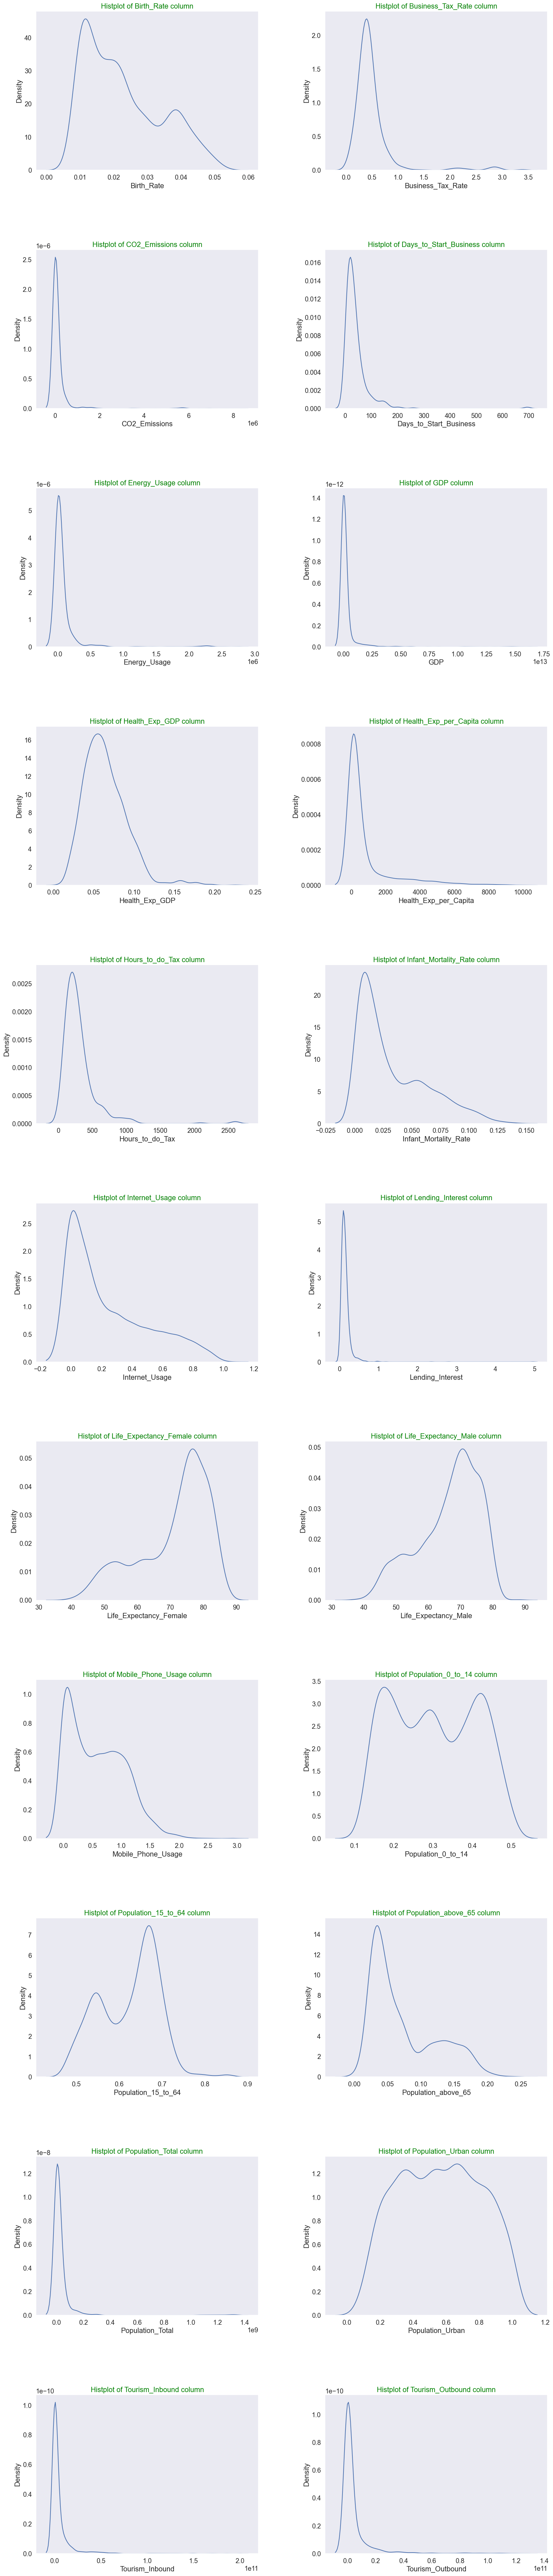

In [29]:
# Feature distribution plot
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(20,100))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in df1.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2
        sns.distplot(df1[i],kde=True,hist=False,color='b',ax=axs[x,y])
        axs[x,y].set_title('Histplot of {} column'.format(i),fontdict={'color':'green'})
        counter+=1
plt.show()

# PART 1: Model Building with outliers

## Scale the data

In [30]:
# Scale the data using Robust scalar
#scaler = RobustScaler()
#scaled_df = scaler.fit_transform(df2)

In [31]:
# Standardize the data 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)

In [32]:
scaled_df.shape

(2704, 23)

## Principle Component Analysis

In [33]:
# Applying PCA on scaled data
pca = PCA()
pcomps = pca.fit_transform(scaled_df)
pcomps

array([[-1.24847257e+00, -2.77761905e-01,  1.33791545e+00, ...,
        -2.64421992e-02,  6.87901582e-02, -1.60094541e-04],
       [-6.30751819e+00,  1.66462216e+00, -8.99640331e-01, ...,
        -2.11011612e-02, -1.52250876e-01, -4.37331488e-04],
       [-4.30174615e+00,  8.68080277e-01, -4.73815953e-01, ...,
        -1.72416456e-02, -1.50190860e-01,  9.78172264e-06],
       ...,
       [ 2.69434509e+00, -1.32693172e+00, -7.86686866e-01, ...,
         2.84950346e-02,  7.89148033e-02, -6.99512740e-03],
       [ 8.68367320e-01, -5.82371394e-01,  1.43458477e+00, ...,
        -1.55375115e-01, -5.48798619e-03,  3.85575396e-04],
       [ 2.24527984e+00, -1.47732225e+00, -2.45006138e-01, ...,
        -2.85026702e-02,  9.31104174e-02, -7.31204003e-03]])

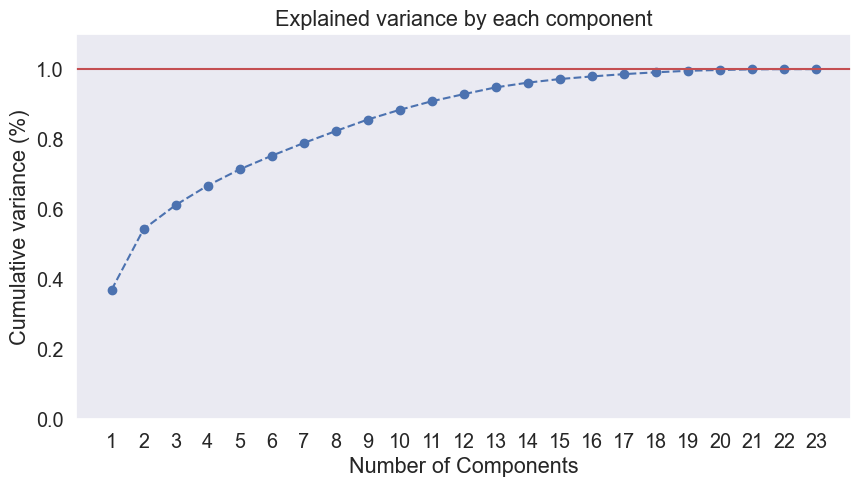

In [34]:
# Explained Variance of each component
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+scaled_df.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+scaled_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [35]:
# The amount of variance that each PCA explains
var = pca.explained_variance_ratio_
var

array([3.69504995e-01, 1.73412930e-01, 6.86952822e-02, 5.57329998e-02,
       4.64227217e-02, 3.87966699e-02, 3.63574323e-02, 3.42285719e-02,
       3.29583970e-02, 2.77659137e-02, 2.44573843e-02, 2.02783633e-02,
       1.94125565e-02, 1.34470777e-02, 1.03516704e-02, 7.35946681e-03,
       6.59349976e-03, 5.24953338e-03, 4.28685009e-03, 2.37249054e-03,
       1.67498750e-03, 6.39580412e-04, 6.25236332e-07])

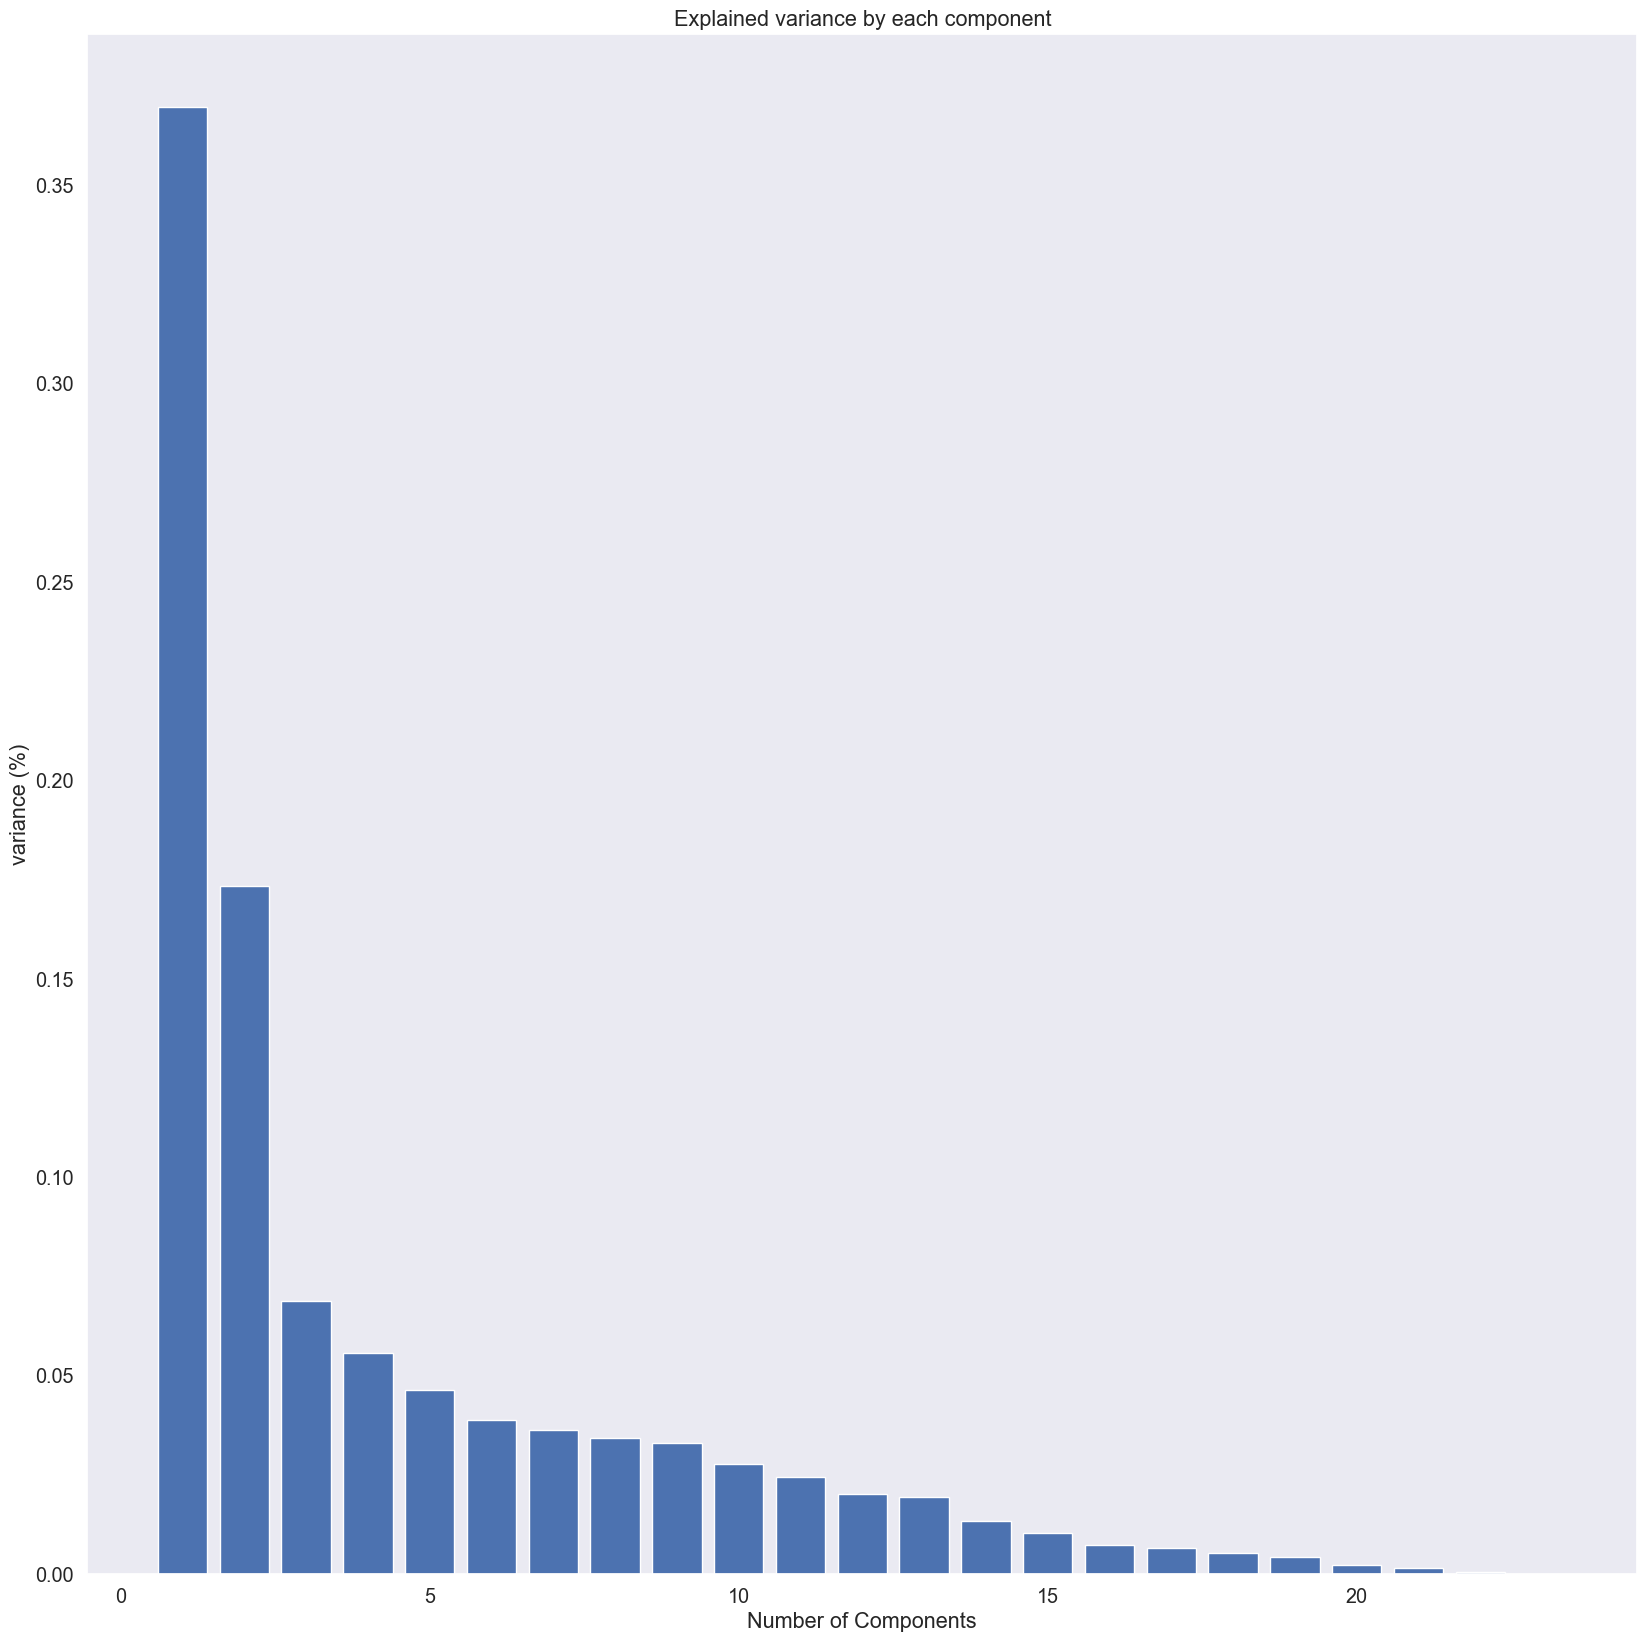

In [36]:
# Barplot to display explained variance of each component
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')
plt.show()

In [37]:
# Cumulative sum of percentage explained variance
np.cumsum(var*100)

array([ 36.95049953,  54.29179254,  61.16132076,  66.73462074,
        71.37689291,  75.25655991,  78.89230313,  82.31516032,
        85.61100003,  88.3875914 ,  90.83332983,  92.86116616,
        94.80242181,  96.14712958,  97.18229663,  97.91824331,
        98.57759328,  99.10254662,  99.53123163,  99.76848069,
        99.93597944,  99.99993748, 100.        ])

##### As we can see the first 13 components holds 94.80% of the data.

In [38]:
# We will perform PCA on first 13 components
pca1 = PCA(n_components= 13)
pca_scaled = pca1.fit_transform(scaled_df)

In [39]:
# Creating a dataframe of the components
pca_scaled_df = pd.DataFrame(data = pca_scaled, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
print(pca_scaled_df.shape)
pca_scaled_df.head()

(2704, 13)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.248473 -0.277762  1.337915  0.424064 -1.043583 -0.492020  0.954727   
1 -6.307518  1.664622 -0.899640  2.014638  1.658128  1.621074  3.280477   
2 -4.301746  0.868080 -0.473816  0.283226 -0.972948 -1.098118  0.825491   
3 -3.049102  0.341084  0.097845  0.262144 -0.558637 -0.669044  1.059145   
4 -4.992025  1.314757 -0.991672  0.530633 -1.357462 -0.676224  0.425807   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.281103 -0.048020  1.366237  0.106466  0.229830 -0.260385  
1  1.548184  3.225000 -0.021967  1.175928  0.102268 -0.552605  
2 -0.334442  0.344508  0.326127  0.229941  0.234455 -0.497229  
3 -0.501775  0.434910  0.224043  0.636995 -0.326325 -0.987477  
4 -0.142659 -0.041393 -0.135586  0.520309  0.447354 -0.235769

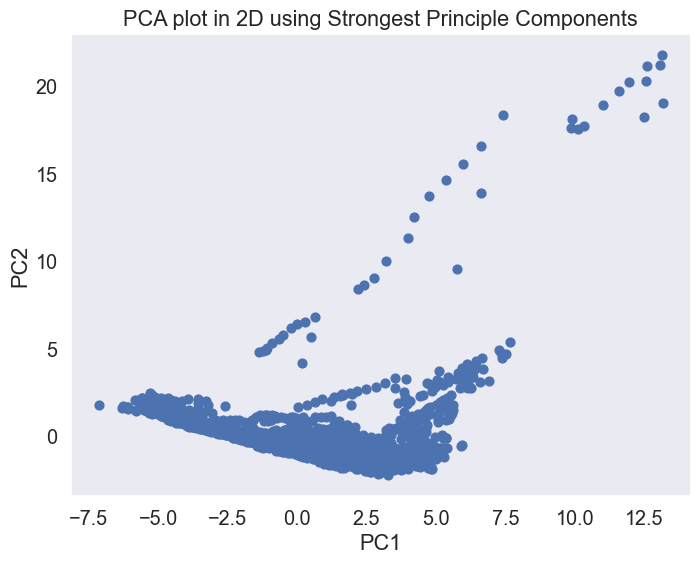

In [40]:
# PCA plot in 2D
plt.figure(figsize=(8,6))
plt.scatter(pca_scaled_df.iloc[:,0], pca_scaled_df.iloc[:,1], s=40)
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## K-Means Clustering

In [41]:
# Within cluster sum of squares (WCSS)
k_values = range(1,11)
wcss = []
for i in k_values:
    model = KMeans(n_clusters=i,init='k-means++', random_state=42)
    model.fit(pca_scaled_df)
    wcss.append(model.inertia_)
clusters_df = pd.DataFrame({"num_clusters":k_values,"cluster_errors":wcss})
clusters_df

num_clusters  cluster_errors
0             1    58959.522173
1             2    42836.833394
2             3    34518.032811
3             4    30119.063510
4             5    27716.809258
5             6    25386.106553
6             7    23821.998686
7             8    21982.280020
8             9    21278.195406
9            10    19443.853331

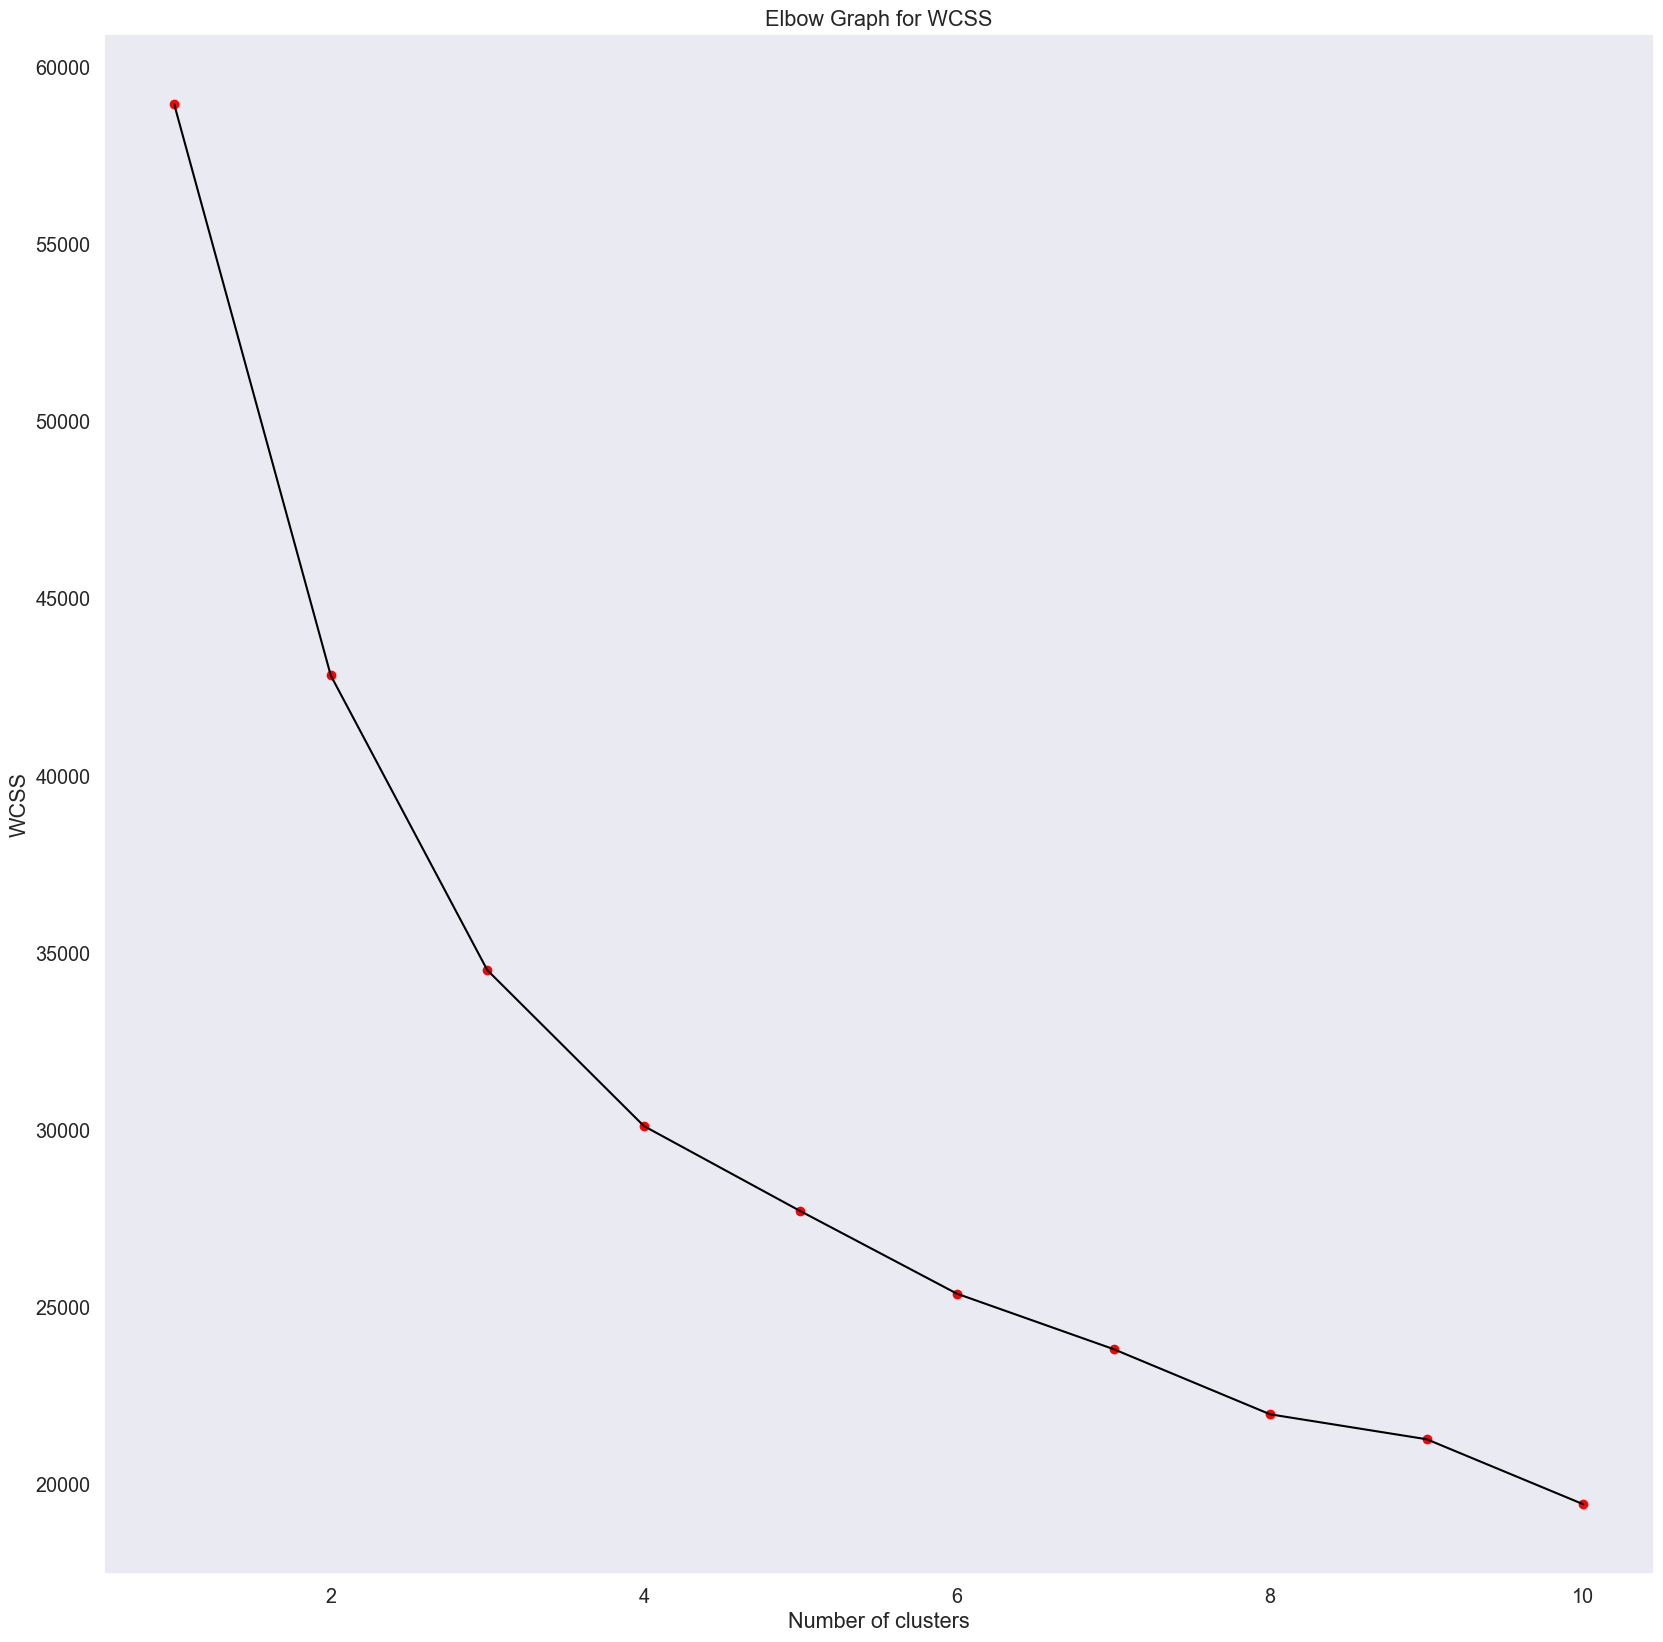

In [42]:
# Elbow Graph for WCSS
plt.plot(range(1,11),wcss,color = 'black')
plt.scatter(range(1,11),wcss,color='red')
plt.title('Elbow Graph for WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# Calculating Silhouette Scores for each number of clusters
k_values = range(2,11)
sil = []
for i in k_values:
    model = KMeans(n_clusters=i,init='k-means++', random_state=42)
    model.fit(pca_scaled_df)
    c_labels = model.labels_
    sil_score = silhouette_score(pca_scaled_df,c_labels)
    sil.append(sil_score)
    print("For clusters =", i,"The average silhouette_score is :", sil_score)

For clusters = 2 The average silhouette_score is : 0.29743515320254604
For clusters = 3 The average silhouette_score is : 0.3145358875287533
For clusters = 4 The average silhouette_score is : 0.2212717876460662
For clusters = 5 The average silhouette_score is : 0.22557348947690484
For clusters = 6 The average silhouette_score is : 0.20507556419343922
For clusters = 7 The average silhouette_score is : 0.2121767030077214
For clusters = 8 The average silhouette_score is : 0.22333837352753183
For clusters = 9 The average silhouette_score is : 0.18402273843407047
For clusters = 10 The average silhouette_score is : 0.20462414098008938


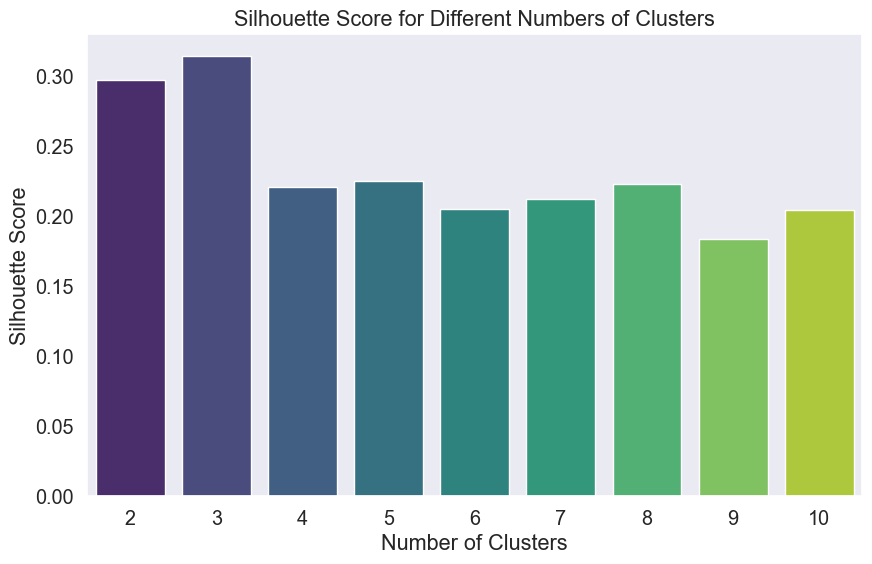

In [44]:
# Barplot of Silhouette score vs No. of clusters
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(10, 6))
sns.barplot(x=clusters, y=sil, palette="viridis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

##### As we can observe from the above graphs and silhouette scores, the ideal choice for number of clusters is 3 with a score of 0.31. Hence, we will proceed to build a K-means model with 3 clusters.

In [45]:
# Build K-means Model with 3 clusters
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_model.fit(pca_scaled_df)

KMeans(n_clusters=3, random_state=42)

In [46]:
# K-means model Labels
kmeans_labels = kmeans_model.labels_
kmeans_labels

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
# Dataframe with labels
pca_scaled_df['KMeans_Labels'] = kmeans_labels
pca_scaled_df

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.248473  -0.277762  1.337915  0.424064 -1.043583 -0.492020  0.954727   
1     -6.307518   1.664622 -0.899640  2.014638  1.658128  1.621074  3.280477   
2     -4.301746   0.868080 -0.473816  0.283226 -0.972948 -1.098118  0.825491   
3     -3.049102   0.341084  0.097845  0.262144 -0.558637 -0.669044  1.059145   
4     -4.992025   1.314757 -0.991672  0.530633 -1.357462 -0.676224  0.425807   
...         ...        ...       ...       ...       ...       ...       ...   
2699   1.966322  -1.389268 -0.210254 -1.224939  0.233431 -0.054947 -0.316366   
2700  13.166975  19.050022 -7.253103 -1.164384  2.654786 -2.238981 -0.838544   
2701   2.694345  -1.326932 -0.786687 -0.179611  0.595039  0.670729 -1.310697   
2702   0.868367  -0.582371  1.434585  0.957354  2.602199 -1.285566 -2.135495   
2703   2.245280  -1.477322 -0.245006 -0.698537  0.608838  1.176072 -0.524690   

           PC8       PC9      PC10      PC11      PC12      PC13  \
0    -0.281103 -0.048020  1.366237  0.106466  0.229830 -0.260385   
1     1.548184  3.225000 -0.021967  1.175928  0.102268 -0.552605   
2    -0.334442  0.344508  0.326127  0.229941  0.234455 -0.497229   
3    -0.501775  0.434910  0.224043  0.636995 -0.326325 -0.987477   
4    -0.142659 -0.041393 -0.135586  0.520309  0.447354 -0.235769   
...        ...       ...       ...       ...       ...       ...   
2699  1.622634 -0.478879  0.840175 -1.368282  0.668170 -0.735087   
2700 -0.614571  0.473705  5.014749  3.903504 -0.042515  1.273144   
2701  0.200556  0.391771 -0.823197 -0.744229 -1.053667 -0.066941   
2702  1.179947  0.134937 -0.017502 -0.761934 -0.385483  0.134382   
2703  0.044366 -0.731984 -0.048674 -0.618887 -0.660238 -0.756440   

      KMeans_Labels  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
2699              1  
2700              2  
2701              1  
2702              1  
2703              1  

[2704 rows x 14 columns]

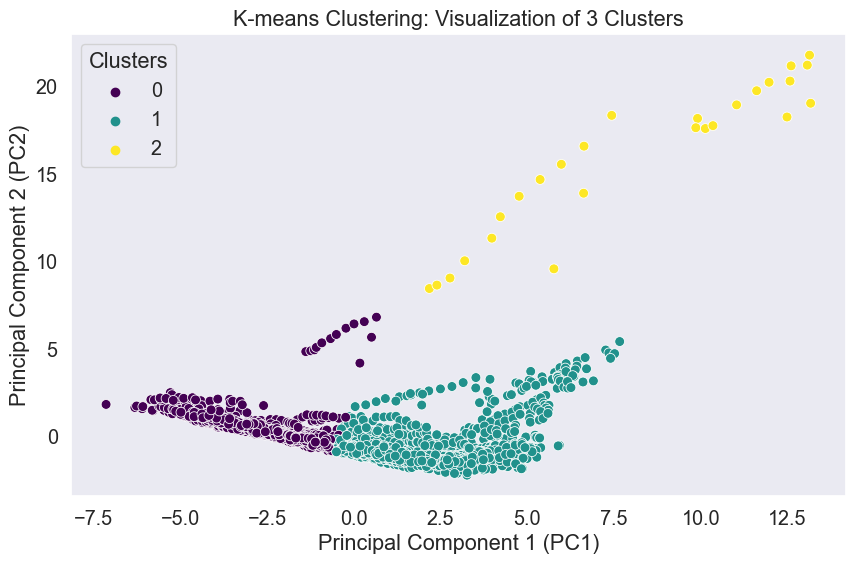

In [48]:
# Scatter plot of the first two principal components with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Labels', data=pca_scaled_df, palette="viridis", s=50)
plt.title('K-means Clustering: Visualization of 3 Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Clusters')
plt.show()

In [49]:
# Datapoints present in each cluster
pca_scaled_df['KMeans_Labels'].value_counts()

1    1567
0    1111
2      26
Name: KMeans_Labels, dtype: int64

### Grouping results

In [50]:
# Grouping datapoints with respective labels
grp_kmeans = pca_scaled_df.groupby(['KMeans_Labels'])
for x,y in grp_kmeans:
    print(y)
    print('__________________________________________________________________________')

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.248473 -0.277762  1.337915  0.424064 -1.043583 -0.492020  0.954727   
1    -6.307518  1.664622 -0.899640  2.014638  1.658128  1.621074  3.280477   
2    -4.301746  0.868080 -0.473816  0.283226 -0.972948 -1.098118  0.825491   
3    -3.049102  0.341084  0.097845  0.262144 -0.558637 -0.669044  1.059145   
4    -4.992025  1.314757 -0.991672  0.530633 -1.357462 -0.676224  0.425807   
...        ...       ...       ...       ...       ...       ...       ...   
2658 -1.179269 -0.495714  0.395390 -2.723245  0.317310 -0.041441 -0.587139   
2666 -0.794932 -0.183834  0.971319  3.052700 -0.191949 -1.058368 -1.938336   
2681 -0.844551 -0.320079 -0.283160  0.075932 -0.290098 -0.838104 -0.342016   
2682 -1.105628 -0.311346 -0.110879 -0.360649 -0.517338  0.010899  0.071016   
2683 -1.667720 -0.081433  0.090101 -0.049697  0.343101 -1.210134  0.496947   

           PC8       PC9      PC10      PC11      PC12      PC1

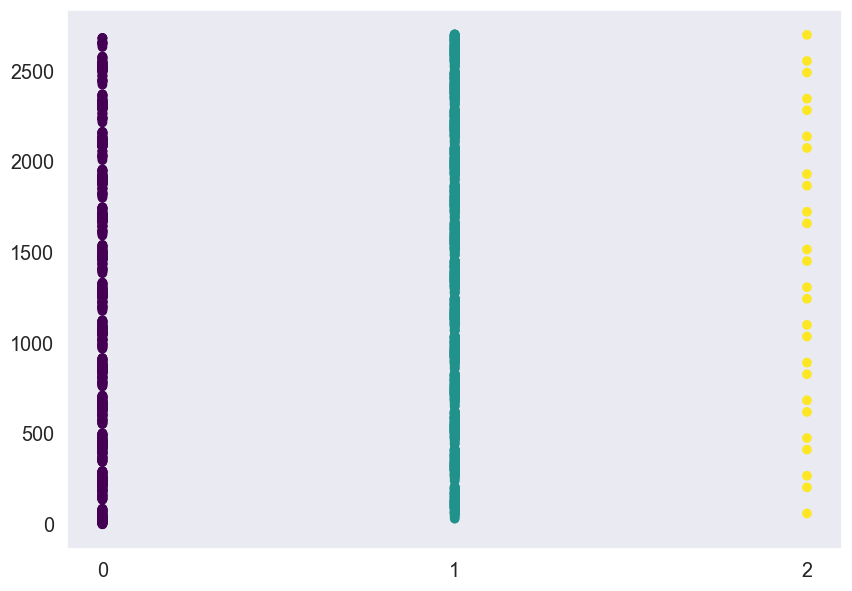

In [51]:
# Scatterplot of datapoints with respective labels
plt.figure(figsize=(10, 7))
plt.scatter(pca_scaled_df['KMeans_Labels'], pca_scaled_df.index, c=kmeans_labels, cmap='viridis')
plt.xticks([0,1,2])
plt.show()

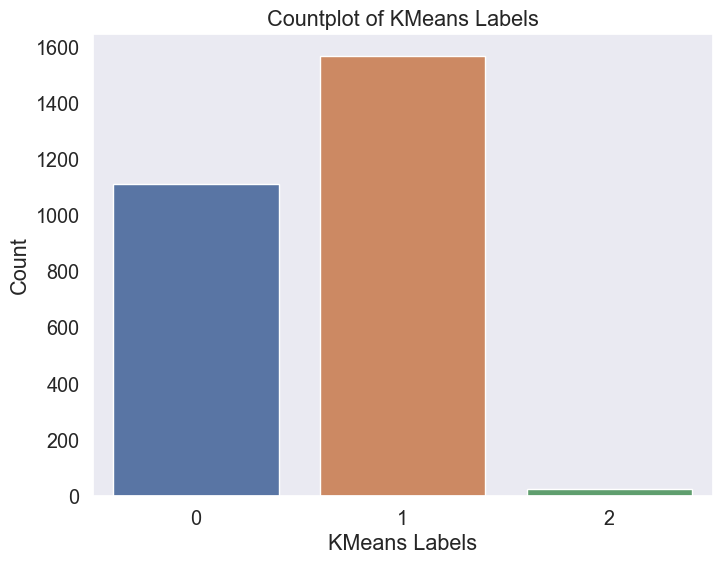

In [52]:
# Countplot of datapoints contained in each K-means label
plt.figure(figsize=(8, 6))
sns.countplot(x='KMeans_Labels', data=pca_scaled_df)
plt.title('Countplot of KMeans Labels')
plt.xlabel('KMeans Labels')
plt.ylabel('Count')
plt.show()

In [53]:
# Grouping labels based on feature means
display('After applying PCA and K-means Clustering on dataset:',df2.groupby(pca_scaled_df['KMeans_Labels']).agg(['mean']))

'After applying PCA and K-means Clustering on dataset:'

Birth_Rate Business_Tax_Rate CO2_Emissions     Country  \
                    mean              mean          mean        mean   
KMeans_Labels                                                          
0               0.033299          0.544695  3.757694e+04  107.621962   
1               0.014714          0.431784  9.294031e+04  100.336950   
2               0.013038          0.527885  4.801918e+06  118.000000   

              Days_to_Start_Business  Energy_Usage           GDP  \
                                mean          mean          mean   
KMeans_Labels                                                      
0                          51.305902  2.453635e+04  3.534037e+10   
1                          30.311058  4.697623e+04  2.572180e+11   
2                          23.329670  1.975488e+06  8.461556e+12   

              Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                        mean                  mean            mean  ...   
KMeans_Labels                                                       ...   
0                   0.057465            120.057863      289.225665  ...   
1                   0.068477           1533.736986      267.767071  ...   
2                   0.104577           3549.730769      358.362637  ...   

              Life_Expectancy_Female Life_Expectancy_Male Mobile_Phone_Usage  \
                                mean                 mean               mean   
KMeans_Labels                                                                  
0                          61.549055            58.312331           0.244966   
1                          78.677546            72.877473           0.815216   
2                          77.807692            73.961538           0.553846   

              Population_0_to_14 Population_15_to_64 Population_above_65  \
                            mean                mean                mean   
KMeans_Labels                                                              
0                       0.403491            0.560179            0.036323   
1                       0.228841            0.670736            0.100426   
2                       0.205308            0.692500            0.102154   

              Population_Total Population_Urban Tourism_Inbound  \
                          mean             mean            mean   
KMeans_Labels                                                     
0                 3.337816e+07         0.375885    7.614828e+08   
1                 1.728047e+07         0.697859    5.602965e+09   
2                 8.038033e+08         0.619692    8.808477e+10   

              Tourism_Outbound  
                          mean  
KMeans_Labels                   
0                 5.415723e+08  
1                 5.313315e+09  
2                 7.074662e+10  

[3 rows x 23 columns]

In [54]:
# Sort each column separately in ascending order based on mean values
mean_sorted_kmeans = df2.groupby(pca_scaled_df['KMeans_Labels']).agg(['mean'])
for col in mean_sorted_kmeans.columns:
    mean_sorted_kmeans = mean_sorted_kmeans.sort_values(by=col, ascending=True)
display(mean_sorted_kmeans)

Birth_Rate Business_Tax_Rate CO2_Emissions     Country  \
                    mean              mean          mean        mean   
KMeans_Labels                                                          
0               0.033299          0.544695  3.757694e+04  107.621962   
1               0.014714          0.431784  9.294031e+04  100.336950   
2               0.013038          0.527885  4.801918e+06  118.000000   

              Days_to_Start_Business  Energy_Usage           GDP  \
                                mean          mean          mean   
KMeans_Labels                                                      
0                          51.305902  2.453635e+04  3.534037e+10   
1                          30.311058  4.697623e+04  2.572180e+11   
2                          23.329670  1.975488e+06  8.461556e+12   

              Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                        mean                  mean            mean  ...   
KMeans_Labels                                                       ...   
0                   0.057465            120.057863      289.225665  ...   
1                   0.068477           1533.736986      267.767071  ...   
2                   0.104577           3549.730769      358.362637  ...   

              Life_Expectancy_Female Life_Expectancy_Male Mobile_Phone_Usage  \
                                mean                 mean               mean   
KMeans_Labels                                                                  
0                          61.549055            58.312331           0.244966   
1                          78.677546            72.877473           0.815216   
2                          77.807692            73.961538           0.553846   

              Population_0_to_14 Population_15_to_64 Population_above_65  \
                            mean                mean                mean   
KMeans_Labels                                                              
0                       0.403491            0.560179            0.036323   
1                       0.228841            0.670736            0.100426   
2                       0.205308            0.692500            0.102154   

              Population_Total Population_Urban Tourism_Inbound  \
                          mean             mean            mean   
KMeans_Labels                                                     
0                 3.337816e+07         0.375885    7.614828e+08   
1                 1.728047e+07         0.697859    5.602965e+09   
2                 8.038033e+08         0.619692    8.808477e+10   

              Tourism_Outbound  
                          mean  
KMeans_Labels                   
0                 5.415723e+08  
1                 5.313315e+09  
2                 7.074662e+10  

[3 rows x 23 columns]

In [55]:
# Sorting based on the mean values across all feature columns toghether
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Total_mean_sorted_kmeans = df2.groupby(pca_scaled_df['KMeans_Labels']).agg(['mean']).mean(axis=1).sort_values(ascending=True)
Total_mean_sorted_kmeans

KMeans_Labels
0     1594646481
1    11658767740
2   374834712609
dtype: float64

In [56]:
# KMeans Model Silhouette score (with outliers)
k_sil1 = silhouette_score(pca_scaled_df,kmeans_labels)
k_sil1

0.3248633127502415

## Hierarchical Clustering

In [57]:
# Calculating Silhouette Scores for each clusters and linkages
c_values = range(2, 6)

for i in c_values:
    best_linkage = None
    best_silhouette_score = -1
    
    for linkages in ["single", "complete", "average", "ward"]:
        model1 = AgglomerativeClustering(n_clusters=i, linkage=linkages)
        model1.fit(pca_scaled_df)
        c_labels = model1.labels_
        sil_score = silhouette_score(pca_scaled_df, c_labels)
        
        print(f"For clusters = {i}, linkage: {linkages}, silhouette_score: {sil_score}")
        
        # Update the best linkage if the current score is higher
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_linkage = linkages
    
    print(f"The best linkage for {i} clusters is: {best_linkage} with silhouette_score: {best_silhouette_score}")
    print()

For clusters = 2, linkage: single, silhouette_score: 0.8261341945430702
For clusters = 2, linkage: complete, silhouette_score: 0.7500827129348924
For clusters = 2, linkage: average, silhouette_score: 0.7635667905387485
For clusters = 2, linkage: ward, silhouette_score: 0.2850677916154892
The best linkage for 2 clusters is: single with silhouette_score: 0.8261341945430702

For clusters = 3, linkage: single, silhouette_score: 0.6199300726191653
For clusters = 3, linkage: complete, silhouette_score: 0.6790095393172987
For clusters = 3, linkage: average, silhouette_score: 0.749007232863
For clusters = 3, linkage: ward, silhouette_score: 0.30903059660625876
The best linkage for 3 clusters is: average with silhouette_score: 0.749007232863

For clusters = 4, linkage: single, silhouette_score: 0.6278992834956236
For clusters = 4, linkage: complete, silhouette_score: 0.610762624765783
For clusters = 4, linkage: average, silhouette_score: 0.683297502789126
For clusters = 4, linkage: ward, silhou

In [58]:
# Fitting Hierarchical clustering model
hier_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hier_model.fit(pca_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [59]:
# Hierarchical model Labels
hier_labels = hier_model.labels_
hier_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
# Dataframe with labels
pca_scaled_df['Hier_Labels'] = hier_labels
pca_scaled_df

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
0      -1   -0    1    0   -1   -0    1   -0   -0     1     0     0    -0   
1      -6    2   -1    2    2    2    3    2    3    -0     1     0    -1   
2      -4    1   -0    0   -1   -1    1   -0    0     0     0     0    -0   
3      -3    0    0    0   -1   -1    1   -1    0     0     1    -0    -1   
4      -5    1   -1    1   -1   -1    0   -0   -0    -0     1     0    -0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2699    2   -1   -0   -1    0   -0   -0    2   -0     1    -1     1    -1   
2700   13   19   -7   -1    3   -2   -1   -1    0     5     4    -0     1   
2701    3   -1   -1   -0    1    1   -1    0    0    -1    -1    -1    -0   
2702    1   -1    1    1    3   -1   -2    1    0    -0    -1    -0     0   
2703    2   -1   -0   -1    1    1   -1    0   -1    -0    -1    -1    -1   

      KMeans_Labels  Hier_Labels  
0                 0            0  
1                 0            1  
2                 0            1  
3                 0            1  
4                 0            1  
...             ...          ...  
2699              1            0  
2700              2            2  
2701              1            0  
2702              1            0  
2703              1            0  

[2704 rows x 15 columns]

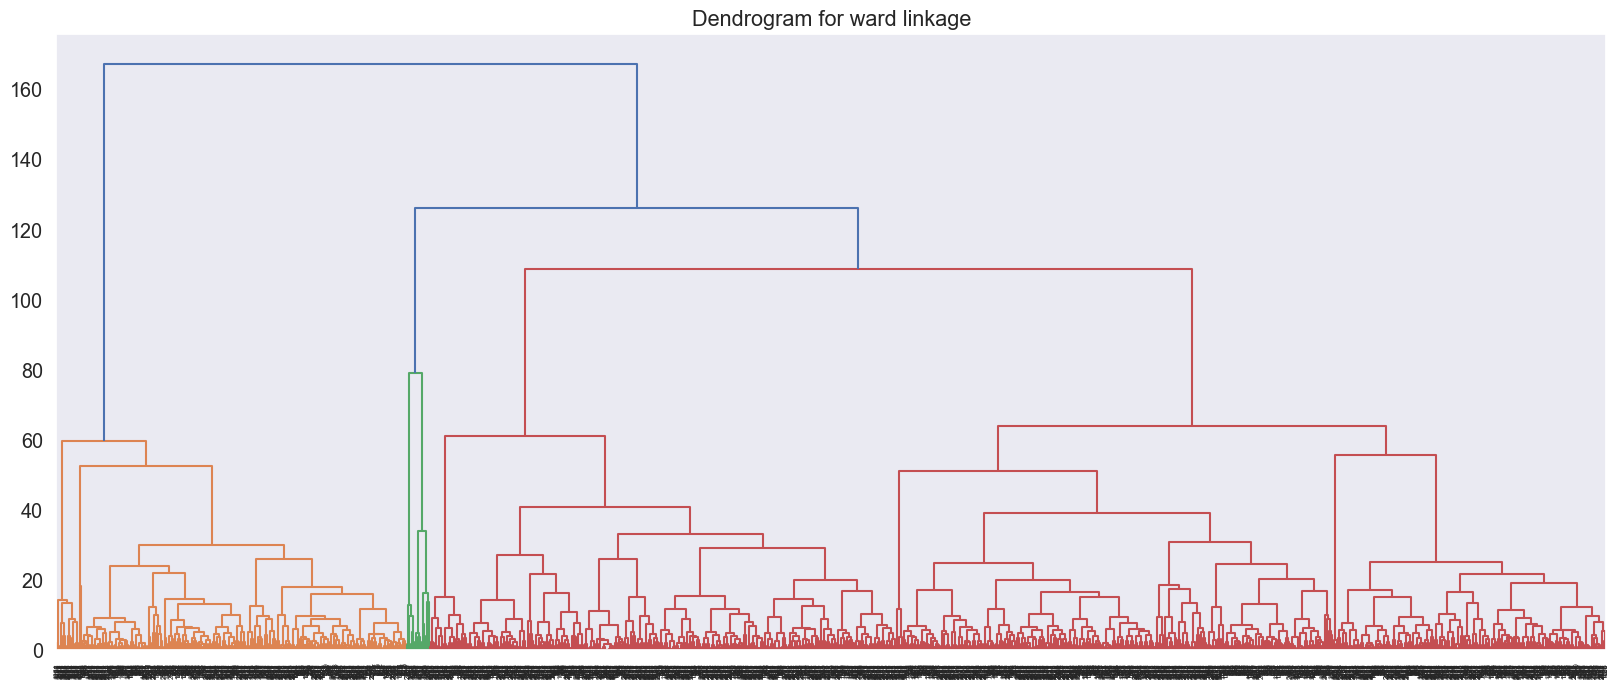

In [61]:
# Dendogram
plt.figure(figsize=(20, 8))  
plt.title("Dendrogram for ward linkage")  
dend = hierarchy.dendrogram(hierarchy.linkage(pca_scaled_df, method='ward'))

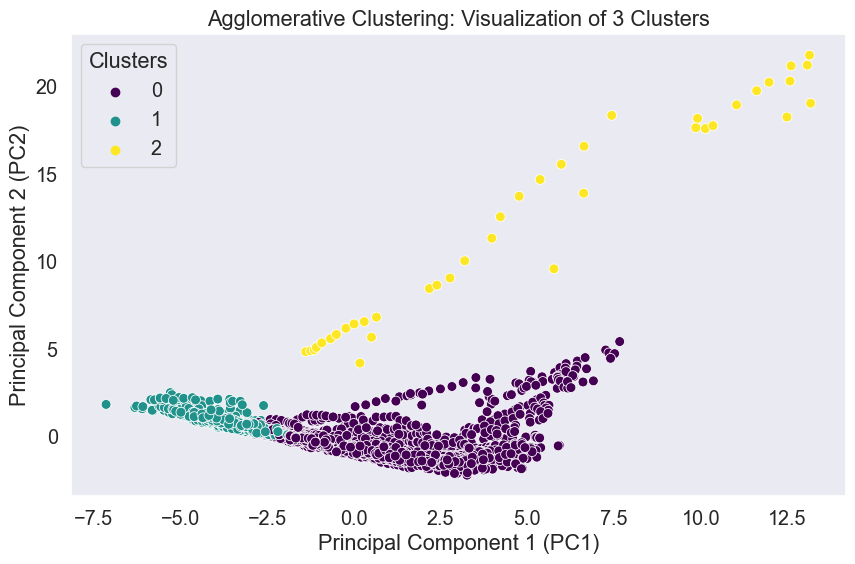

In [62]:
# Scatter plot of the first two principal components with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Hier_Labels', data=pca_scaled_df, palette="viridis", s=50)
plt.title('Agglomerative Clustering: Visualization of 3 Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Clusters')
plt.show()

In [63]:
# Datapoints present in each cluster
pca_scaled_df['Hier_Labels'].value_counts()

0    2053
1     612
2      39
Name: Hier_Labels, dtype: int64

### Grouping results

In [64]:
# Grouping datapoints with respective labels
grp_hier = pca_scaled_df.groupby(['Hier_Labels'])
for x,y in grp_hier:
    print(y)
    print('__________________________________________________________________________')

      PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
0      -1   -0    1    0   -1   -0    1   -0   -0     1     0     0    -0   
13     -3    0   -0    1    0   -1    1   -0   -1     0    -0    -1    -1   
14     -1    0    1    0   -1    0    0   -1    0     1    -0     1     0   
18     -3    0    0    0    1   -2    1    0   -0     1    -0    -0    -1   
26     -1   -1    1   -0   -0   -0   -0    0   -0     2    -1    -0    -1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2698    1   -1    0   -1    0    0   -1    0    0    -2     2     0     1   
2699    2   -1   -0   -1    0   -0   -0    2   -0     1    -1     1    -1   
2701    3   -1   -1   -0    1    1   -1    0    0    -1    -1    -1    -0   
2702    1   -1    1    1    3   -1   -2    1    0    -0    -1    -0     0   
2703    2   -1   -0   -1    1    1   -1    0   -1    -0    -1    -1    -1   

      KMeans_Labels  Hier_Labels  
0                 0            0  
13   

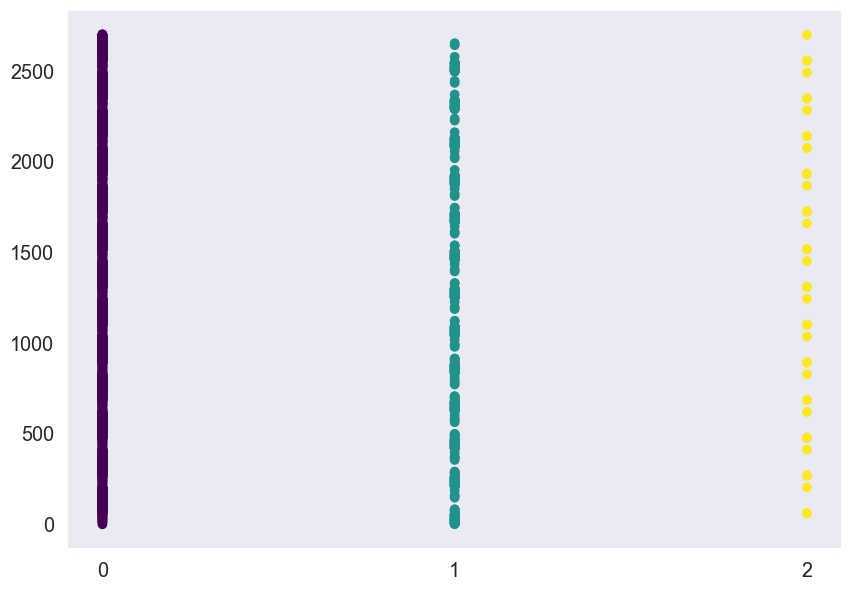

In [65]:
# Scatterplot of datapoints with respective labels
plt.figure(figsize=(10, 7))
plt.scatter(pca_scaled_df['Hier_Labels'], pca_scaled_df.index, c=hier_labels, cmap='viridis')
plt.xticks([0,1,2])
plt.show()

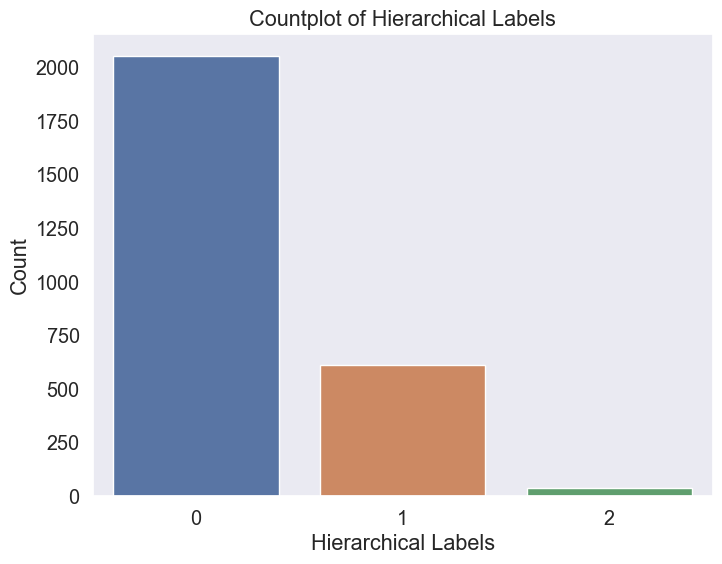

In [66]:
# Countplot of datapoints contained in each Hierarchical labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Hier_Labels', data=pca_scaled_df)
plt.title('Countplot of Hierarchical Labels')
plt.xlabel('Hierarchical Labels')
plt.ylabel('Count')
plt.show()

In [67]:
# Grouping labels based on feature means
display('After applying PCA and Hierarchical Clustering on dataset:',df2.groupby(pca_scaled_df['Hier_Labels']).agg(['mean']))

'After applying PCA and Hierarchical Clustering on dataset:'

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                  mean              mean          mean    mean   
Hier_Labels                                                      
0                    0                 0         80216     103   
1                    0                 1          9930     105   
2                    0                 1       3627555     107   

            Days_to_Start_Business Energy_Usage           GDP Health_Exp_GDP  \
                              mean         mean          mean           mean   
Hier_Labels                                                                    
0                               35        40979  203862092867              0   
1                               51        16010   16178978164              0   
2                               29      1495044 5997275545878              0   

            Health_Exp_per_Capita Hours_to_do_Tax  ... Life_Expectancy_Female  \
                             mean            mean  ...                   mean   
Hier_Labels                                        ...                          
0                            1199             272  ...                     76   
1                             123             293  ...                     55   
2                            2379             327  ...                     74   

            Life_Expectancy_Male Mobile_Phone_Usage Population_0_to_14  \
                            mean               mean               mean   
Hier_Labels                                                              
0                             71                  1                  0   
1                             53                  0                  0   
2                             70                  0                  0   

            Population_15_to_64 Population_above_65 Population_Total  \
                           mean                mean             mean   
Hier_Labels                                                            
0                             1                   0         18640201   
1                             1                   0         18059848   
2                             1                   0        916399052   

            Population_Urban Tourism_Inbound Tourism_Outbound  
                        mean            mean             mean  
Hier_Labels                                                    
0                          1      4480563837       4179913590  
1                          0       497066550        386150654  
2                          1     61878333333      49984025641  

[3 rows x 23 columns]

In [68]:
# Sort each column separately in ascending order based on mean values
mean_sorted_hier = df2.groupby(pca_scaled_df['Hier_Labels']).agg(['mean'])
for col in mean_sorted_hier.columns:
    mean_sorted_hier = mean_sorted_hier.sort_values(by=col, ascending=True)
display(mean_sorted_hier)

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                  mean              mean          mean    mean   
Hier_Labels                                                      
1                    0                 1          9930     105   
0                    0                 0         80216     103   
2                    0                 1       3627555     107   

            Days_to_Start_Business Energy_Usage           GDP Health_Exp_GDP  \
                              mean         mean          mean           mean   
Hier_Labels                                                                    
1                               51        16010   16178978164              0   
0                               35        40979  203862092867              0   
2                               29      1495044 5997275545878              0   

            Health_Exp_per_Capita Hours_to_do_Tax  ... Life_Expectancy_Female  \
                             mean            mean  ...                   mean   
Hier_Labels                                        ...                          
1                             123             293  ...                     55   
0                            1199             272  ...                     76   
2                            2379             327  ...                     74   

            Life_Expectancy_Male Mobile_Phone_Usage Population_0_to_14  \
                            mean               mean               mean   
Hier_Labels                                                              
1                             53                  0                  0   
0                             71                  1                  0   
2                             70                  0                  0   

            Population_15_to_64 Population_above_65 Population_Total  \
                           mean                mean             mean   
Hier_Labels                                                            
1                             1                   0         18059848   
0                             1                   0         18640201   
2                             1                   0        916399052   

            Population_Urban Tourism_Inbound Tourism_Outbound  
                        mean            mean             mean  
Hier_Labels                                                    
1                          0       497066550        386150654  
0                          1      4480563837       4179913590  
2                          1     61878333333      49984025641  

[3 rows x 23 columns]

In [69]:
# Sorting based on the mean values across all feature columns toghether
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Total_mean_sorted_hier = df2.groupby(pca_scaled_df['Hier_Labels']).agg(['mean']).mean(axis=1).sort_values(ascending=True)
Total_mean_sorted_hier

Hier_Labels
1      742620950
0     9240927541
2   265654757804
dtype: float64

In [70]:
# Hierarchical Model Silhouette score with outliers
hier_sil1 = silhouette_score(pca_scaled_df,hier_labels)
hier_sil1

0.3184886146213115

## DBSCAN

In [71]:
# Build a DBSCAN Model
dbscan_model = DBSCAN(eps=5, min_samples=10)
dbscan_model.fit(pca_scaled_df)

DBSCAN(eps=5, min_samples=10)

In [72]:
# DBSCAN model Labels
dbscan_labels = dbscan_model.labels_
dbscan_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
# Dataframe with labels 
# -1 Depicts Noise data.
pca_scaled_df['Dbscan_Labels'] = dbscan_labels
pca_scaled_df

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
0      -1   -0    1    0   -1   -0    1   -0   -0     1     0     0    -0   
1      -6    2   -1    2    2    2    3    2    3    -0     1     0    -1   
2      -4    1   -0    0   -1   -1    1   -0    0     0     0     0    -0   
3      -3    0    0    0   -1   -1    1   -1    0     0     1    -0    -1   
4      -5    1   -1    1   -1   -1    0   -0   -0    -0     1     0    -0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2699    2   -1   -0   -1    0   -0   -0    2   -0     1    -1     1    -1   
2700   13   19   -7   -1    3   -2   -1   -1    0     5     4    -0     1   
2701    3   -1   -1   -0    1    1   -1    0    0    -1    -1    -1    -0   
2702    1   -1    1    1    3   -1   -2    1    0    -0    -1    -0     0   
2703    2   -1   -0   -1    1    1   -1    0   -1    -0    -1    -1    -1   

      KMeans_Labels  Hier_Labels  Dbscan_Labels  
0                 0            0              0  
1                 0            1              0  
2                 0            1              0  
3                 0            1              0  
4                 0            1              0  
...             ...          ...            ...  
2699              1            0              0  
2700              2            2             -1  
2701              1            0              0  
2702              1            0              0  
2703              1            0              0  

[2704 rows x 16 columns]

In [74]:
# Unique labels
pca_scaled_df['Dbscan_Labels'].unique()

array([ 0,  1,  2, -1], dtype=int64)

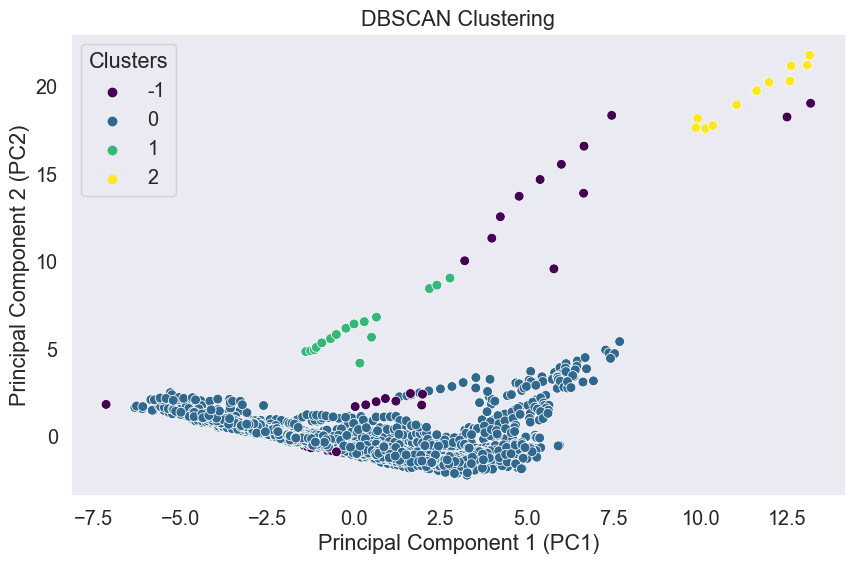

In [75]:
# Scatter plot of the first two principal components with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Dbscan_Labels', data=pca_scaled_df, palette="viridis", s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Clusters')
plt.show()

In [76]:
# # Datapoints present in each cluster
pca_scaled_df['Dbscan_Labels'].value_counts()

 0    2643
-1      34
 1      16
 2      11
Name: Dbscan_Labels, dtype: int64

### Grouping results

In [77]:
# Grouping datapoints with respective labels
grp_dbscan = pca_scaled_df.groupby(['Dbscan_Labels'])
for x,y in grp_dbscan:
    print(y)
    print('__________________________________________________________________________')

      PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
684     3   10    8   -0   -3    1    1    0   -0    -4    -3     1    -0   
884    -6    1   -1    3   10    8    8    6    6    -1     2     0     1   
892     4   11    8   -1   -3    1    2    1   -1    -4    -3     0    -0   
1092   -5    1   -1    2    9    7    6    5    5    -1     1     0     0   
1100    4   13    9    1   -3    1    1    1   -0    -4    -3     0     0   
1173    1    0    4    4    3    1   -6   -2    2     1    -1     1    -1   
1211    0    2    5    8    4   -0   -4   -1    4     1    -2     1     0   
1241   -1   -1    3    1    9   -7    2   -0   -6    -3     0    -0     1   
1300   -7    2   -1    6   17   15   14   11   11    -0     3     0     3   
1308    5   14   10    1   -3    1    1    1   -0    -4    -3     0     0   
1381    1    0    3    4    3    1   -6   -2    3     0    -0     1    -1   
1419    0    2    5    8    4   -0   -4   -1    4     1    -2     1     0   

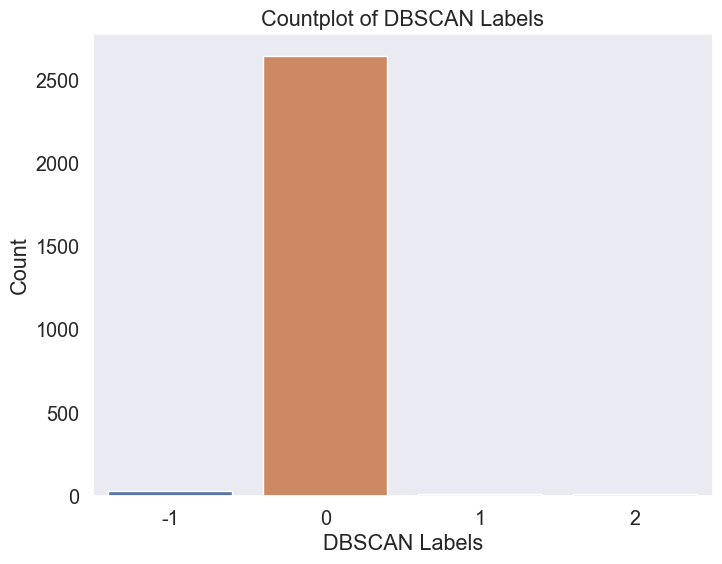

In [78]:
# Countplot of datapoints contained in each DBSCAN labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Dbscan_Labels', data=pca_scaled_df)
plt.title('Countplot of DBSCAN Labels')
plt.xlabel('DBSCAN Labels')
plt.ylabel('Count')
plt.show()

In [79]:
# Grouping labels based on feature means
display('After applying PCA and DBSCAN Clustering on dataset:',df2.groupby(pca_scaled_df['Dbscan_Labels']).agg(['mean']))

'After applying PCA and DBSCAN Clustering on dataset:'

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                    mean              mean          mean    mean   
Dbscan_Labels                                                      
-1                     0                 1       1629727     106   
 0                     0                 0         63330     103   
 1                     0                 1       1700736      75   
 2                     0                 0       5657526     198   

              Days_to_Start_Business Energy_Usage            GDP  \
                                mean         mean           mean   
Dbscan_Labels                                                      
-1                               218       738021  2607975030403   
 0                                37        34679   156855133480   
 1                                38       659126  1116899297593   
 2                                11      2267148 12837681818182   

              Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                        mean                  mean            mean  ...   
Dbscan_Labels                                                       ...   
-1                         0                  1012            1029  ...   
 0                         0                   954             268  ...   
 1                         0                    39             261  ...   
 2                         0                  6656             262  ...   

              Life_Expectancy_Female Life_Expectancy_Male Mobile_Phone_Usage  \
                                mean                 mean               mean   
Dbscan_Labels                                                                  
-1                                73                   67                  1   
 0                                72                   67                  1   
 1                                67                   64                  0   
 2                                80                   75                  1   

              Population_0_to_14 Population_15_to_64 Population_above_65  \
                            mean                mean                mean   
Dbscan_Labels                                                              
-1                             0                   1                   0   
 0                             0                   1                   0   
 1                             0                   1                   0   
 2                             0                   1                   0   

              Population_Total Population_Urban Tourism_Inbound  \
                          mean             mean            mean   
Dbscan_Labels                                                     
-1                   457470673                1     24887882353   
 0                    18009065                1      3572822658   
 1                  1165973281                0     11319812500   
 2                   295726300                1    131434727273   

              Tourism_Outbound  
                          mean  
Dbscan_Labels                   
-1                 24610369748  
 0                  3286411362  
 1                  9742812500  
 2                 98949181818  

[4 rows x 23 columns]

In [80]:
# Sort each column separately in ascending order based on mean values
mean_sorted_dbscan = df2.groupby(pca_scaled_df['Dbscan_Labels']).agg(['mean'])
for col in mean_sorted_dbscan.columns:
    mean_sorted_dbscan = mean_sorted_dbscan.sort_values(by=col, ascending=True)
display(mean_sorted_dbscan)

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                    mean              mean          mean    mean   
Dbscan_Labels                                                      
 0                     0                 0         63330     103   
 1                     0                 1       1700736      75   
-1                     0                 1       1629727     106   
 2                     0                 0       5657526     198   

              Days_to_Start_Business Energy_Usage            GDP  \
                                mean         mean           mean   
Dbscan_Labels                                                      
 0                                37        34679   156855133480   
 1                                38       659126  1116899297593   
-1                               218       738021  2607975030403   
 2                                11      2267148 12837681818182   

              Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                        mean                  mean            mean  ...   
Dbscan_Labels                                                       ...   
 0                         0                   954             268  ...   
 1                         0                    39             261  ...   
-1                         0                  1012            1029  ...   
 2                         0                  6656             262  ...   

              Life_Expectancy_Female Life_Expectancy_Male Mobile_Phone_Usage  \
                                mean                 mean               mean   
Dbscan_Labels                                                                  
 0                                72                   67                  1   
 1                                67                   64                  0   
-1                                73                   67                  1   
 2                                80                   75                  1   

              Population_0_to_14 Population_15_to_64 Population_above_65  \
                            mean                mean                mean   
Dbscan_Labels                                                              
 0                             0                   1                   0   
 1                             0                   1                   0   
-1                             0                   1                   0   
 2                             0                   1                   0   

              Population_Total Population_Urban Tourism_Inbound  \
                          mean             mean            mean   
Dbscan_Labels                                                     
 0                    18009065                1      3572822658   
 1                  1165973281                0     11319812500   
-1                   457470673                1     24887882353   
 2                   295726300                1    131434727273   

              Tourism_Outbound  
                          mean  
Dbscan_Labels                   
 0                  3286411362  
 1                  9742812500  
-1                 24610369748  
 2                 98949181818  

[4 rows x 23 columns]

In [81]:
# Sorting based on the mean values across all feature columns toghether
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Total_mean_sorted_dbscan = df2.groupby(pca_scaled_df['Dbscan_Labels']).agg(['mean']).mean(axis=1).sort_values(ascending=True)
Total_mean_sorted_dbscan

Dbscan_Labels
 0     7118803308
 1    49527402447
-1   115562309715
 2   568189973284
dtype: float64

In [82]:
# DBSCAN Model Silhouette score with outiers
db_sil1 = silhouette_score(pca_scaled_df,dbscan_labels)
db_sil1

0.514099066312746

# PART 2: Model Building without outliers

## Outlier treatment

In [83]:
# Creating copy of imputed dataset. We will work on outliers in this new dataset
df_out = df2.copy()
df_out

Birth_Rate  Business_Tax_Rate  CO2_Emissions  Country  \
0              0                  0          87931        2   
1              0                  0           9542        5   
2              0                  0           1617       20   
3              0                  0           4276       25   
4              0                  1           1041       29   
...          ...                ...            ...      ...   
2699           0                  1            144      193   
2700           0                  0          79064      198   
2701           0                  0            591      199   
2702           0                  1          79064      202   
2703           0                  0            156      204   

      Days_to_Start_Business  Energy_Usage            GDP  Health_Exp_GDP  \
0                         34         26998    54790058957               0   
1                         35          7499     9129594819               0   
2                         50          1983     2359122303               0   
3                         47          1836     5788311645               0   
4                         39         17275     2610959139               0   
...                      ...           ...            ...             ...   
2699                      22            58     2985755160               0   
2700                       5       2132446 16244600000000               0   
2701                       7         20873    50004354667               0   
2702                     144         20612   381286223859               0   
2703                      16            72      536372375               0   

      Health_Exp_per_Capita  Hours_to_do_Tax  ...  Life_Expectancy_Female  \
0                        60              309  ...                      71   
1                        22              327  ...                      47   
2                        15              238  ...                      57   
3                       152              233  ...                      52   
4                        12              222  ...                      52   
...                     ...              ...  ...                     ...   
2699                   3548              146  ...                      83   
2700                   8895              175  ...                      81   
2701                   1308              310  ...                      80   
2702                    593              792  ...                      78   
2703                    347              143  ...                      83   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0_to_14  \
0                       67                   0                   0   
1                       44                   0                   0   
2                       53                   0                   0   
3                       49                   0                   0   
4                       49                   0                   0   
...                    ...                 ...                 ...   
2699                    78                   0                   0   
2700                    76                   1                   0   
2701                    74                   2                   0   
2702                    72                   1                   0   
2703                    76                   1                   0   

      Population_15_to_64  Population_above_65  Population_Total  \
0                       1                    0          31719449   
1                       0                    0          13924930   
2                       1                    0           6949366   
3                       1                    0           1755375   
4                       1                    0          11607944   
...                   ...                  ...               ...   
2699                    1                    0             32427   
2700          

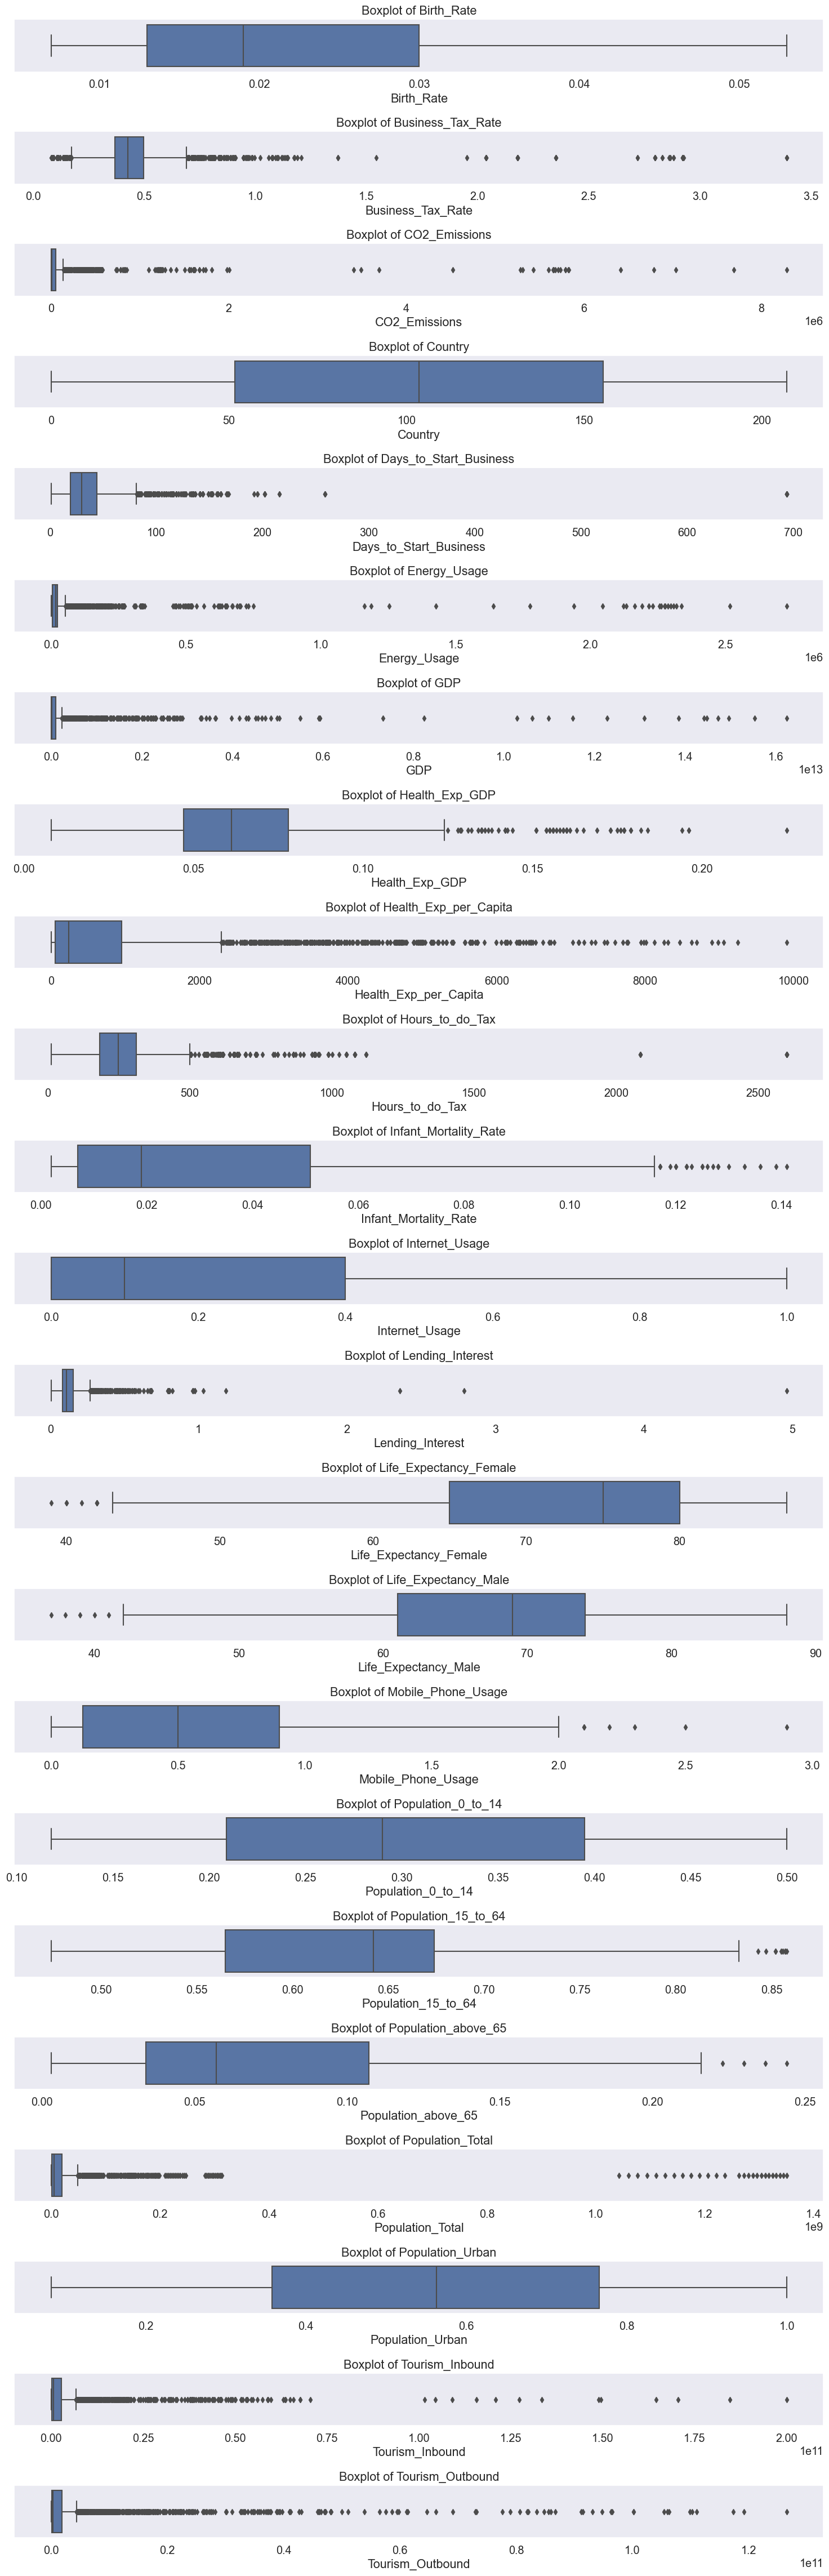

In [84]:
# Observing outlier using Boxplots before outlier treatment
numerical_columns = df_out.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(15, 2 * len(numerical_columns)))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_out[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [85]:
# Identify number of outliers in each column (Before outlier treatment)
Q1 = df_out.quantile(0.25)
Q3 = df_out.quantile(0.75)
IQR = Q3 - Q1
def identify_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df_out[(df_out[column] < lower_bound) | (df_out[column] > upper_bound)]
    return outliers
outliers_per_column = {col: identify_outliers(col) for col in df_out.columns}
for col, outliers in outliers_per_column.items():
    print(f"Column: {col}, Number of outliers: {len(outliers)}")

Column: Birth_Rate, Number of outliers: 0
Column: Business_Tax_Rate, Number of outliers: 314
Column: CO2_Emissions, Number of outliers: 323
Column: Country, Number of outliers: 0
Column: Days_to_Start_Business, Number of outliers: 206
Column: Energy_Usage, Number of outliers: 391
Column: GDP, Number of outliers: 391
Column: Health_Exp_GDP, Number of outliers: 59
Column: Health_Exp_per_Capita, Number of outliers: 446
Column: Hours_to_do_Tax, Number of outliers: 171
Column: Infant_Mortality_Rate, Number of outliers: 19
Column: Internet_Usage, Number of outliers: 0
Column: Lending_Interest, Number of outliers: 149
Column: Life_Expectancy_Female, Number of outliers: 8
Column: Life_Expectancy_Male, Number of outliers: 5
Column: Mobile_Phone_Usage, Number of outliers: 6
Column: Population_0_to_14, Number of outliers: 0
Column: Population_15_to_64, Number of outliers: 9
Column: Population_above_65, Number of outliers: 4
Column: Population_Total, Number of outliers: 318
Column: Population_Urba

##### To deal with outliers we will use the Winsorizing technique. Winsorizing involves replacing extreme values with values at a certain percentile.The process involves setting values below a certain percentile to the value at that percentile and values above another percentile to the value at that percentile. This helps in mitigating the impact of extreme values without removing them entirely.

In [86]:
# Using Winsorizing to treat outliers
winsorize_percentages = {
    'Business_Tax_Rate': 0.09,
    'CO2_Emissions': 0.12,
    'Days_to_Start_Business': 0.08,
    'Energy_Usage': 0.15,
    'GDP': 0.15,
    'Health_Exp_GDP': 0.03,
    'Health_Exp_per_Capita': 0.17,
    'Hours_to_do_Tax': 0.07,
    'Infant_Mortality_Rate': 0.01,
    'Lending_Interest': 0.06,
    'Life_Expectancy_Female': 0.01,
    'Life_Expectancy_Male': 0.01,
    'Mobile_Phone_Usage': 0.01,
    'Population_15_to_64': 0.01,
    'Population_above_65': 0.01,
    'Population_Total': 0.12,
    'Tourism_Inbound': 0.15,
    'Tourism_Outbound': 0.17
}
df_winsorized = df_out.copy()
for column, winsorize_percentage in winsorize_percentages.items():
    df_winsorized[column] = winsorize(df_out[column], limits=[winsorize_percentage, winsorize_percentage])
# Display the original and winsorized data
print("Original Data:")
print(df_out.head())
print("\n____________________________________________________________________________")
print("\nWinsorized Data:")
print(df_winsorized.head())

Original Data:
   Birth_Rate  Business_Tax_Rate  CO2_Emissions  Country  \
0           0                  0          87931        2   
1           0                  0           9542        5   
2           0                  0           1617       20   
3           0                  0           4276       25   
4           0                  1           1041       29   

   Days_to_Start_Business  Energy_Usage         GDP  Health_Exp_GDP  \
0                      34         26998 54790058957               0   
1                      35          7499  9129594819               0   
2                      50          1983  2359122303               0   
3                      47          1836  5788311645               0   
4                      39         17275  2610959139               0   

   Health_Exp_per_Capita  Hours_to_do_Tax  ...  Life_Expectancy_Female  \
0                     60              309  ...                      71   
1                     22              327  ...   

In [87]:
# Check number of outliers in each column after winsorizing
Q1 = df_winsorized.quantile(0.25)
Q3 = df_winsorized.quantile(0.75)
IQR = Q3 - Q1
def identify_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df_winsorized[(df_winsorized[column] < lower_bound) | (df_winsorized[column] > upper_bound)]
    return outliers
outliers_per_column = {col: identify_outliers(col) for col in df_winsorized.columns}
for col, outliers in outliers_per_column.items():
    print(f"Column: {col}, Number of outliers: {len(outliers)}")

Column: Birth_Rate, Number of outliers: 0
Column: Business_Tax_Rate, Number of outliers: 0
Column: CO2_Emissions, Number of outliers: 0
Column: Country, Number of outliers: 0
Column: Days_to_Start_Business, Number of outliers: 0
Column: Energy_Usage, Number of outliers: 0
Column: GDP, Number of outliers: 0
Column: Health_Exp_GDP, Number of outliers: 0
Column: Health_Exp_per_Capita, Number of outliers: 0
Column: Hours_to_do_Tax, Number of outliers: 0
Column: Infant_Mortality_Rate, Number of outliers: 0
Column: Internet_Usage, Number of outliers: 0
Column: Lending_Interest, Number of outliers: 0
Column: Life_Expectancy_Female, Number of outliers: 0
Column: Life_Expectancy_Male, Number of outliers: 0
Column: Mobile_Phone_Usage, Number of outliers: 0
Column: Population_0_to_14, Number of outliers: 0
Column: Population_15_to_64, Number of outliers: 0
Column: Population_above_65, Number of outliers: 0
Column: Population_Total, Number of outliers: 0
Column: Population_Urban, Number of outlier

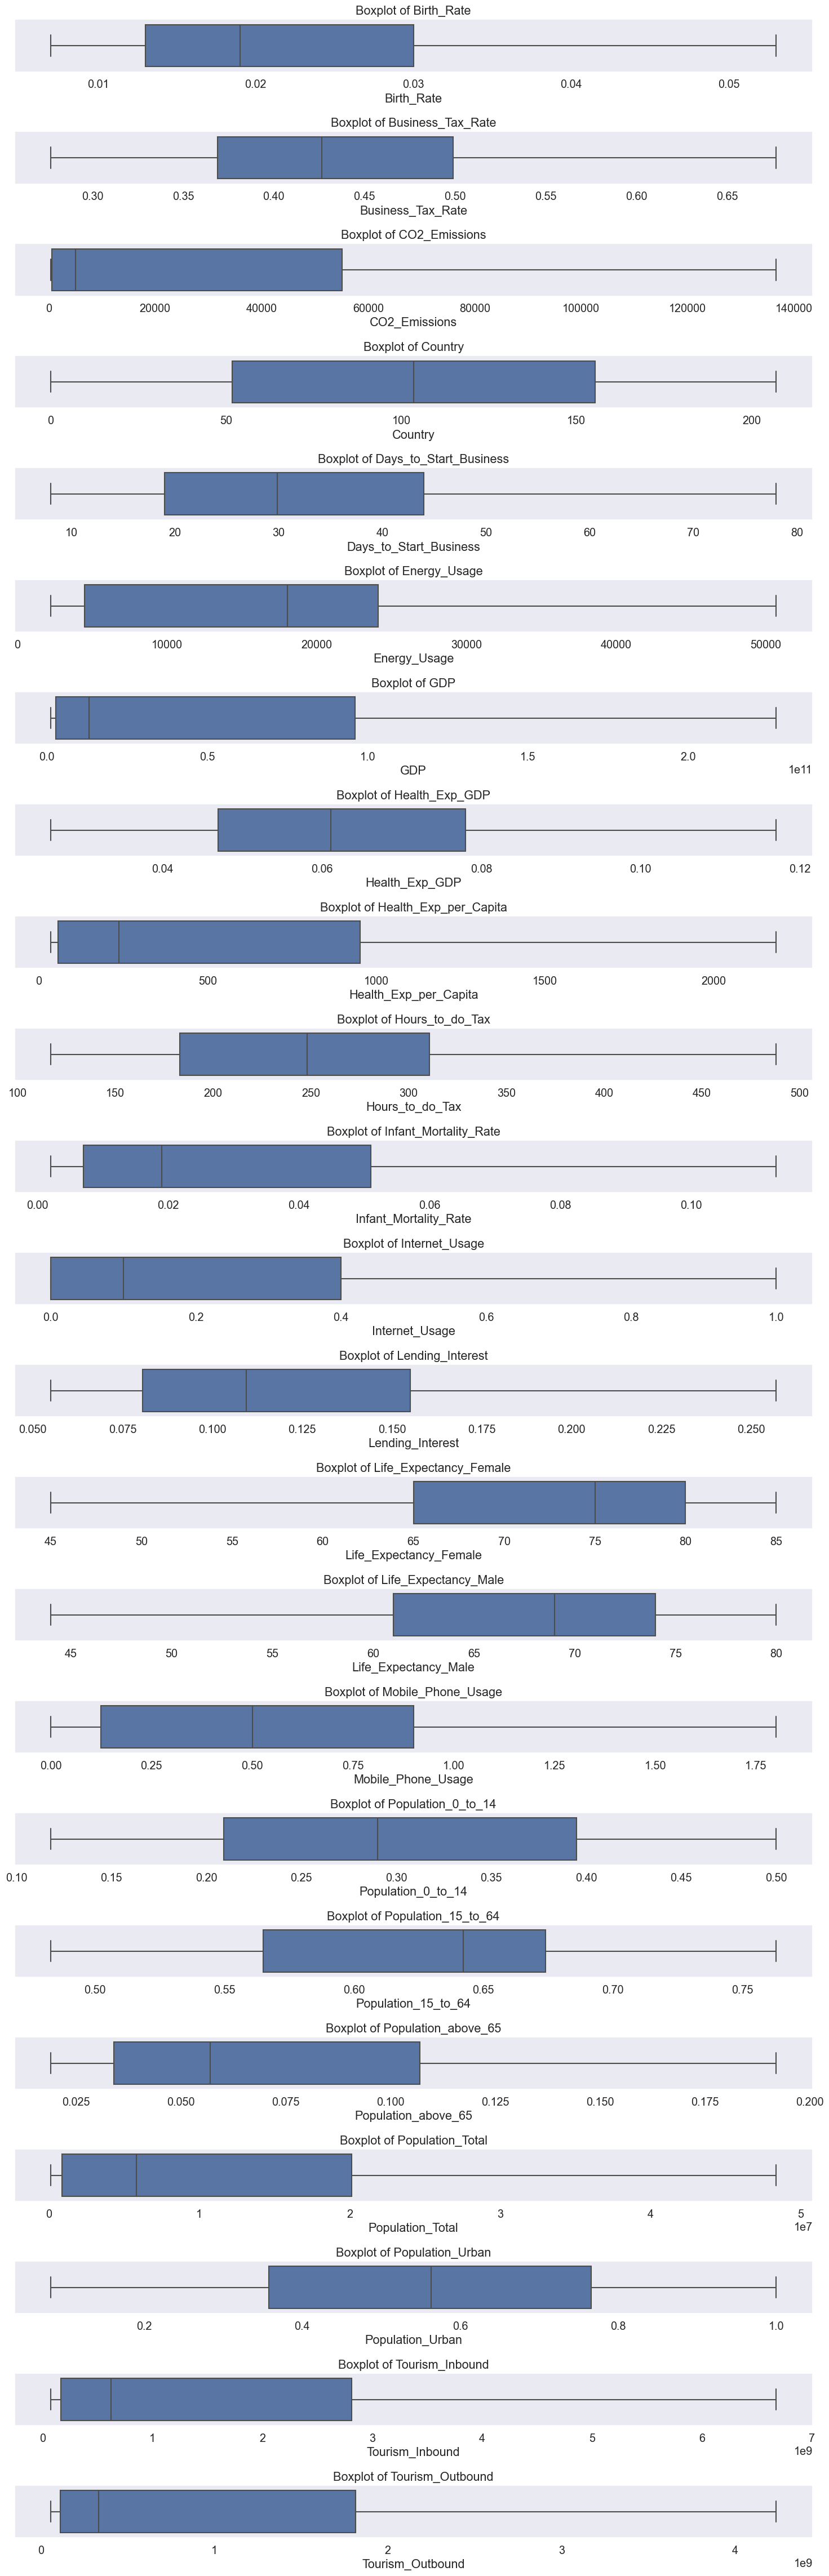

In [88]:
# Boxplots after outlier treatment
numerical_columns = df_winsorized.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(15, 2 * len(numerical_columns)))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_winsorized[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [89]:
# Current dataset after outlier treatment
df_winsorized

Birth_Rate  Business_Tax_Rate  CO2_Emissions  Country  \
0              0                  0          87931        2   
1              0                  0           9542        5   
2              0                  0           1617       20   
3              0                  0           4276       25   
4              0                  1           1041       29   
...          ...                ...            ...      ...   
2699           0                  1            374      193   
2700           0                  0          79064      198   
2701           0                  0            591      199   
2702           0                  1          79064      202   
2703           0                  0            374      204   

      Days_to_Start_Business  Energy_Usage          GDP  Health_Exp_GDP  \
0                         34         26998  54790058957               0   
1                         35          7499   9129594819               0   
2                         50          2217   2359122303               0   
3                         47          2217   5788311645               0   
4                         39         17275   2610959139               0   
...                      ...           ...          ...             ...   
2699                      22          2217   2985755160               0   
2700                       8         50717 227359498891               0   
2701                       8         20873  50004354667               0   
2702                      78         20612 227359498891               0   
2703                      16          2217   1270080228               0   

      Health_Exp_per_Capita  Hours_to_do_Tax  ...  Life_Expectancy_Female  \
0                        60              309  ...                      71   
1                        35              327  ...                      47   
2                        35              238  ...                      57   
3                       152              233  ...                      52   
4                        35              222  ...                      52   
...                     ...              ...  ...                     ...   
2699                   2185              146  ...                      83   
2700                   2185              175  ...                      81   
2701                   1308              310  ...                      80   
2702                    593              488  ...                      78   
2703                    347              143  ...                      83   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0_to_14  \
0                       67                   0                   0   
1                       44                   0                   0   
2                       53                   0                   0   
3                       49                   0                   0   
4                       49                   0                   0   
...                    ...                 ...                 ...   
2699                    78                   0                   0   
2700                    76                   1                   0   
2701                    74                   2                   0   
2702                    72                   1                   0   
2703                    76                   1                   0   

      Population_15_to_64  Population_above_65  Population_Total  \
0                       1                    0          31719449   
1                       0                    0          13924930   
2                       1                    0           6949366   
3                       1                    0           1755375   
4                       1                    0          11607944   
...                   ...                  ...               ...   
2699                    1                    0            109373   
2700                    1             

## Scale the data

In [90]:
# Standardize the data 
scaler_out = StandardScaler()
scaled_df_out = scaler_out.fit_transform(df_winsorized)
scaled_df_out.shape

(2704, 23)

## Principle Component Analysis

In [91]:
# Applying PCA on standardized data
pca_out = PCA()
pcomps_out = pca_out.fit_transform(scaled_df_out)
pcomps_out

array([[-1.10648555e+00,  1.12160651e+00,  1.93056013e+00, ...,
        -1.19108156e-01, -8.24995498e-02,  8.19476362e-04],
       [-6.14142544e+00,  1.38016229e+00, -4.05111536e-01, ...,
         3.36593146e-01,  1.06964054e-01,  2.38557540e-03],
       [-4.75989586e+00,  1.71420581e-01, -3.52686908e-01, ...,
         2.29675164e-01,  1.49259501e-01,  1.39548967e-02],
       ...,
       [ 2.81021494e+00, -1.59843470e+00, -9.83894796e-01, ...,
        -9.37782327e-02, -6.58105298e-02, -3.58115018e-03],
       [ 1.44350175e+00,  1.82808871e+00,  2.39765423e+00, ...,
         5.18461169e-02,  1.04548001e-02, -1.22172396e-02],
       [ 1.64297974e+00, -2.81238617e+00, -5.11646668e-01, ...,
        -8.06475202e-02, -1.28820605e-01,  1.32240213e-02]])

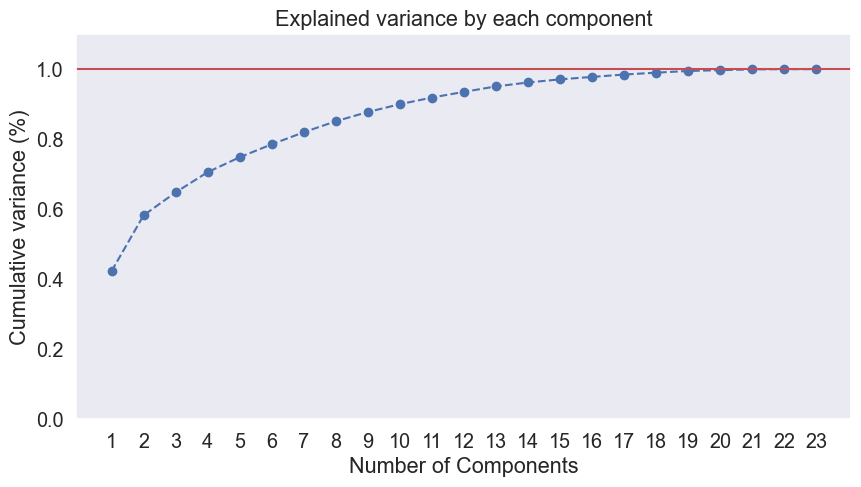

In [92]:
# Explained Variance of each component
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+scaled_df_out.shape[1], step=1)
yi = np.cumsum(pca_out.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+scaled_df_out.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [93]:
# The amount of variance that each PCA explains
var_out = pca_out.explained_variance_ratio_
var_out

array([4.22986422e-01, 1.59347976e-01, 6.56266791e-02, 5.77407387e-02,
       4.25955633e-02, 3.69772086e-02, 3.43918485e-02, 3.14200629e-02,
       2.64730179e-02, 2.22544710e-02, 1.90673807e-02, 1.61531456e-02,
       1.56489174e-02, 1.12102008e-02, 8.92069131e-03, 6.98252239e-03,
       6.79034672e-03, 5.39377591e-03, 4.77672423e-03, 2.36086056e-03,
       2.19932014e-03, 6.16624505e-04, 6.55012835e-05])

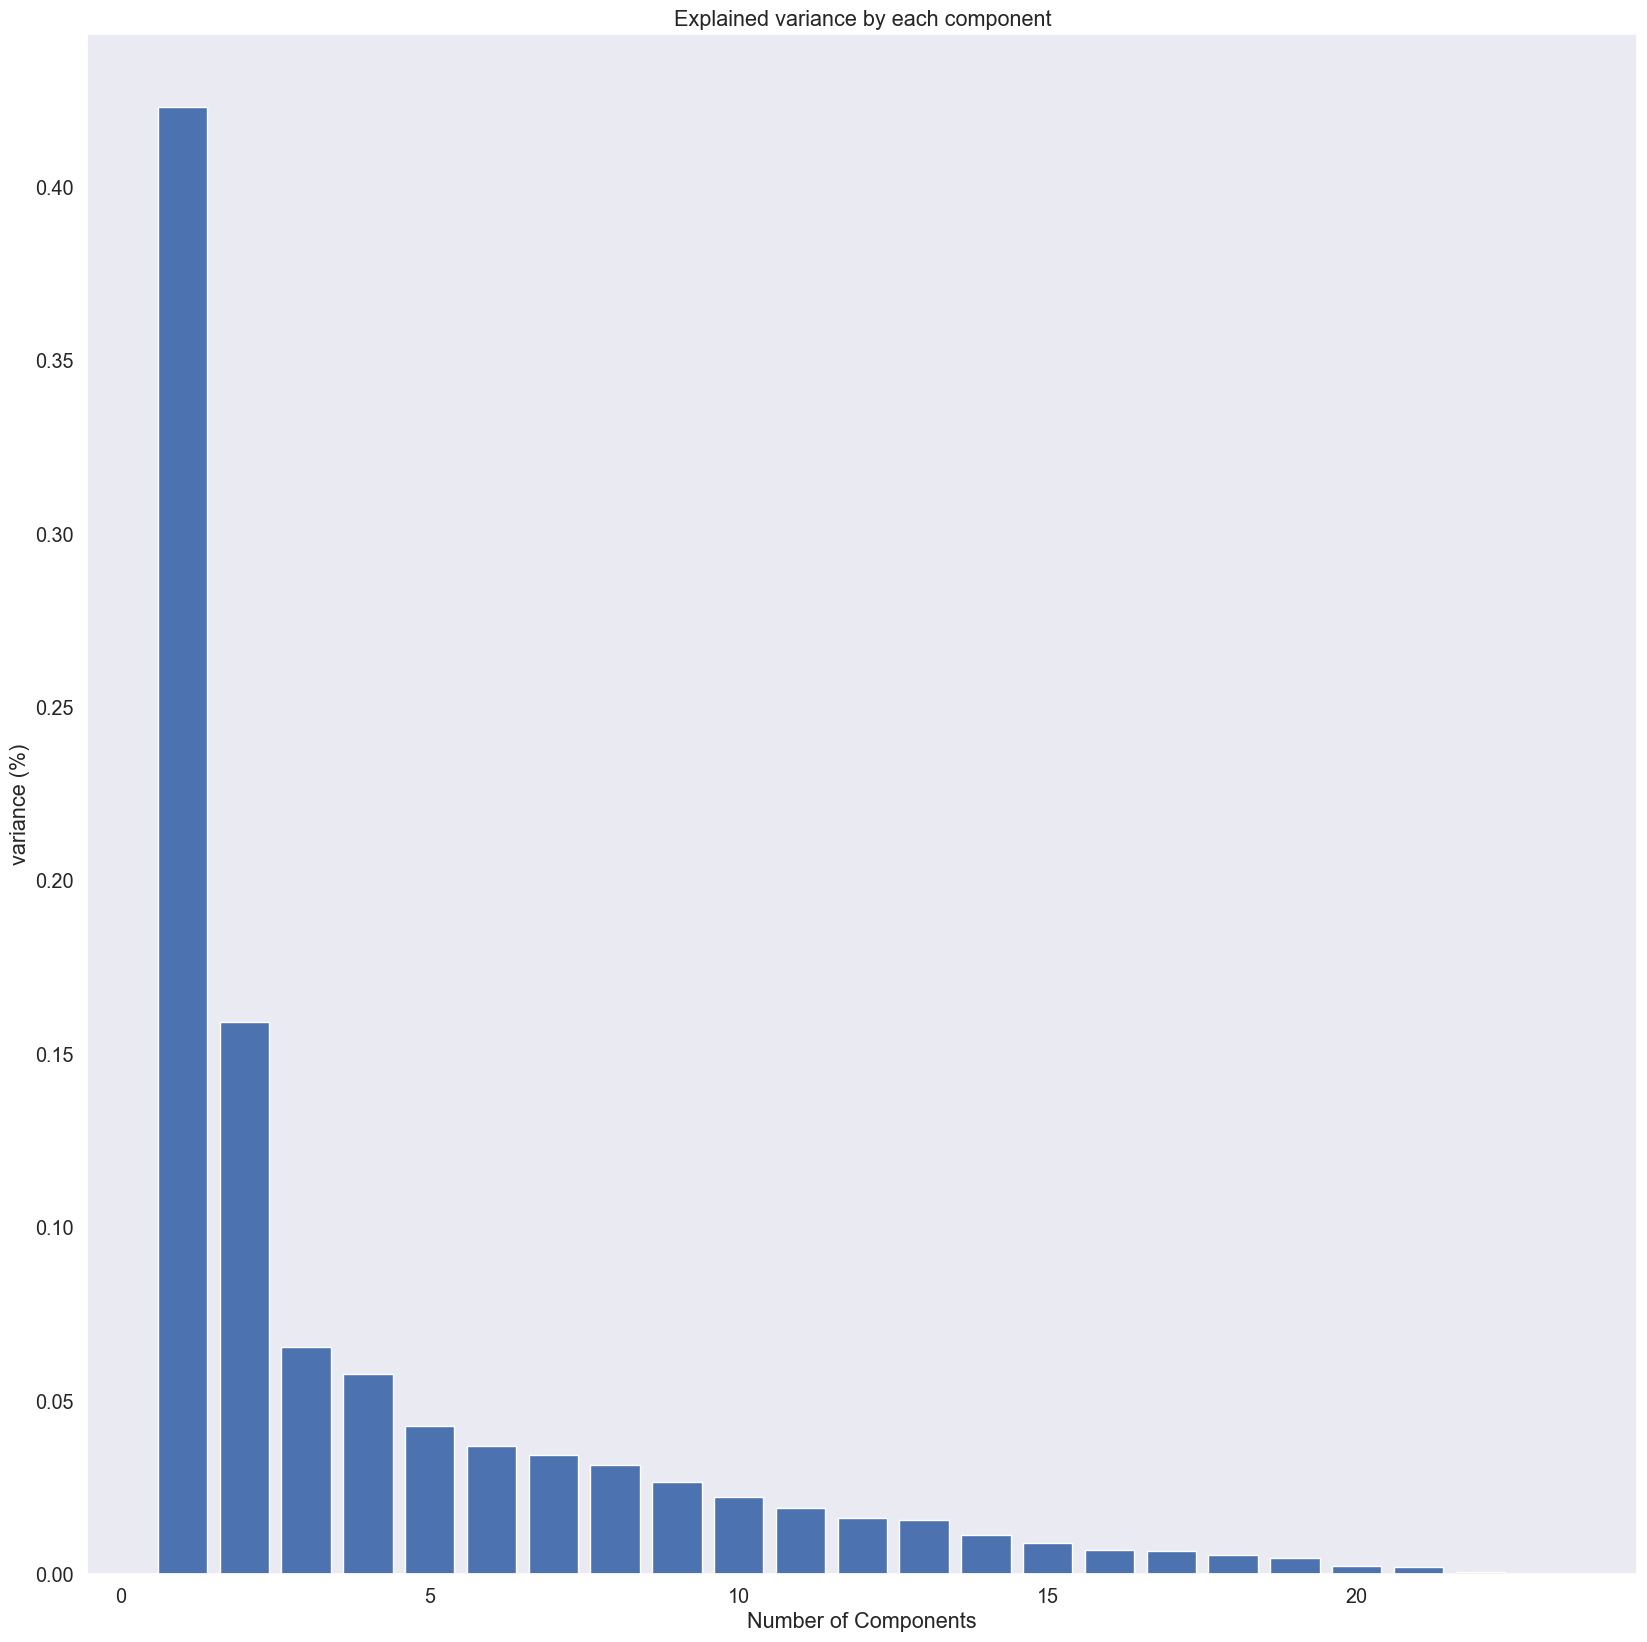

In [94]:
# Barplot to display explained variance of each component
plt.bar(range(1, len(var_out)+1),var_out)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')
plt.show()

In [95]:
# Cumulative sum of percentage explained variance
np.cumsum(var_out*100)

array([ 42.29864225,  58.23343985,  64.79610776,  70.57018164,
        74.82973796,  78.52745883,  81.96664368,  85.10864997,
        87.75595175,  89.98139886,  91.88813693,  93.50345148,
        95.06834322,  96.1893633 ,  97.08143243,  97.77968467,
        98.45871934,  98.99809693,  99.47576935,  99.71185541,
        99.93178742,  99.99344987, 100.        ])

##### As we can see the first 13 components holds 95.08% of the data.

In [96]:
# We will perform PCA on first 13 components
pca_out1 = PCA(n_components= 13)
pca_scaled_out = pca_out1.fit_transform(scaled_df_out)

In [97]:
# Converting PCA components into dataframe.
pca_scaled_out_df = pd.DataFrame(data = pca_scaled_out, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
print(pca_scaled_out_df.shape)
pca_scaled_out_df.head()

(2704, 13)


PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13
0   -1    1    2    1   -1   -0   -1   -1    0     1     0     1    -1
1   -6    1   -0   -1   -1   -1   -0    0    1    -1     1     1     1
2   -5    0   -0   -1   -2   -1    0   -1   -0     0     0     0     0
3   -4   -0    0   -0   -1   -2    0   -0   -0    -1     1     0    -0
4   -5    1   -1   -2   -1    1   -0   -1   -1    -0     0    -0     0

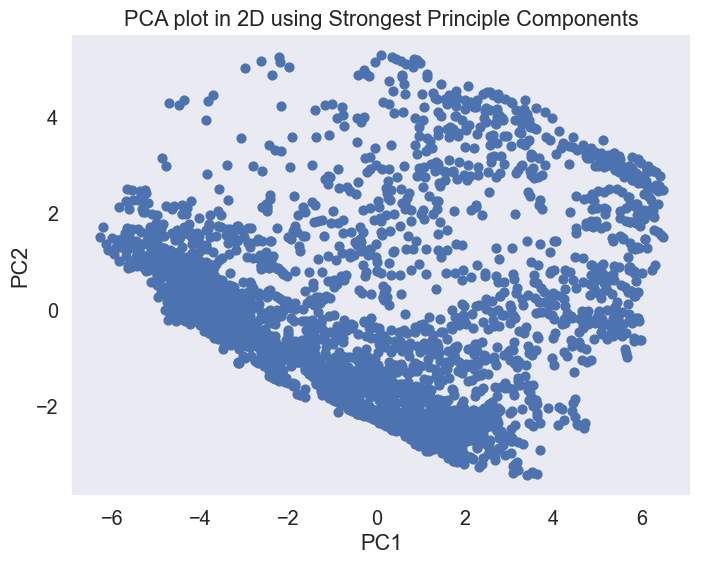

In [98]:
# PCA plot in 2D
plt.figure(figsize=(8,6))
plt.scatter(pca_scaled_out_df.iloc[:,0], pca_scaled_out_df.iloc[:,1], s=40)
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## K-Means Clustering

In [99]:
# Within cluster sum of squares (WCSS)
k_values = range(1,11)
wcss1 = []
for i in k_values:
    model = KMeans(n_clusters=i,init='k-means++', random_state=42)
    model.fit(pca_scaled_out_df)
    wcss1.append(model.inertia_)
clusters_df1 = pd.DataFrame({"num_clusters":k_values,"cluster_errors":wcss1})
clusters_df1

num_clusters  cluster_errors
0             1           59125
1             2           40591
2             3           32044
3             4           28409
4             5           25788
5             6           24739
6             7           23901
7             8           23069
8             9           22326
9            10           21498

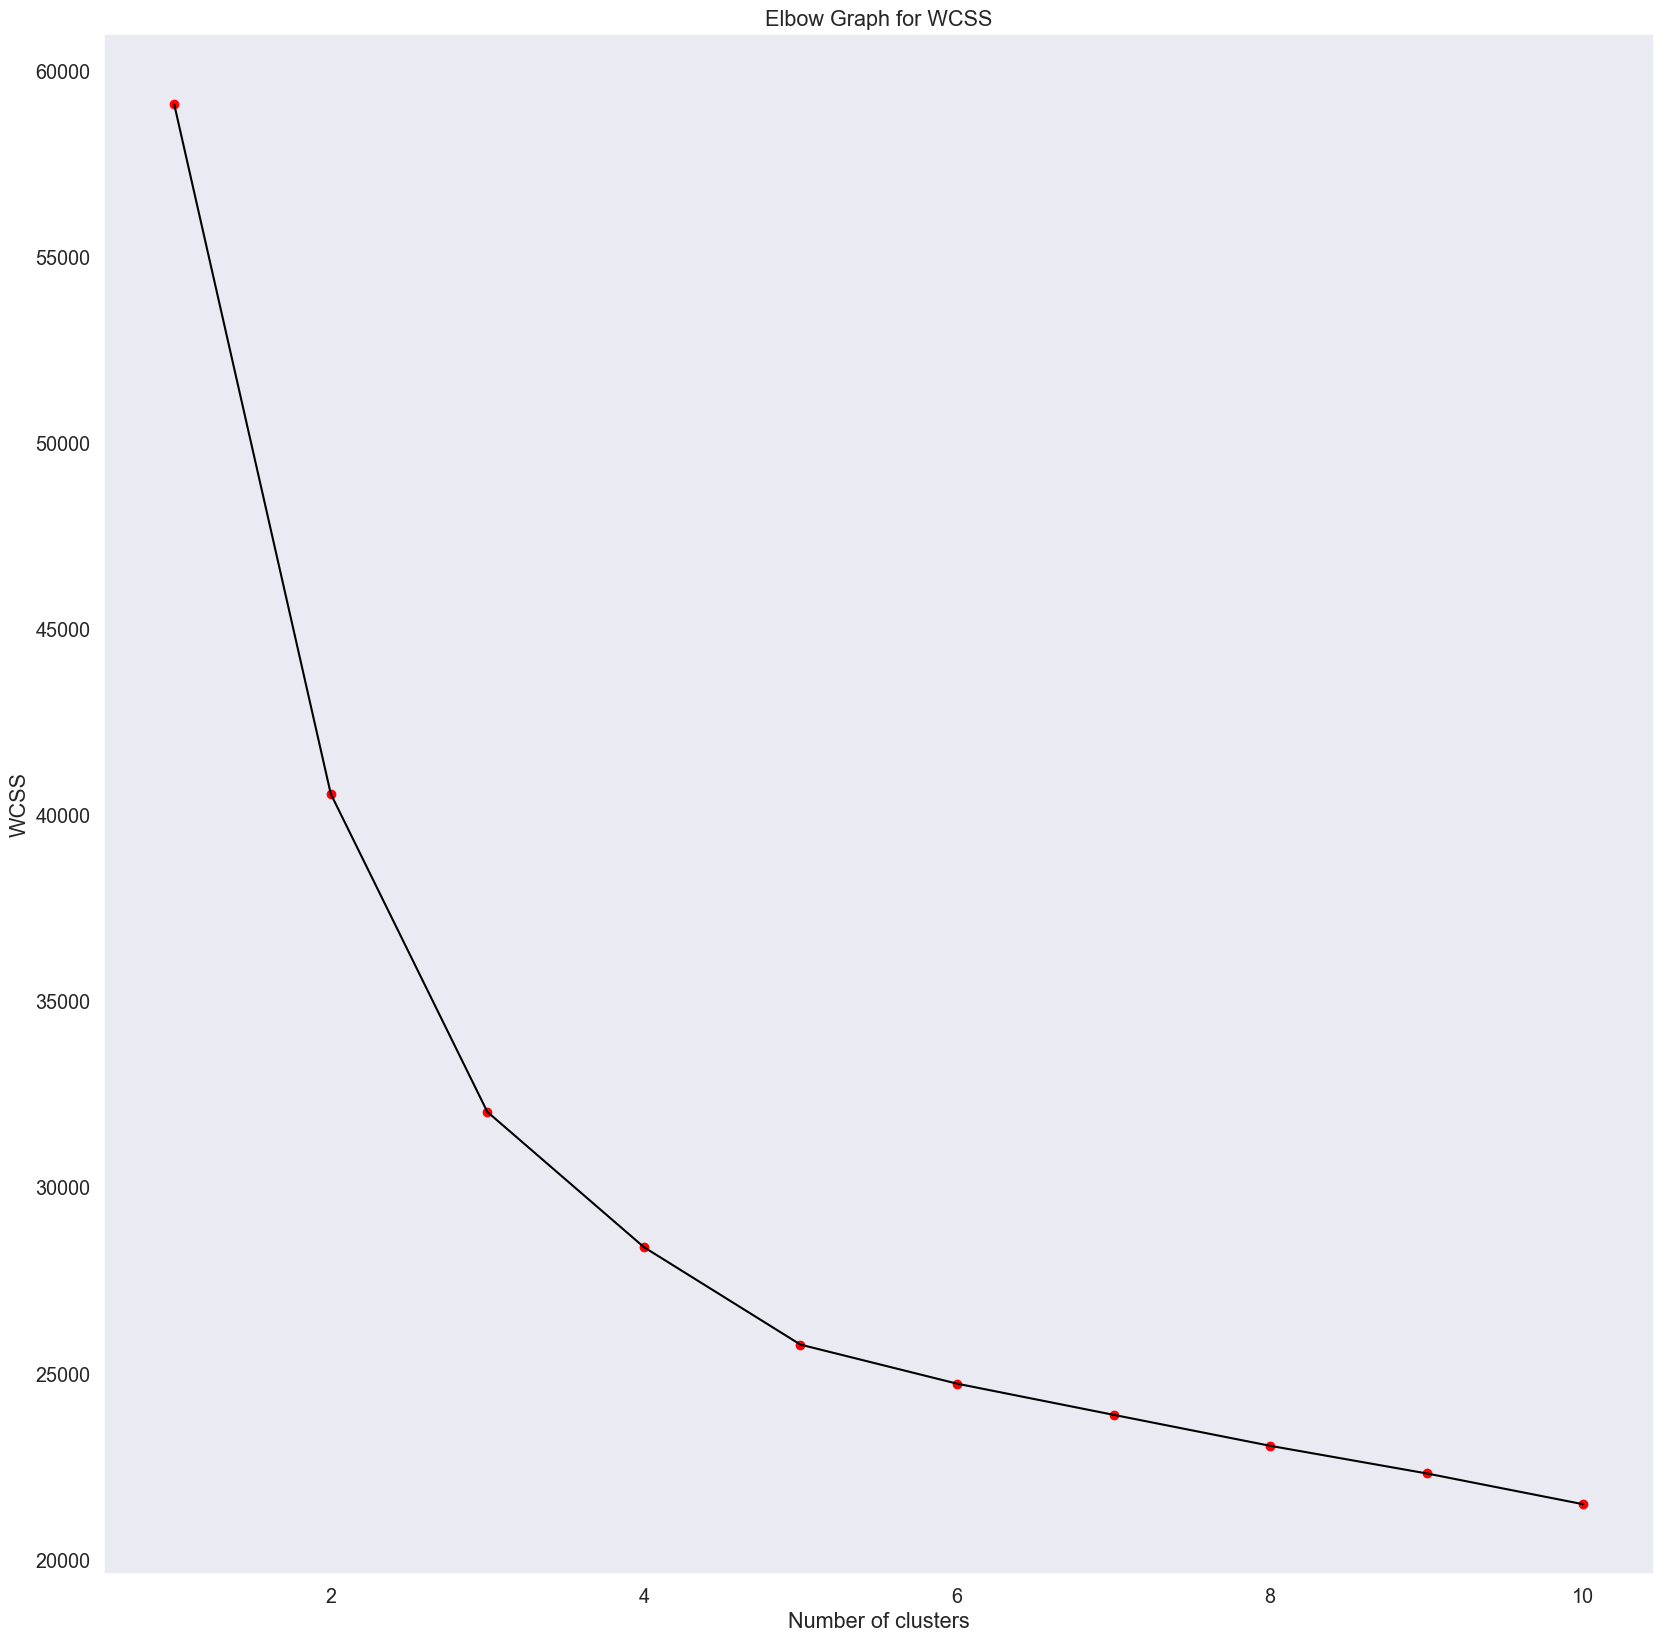

In [100]:
# Elbow Graph for WCSS
plt.plot(range(1,11),wcss1,color = 'black')
plt.scatter(range(1,11),wcss1,color='red')
plt.title('Elbow Graph for WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
# Calculating Silhouette Scores for each number of clusters
k_values = range(2,11)
sil1 = []
for i in k_values:
    model = KMeans(n_clusters=i,init='k-means++', random_state=42)
    model.fit(pca_scaled_out_df)
    c_labels = model.labels_
    sil_score1 = silhouette_score(pca_scaled_out_df,c_labels)
    sil1.append(sil_score1)
    print("For clusters =", i,"The average silhouette_score is :", sil_score1)

For clusters = 2 The average silhouette_score is : 0.2644447573877462
For clusters = 3 The average silhouette_score is : 0.2572862728902875
For clusters = 4 The average silhouette_score is : 0.2654677461399233
For clusters = 5 The average silhouette_score is : 0.20112392658092415
For clusters = 6 The average silhouette_score is : 0.16276719173707016
For clusters = 7 The average silhouette_score is : 0.1563730466974924
For clusters = 8 The average silhouette_score is : 0.15093110444249214
For clusters = 9 The average silhouette_score is : 0.14577469839531074
For clusters = 10 The average silhouette_score is : 0.13997292078051876


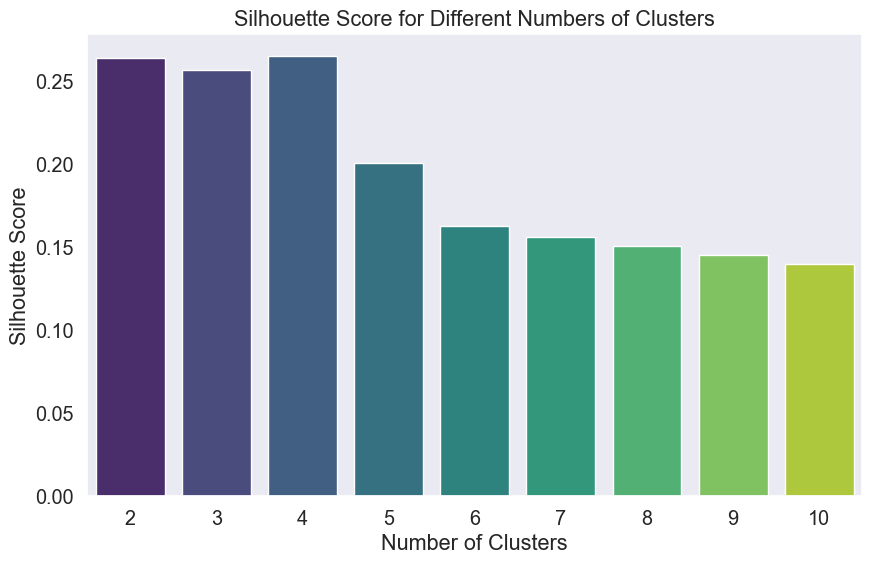

In [102]:
# Barplot of Silhouette score vs No. of clusters
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(10, 6))
sns.barplot(x=clusters, y=sil1, palette="viridis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

In [103]:
# Build K-means Model with 3 clusters
kmeans_out_model = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_out_model.fit(pca_scaled_out_df)

KMeans(n_clusters=4, random_state=42)

In [104]:
# K-means model Labels
kmeans_out_labels = kmeans_out_model.labels_
kmeans_out_labels

array([2, 1, 1, ..., 0, 2, 0])

In [105]:
# Dataframe with labels
pca_scaled_out_df['KMeans_out_Labels'] = kmeans_out_labels
pca_scaled_out_df

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
0      -1    1    2    1   -1   -0   -1   -1    0     1     0     1    -1   
1      -6    1   -0   -1   -1   -1   -0    0    1    -1     1     1     1   
2      -5    0   -0   -1   -2   -1    0   -1   -0     0     0     0     0   
3      -4   -0    0   -0   -1   -2    0   -0   -0    -1     1     0    -0   
4      -5    1   -1   -2   -1    1   -0   -1   -1    -0     0    -0     0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2699    2   -3   -0    1   -0    2    1   -1    1     1     0     1     0   
2700    6    2   -2   -1    1    1    0   -0   -0     0    -1     0    -1   
2701    3   -2   -1   -0    1    1   -0    2    1     0     0    -0    -1   
2702    1    2    2   -0    0    2    3    1    1    -0    -1    -1    -0   
2703    2   -3   -1    0    2    1   -0   -0    0     0     1    -0    -1   

      KMeans_out_Labels  
0                     2  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
2699                  0  
2700                  3  
2701                  0  
2702                  2  
2703                  0  

[2704 rows x 14 columns]

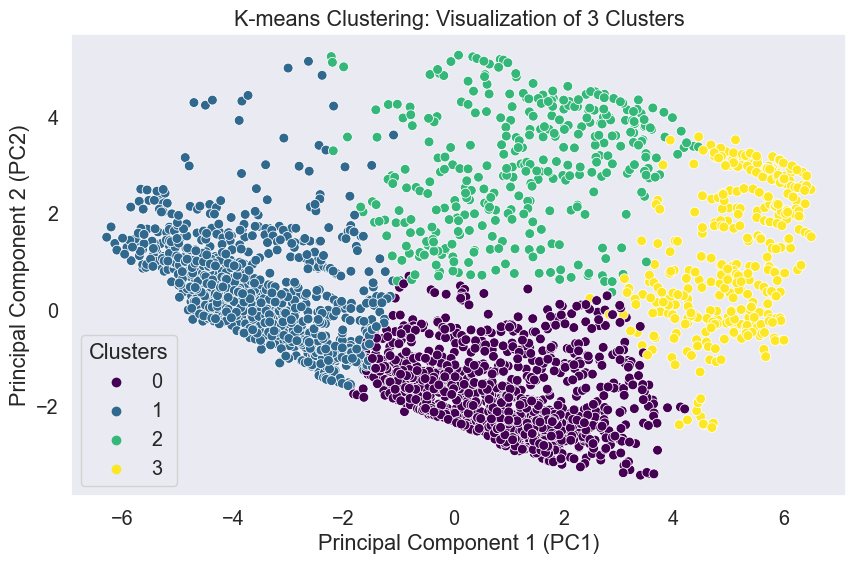

In [106]:
# Scatter plot of the first two principal components with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_out_Labels', data=pca_scaled_out_df, palette="viridis", s=50)
plt.title('K-means Clustering: Visualization of 3 Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Clusters')
plt.show()

In [107]:
# Datapoints present in each cluster
pca_scaled_out_df['KMeans_out_Labels'].value_counts()

0    1065
1     917
3     367
2     355
Name: KMeans_out_Labels, dtype: int64

### Grouping results

In [108]:
# Grouping datapoints with respective labels
grp_kmeans_out = pca_scaled_out_df.groupby(['KMeans_out_Labels'])
for x,y in grp_kmeans_out:
    print(y)
    print('__________________________________________________________________________')

      PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
26     -1   -0    1    1   -1    1    0   -1    0     1     1     0    -0   
31     -1   -1    1    1    1   -0   -1   -0    0    -1     0     0     1   
40     -0   -2    1    1    1    2    0   -1   -0     0    -0    -0     0   
49     -0   -1    0    2    1    1   -0   -1   -0     1     1    -0     0   
54     -1   -1    2   -2    1   -0   -1   -2    1    -1     0    -0     1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2697   -0   -2    0    2    0   -1    2    1   -0    -1    -0    -0    -1   
2698    1   -2   -1    2    0    1   -0    2   -2    -2    -1     0    -0   
2699    2   -3   -0    1   -0    2    1   -1    1     1     0     1     0   
2701    3   -2   -1   -0    1    1   -0    2    1     0     0    -0    -1   
2703    2   -3   -1    0    2    1   -0   -0    0     0     1    -0    -1   

      KMeans_out_Labels  
26                    0  
31                    0

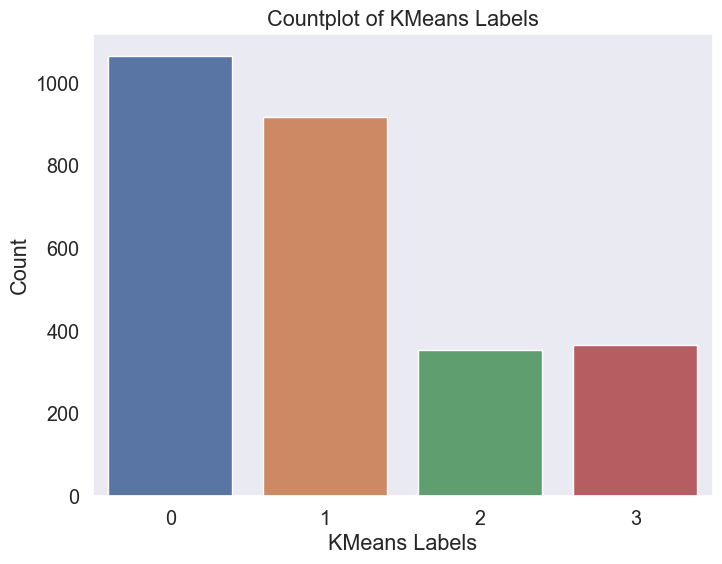

In [109]:
# Countplot of datapoints contained in each K-means label
plt.figure(figsize=(8, 6))
sns.countplot(x='KMeans_out_Labels', data=pca_scaled_out_df)
plt.title('Countplot of KMeans Labels')
plt.xlabel('KMeans Labels')
plt.ylabel('Count')
plt.show()

In [110]:
# Grouping labels based on feature means
display('After applying PCA and K-means Clustering on dataset:',df_winsorized.groupby(pca_scaled_out_df['KMeans_out_Labels']).agg(['mean']))

'After applying PCA and K-means Clustering on dataset:'

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                        mean              mean          mean    mean   
KMeans_out_Labels                                                      
0                          0                 0         11060      96   
1                          0                 0          9586     106   
2                          0                 0        112757     120   
3                          0                 0         81504     103   

                  Days_to_Start_Business Energy_Usage          GDP  \
                                    mean         mean         mean   
KMeans_out_Labels                                                    
0                                     31        10356  19342883682   
1                                     43        13555  12965836611   
2                                     33        43501 160904721066   
3                                     19        37620 205838544923   

                  Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                            mean                  mean            mean  ...   
KMeans_out_Labels                                                       ...   
0                              0                   815             240  ...   
1                              0                   122             274  ...   
2                              0                   247             316  ...   
3                              0                  1926             215  ...   

                  Life_Expectancy_Female Life_Expectancy_Male  \
                                    mean                 mean   
KMeans_out_Labels                                               
0                                     78                   72   
1                                     60                   57   
2                                     73                   67   
3                                     82                   77   

                  Mobile_Phone_Usage Population_0_to_14 Population_15_to_64  \
                                mean               mean                mean   
KMeans_out_Labels                                                             
0                                  1                  0                   1   
1                                  0                  0                   1   
2                                  1                  0                   1   
3                                  1                  0                   1   

                  Population_above_65 Population_Total Population_Urban  \
                                 mean             mean             mean   
KMeans_out_Labels                                                         
0                                   0          3157823                1   
1                                   0         12362967                0   
2                                   0         39164768                1   
3                                   0         21507710                1   

                  Tourism_Inbound Tourism_Outbound  
                             mean             mean  
KMeans_out_Labels                                   
0                      1086951965        550885889  
1                       462488955        276470525  
2                      3835445956       2757235412  
3                      6149574932       4007825613  

[4 rows x 23 columns]

In [111]:
# Sort each column separately in ascending order based on mean values
mean_sorted_kmeans_out = df_winsorized.groupby(pca_scaled_out_df['KMeans_out_Labels']).agg(['mean'])
for col in mean_sorted_kmeans_out.columns:
    mean_sorted_kmeans_out = mean_sorted_kmeans_out.sort_values(by=col, ascending=True)
display(mean_sorted_kmeans_out)

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                        mean              mean          mean    mean   
KMeans_out_Labels                                                      
1                          0                 0          9586     106   
0                          0                 0         11060      96   
2                          0                 0        112757     120   
3                          0                 0         81504     103   

                  Days_to_Start_Business Energy_Usage          GDP  \
                                    mean         mean         mean   
KMeans_out_Labels                                                    
1                                     43        13555  12965836611   
0                                     31        10356  19342883682   
2                                     33        43501 160904721066   
3                                     19        37620 205838544923   

                  Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                            mean                  mean            mean  ...   
KMeans_out_Labels                                                       ...   
1                              0                   122             274  ...   
0                              0                   815             240  ...   
2                              0                   247             316  ...   
3                              0                  1926             215  ...   

                  Life_Expectancy_Female Life_Expectancy_Male  \
                                    mean                 mean   
KMeans_out_Labels                                               
1                                     60                   57   
0                                     78                   72   
2                                     73                   67   
3                                     82                   77   

                  Mobile_Phone_Usage Population_0_to_14 Population_15_to_64  \
                                mean               mean                mean   
KMeans_out_Labels                                                             
1                                  0                  0                   1   
0                                  1                  0                   1   
2                                  1                  0                   1   
3                                  1                  0                   1   

                  Population_above_65 Population_Total Population_Urban  \
                                 mean             mean             mean   
KMeans_out_Labels                                                         
1                                   0         12362967                0   
0                                   0          3157823                1   
2                                   0         39164768                1   
3                                   0         21507710                1   

                  Tourism_Inbound Tourism_Outbound  
                             mean             mean  
KMeans_out_Labels                                   
1                       462488955        276470525  
0                      1086951965        550885889  
2                      3835445956       2757235412  
3                      6149574932       4007825613  

[4 rows x 23 columns]

In [112]:
# Sorting based on the mean values across all feature columns toghether
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Total_mean_sorted_kmeans_out = df_winsorized.groupby(pca_scaled_out_df['KMeans_out_Labels']).agg(['mean']).mean(axis=1).sort_values(ascending=True)
Total_mean_sorted_kmeans_out

KMeans_out_Labels
1    596399255
0    912343570
2   7284205405
3   9392068466
dtype: float64

In [113]:
# KMeans Model Silhouette score without outliers
k_sil2 = silhouette_score(pca_scaled_out_df,kmeans_out_labels)
k_sil2

0.29270336462990754

## Hierarchical Clustering

In [114]:
# Calculating Silhouette Scores for each clusters and linkages
c_values = range(2, 6)
distances = ['euclidean', 'manhattan', 'minkowski']

for i in c_values:
    best_linkage = None
    best_silhouette_score = -1
    
    for linkages in ["single", "complete", "average"]:
        for distance in distances:
            model1 = AgglomerativeClustering(n_clusters=i, linkage=linkages, affinity=distance)
            model1.fit(pca_scaled_out_df)
            c_labels = model1.labels_
            sil_score = silhouette_score(pca_scaled_out_df, c_labels)

            print(f"For clusters = {i}, linkage: {linkages}, distance: {distance}, silhouette_score: {sil_score}")
            
            # Update the best linkage if the current score is higher
            if sil_score > best_silhouette_score:
                best_silhouette_score = sil_score
                best_linkage = linkages
    
    print(f"The best linkage for {i} clusters is: {best_linkage} with silhouette_score: {best_silhouette_score}")
    print()

    # Exclusive section for Ward linkage
    ward_model = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean')
    ward_model.fit(pca_scaled_out_df)
    ward_labels = ward_model.labels_
    ward_sil_score = silhouette_score(pca_scaled_out_df, ward_labels)
    print(f"For clusters = {i}, exclusive Ward linkage with Euclidean distance silhouette_score: {ward_sil_score}")
    print()

For clusters = 2, linkage: single, distance: euclidean, silhouette_score: -0.037460626869495244
For clusters = 2, linkage: single, distance: manhattan, silhouette_score: -0.037460626869495244
For clusters = 2, linkage: single, distance: minkowski, silhouette_score: -0.037460626869495244
For clusters = 2, linkage: complete, distance: euclidean, silhouette_score: 0.24015387506812744
For clusters = 2, linkage: complete, distance: manhattan, silhouette_score: 0.24294121997195017
For clusters = 2, linkage: complete, distance: minkowski, silhouette_score: 0.24015387506812744
For clusters = 2, linkage: average, distance: euclidean, silhouette_score: 0.27003810793199096
For clusters = 2, linkage: average, distance: manhattan, silhouette_score: 0.2777958198744653
For clusters = 2, linkage: average, distance: minkowski, silhouette_score: 0.27003810793199096
The best linkage for 2 clusters is: average with silhouette_score: 0.2777958198744653

For clusters = 2, exclusive Ward linkage with Euclide

In [115]:
# # Fitting Hierarchical clustering model
hier_out_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
hier_out_model.fit(pca_scaled_out_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [116]:
# Hierarchical model Labels
hier_out_labels = hier_out_model.labels_
hier_out_labels

array([0, 1, 1, ..., 3, 0, 3], dtype=int64)

In [117]:
# Dataframe with labels
pca_scaled_out_df['Hier_out_Labels'] = hier_out_labels
pca_scaled_out_df

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
0      -1    1    2    1   -1   -0   -1   -1    0     1     0     1    -1   
1      -6    1   -0   -1   -1   -1   -0    0    1    -1     1     1     1   
2      -5    0   -0   -1   -2   -1    0   -1   -0     0     0     0     0   
3      -4   -0    0   -0   -1   -2    0   -0   -0    -1     1     0    -0   
4      -5    1   -1   -2   -1    1   -0   -1   -1    -0     0    -0     0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2699    2   -3   -0    1   -0    2    1   -1    1     1     0     1     0   
2700    6    2   -2   -1    1    1    0   -0   -0     0    -1     0    -1   
2701    3   -2   -1   -0    1    1   -0    2    1     0     0    -0    -1   
2702    1    2    2   -0    0    2    3    1    1    -0    -1    -1    -0   
2703    2   -3   -1    0    2    1   -0   -0    0     0     1    -0    -1   

      KMeans_out_Labels  Hier_out_Labels  
0                     2                0  
1                     1                1  
2                     1                1  
3                     1                1  
4                     1                1  
...                 ...              ...  
2699                  0                3  
2700                  3                2  
2701                  0                3  
2702                  2                0  
2703                  0                3  

[2704 rows x 15 columns]

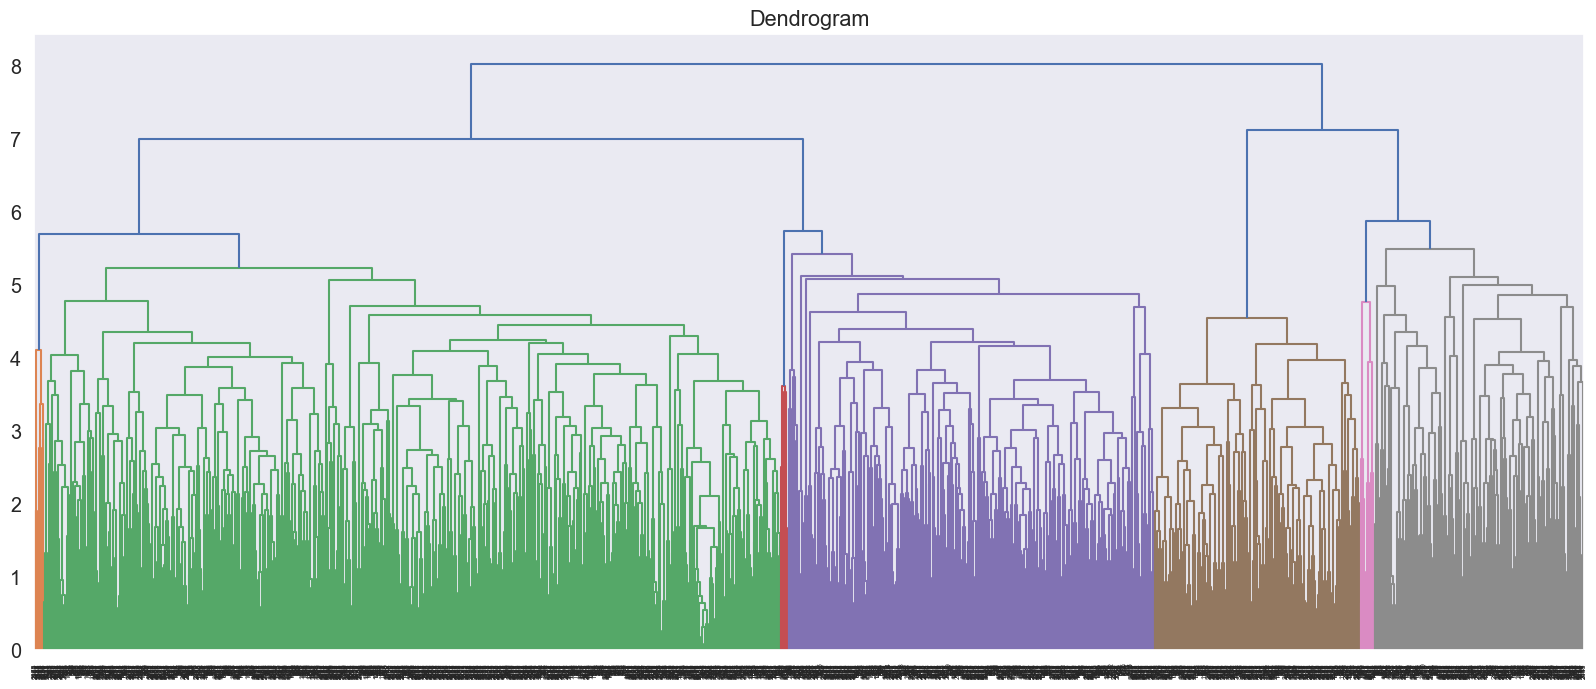

In [118]:
# Dendogram
plt.figure(figsize=(20, 8))  
plt.title("Dendrogram")  
dend = hierarchy.dendrogram(hierarchy.linkage(pca_scaled_out_df, method='average'))

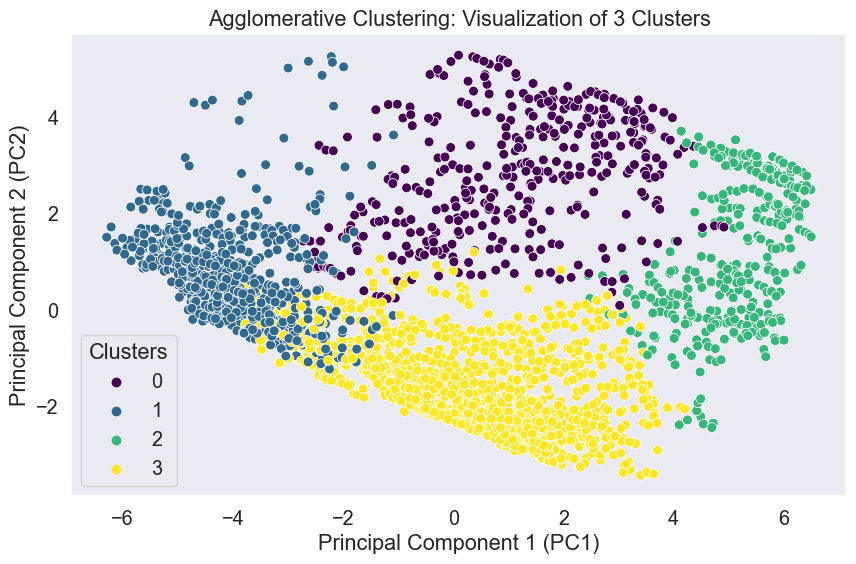

In [119]:
# Scatter plot of the first two principal components with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Hier_out_Labels', data=pca_scaled_out_df, palette="viridis", s=50)
plt.title('Agglomerative Clustering: Visualization of 3 Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Clusters')
plt.show()

In [120]:
# Datapoints present in each cluster
pca_scaled_out_df['Hier_out_Labels'].value_counts()

3    1302
1     652
0     390
2     360
Name: Hier_out_Labels, dtype: int64

### Grouping results

In [121]:
# Grouping datapoints with respective labels
grp_hier_out = pca_scaled_out_df.groupby(['Hier_out_Labels'])
for x,y in grp_hier_out:
    print(y)
    print('__________________________________________________________________________')

      PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
0      -1    1    2    1   -1   -0   -1   -1    0     1     0     1    -1   
14     -0    3    1    0   -0   -1   -1   -1   -0     1    -0     1     0   
43     -0    4   -1    1    1   -0   -0   -0    0    -0     1     0    -1   
56     -3    1    1    1   -1   -1   -1   -1   -0    -0    -1     1     0   
60      2    4    1    1   -1   -1   -1   -1   -1     0     0    -0     1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2667    3    2    2   -3    0   -1    2    1    2    -1    -1    -1     1   
2671    2    2    0   -1   -1    1   -1   -1    1    -1    -1    -1    -0   
2686    3    3   -0    0   -1    1   -0   -0    1     1    -0    -1     0   
2690    2    1    0    1    0   -0   -0    1    2    -0    -0    -0     0   
2702    1    2    2   -0    0    2    3    1    1    -0    -1    -1    -0   

      KMeans_out_Labels  Hier_out_Labels  
0                     2         

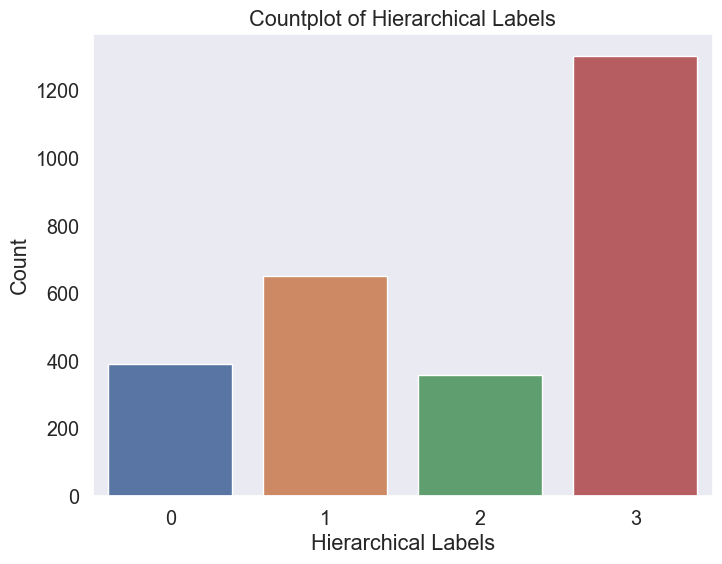

In [122]:
# Countplot of Hierarchical labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Hier_out_Labels', data=pca_scaled_out_df)
plt.title('Countplot of Hierarchical Labels')
plt.xlabel('Hierarchical Labels')
plt.ylabel('Count')
plt.show()

In [123]:
# Grouping labels based on feature means
display('After applying PCA and Hierarchical Clustering on dataset:',df_winsorized.groupby(pca_scaled_out_df['Hier_out_Labels']).agg(['mean']))

'After applying PCA and Hierarchical Clustering on dataset:'

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                      mean              mean          mean    mean   
Hier_out_Labels                                                      
0                        0                 0        106881     118   
1                        0                 0          8542     101   
2                        0                 0         81506     102   
3                        0                 0         10687     101   

                Days_to_Start_Business Energy_Usage          GDP  \
                                  mean         mean         mean   
Hier_out_Labels                                                    
0                                   35        41540 152995089937   
1                                   44        14092  14406525640   
2                                   20        37598 204224336484   
3                                   32        10587  17336301331   

                Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                          mean                  mean            mean  ...   
Hier_out_Labels                                                       ...   
0                            0                   250             307  ...   
1                            0                   136             291  ...   
2                            0                  1939             219  ...   
3                            0                   684             238  ...   

                Life_Expectancy_Female Life_Expectancy_Male  \
                                  mean                 mean   
Hier_out_Labels                                               
0                                   73                   68   
1                                   56                   54   
2                                   82                   77   
3                                   76                   71   

                Mobile_Phone_Usage Population_0_to_14 Population_15_to_64  \
                              mean               mean                mean   
Hier_out_Labels                                                             
0                                1                  0                   1   
1                                0                  0                   1   
2                                1                  0                   1   
3                                1                  0                   1   

                Population_above_65 Population_Total Population_Urban  \
                               mean             mean             mean   
Hier_out_Labels                                                         
0                                 0         39076282                1   
1                                 0         13174986                0   
2                                 0         21551831                1   
3                                 0          3769773                1   

                Tourism_Inbound Tourism_Outbound  
                           mean             mean  
Hier_out_Labels                                   
0                    3584275897       2588946886  
1                     498334509        324065798  
2                    6136791667       3985841667  
3                     974006781        486961850  

[4 rows x 23 columns]

In [124]:
# Sort each column separately in ascending order based on mean values
mean_sorted_hier_out = df_winsorized.groupby(pca_scaled_out_df['Hier_out_Labels']).agg(['mean'])
for col in mean_sorted_hier_out.columns:
    mean_sorted_hier_out = mean_sorted_hier_out.sort_values(by=col, ascending=True)
display(mean_sorted_hier_out)

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
                      mean              mean          mean    mean   
Hier_out_Labels                                                      
1                        0                 0          8542     101   
3                        0                 0         10687     101   
0                        0                 0        106881     118   
2                        0                 0         81506     102   

                Days_to_Start_Business Energy_Usage          GDP  \
                                  mean         mean         mean   
Hier_out_Labels                                                    
1                                   44        14092  14406525640   
3                                   32        10587  17336301331   
0                                   35        41540 152995089937   
2                                   20        37598 204224336484   

                Health_Exp_GDP Health_Exp_per_Capita Hours_to_do_Tax  ...  \
                          mean                  mean            mean  ...   
Hier_out_Labels                                                       ...   
1                            0                   136             291  ...   
3                            0                   684             238  ...   
0                            0                   250             307  ...   
2                            0                  1939             219  ...   

                Life_Expectancy_Female Life_Expectancy_Male  \
                                  mean                 mean   
Hier_out_Labels                                               
1                                   56                   54   
3                                   76                   71   
0                                   73                   68   
2                                   82                   77   

                Mobile_Phone_Usage Population_0_to_14 Population_15_to_64  \
                              mean               mean                mean   
Hier_out_Labels                                                             
1                                0                  0                   1   
3                                1                  0                   1   
0                                1                  0                   1   
2                                1                  0                   1   

                Population_above_65 Population_Total Population_Urban  \
                               mean             mean             mean   
Hier_out_Labels                                                         
1                                 0         13174986                0   
3                                 0          3769773                1   
0                                 0         39076282                1   
2                                 0         21551831                1   

                Tourism_Inbound Tourism_Outbound  
                           mean             mean  
Hier_out_Labels                                   
1                     498334509        324065798  
3                     974006781        486961850  
0                    3584275897       2588946886  
2                    6136791667       3985841667  

[4 rows x 23 columns]

In [125]:
# Sorting based on the mean values across all feature columns toghether
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Total_mean_sorted_hier_out = df_winsorized.groupby(pca_scaled_out_df['Hier_out_Labels']).agg(['mean']).mean(axis=1).sort_values(ascending=True)
Total_mean_sorted_hier_out

Hier_out_Labels
1    662701054
3    817437488
0   6922066882
2   9320375791
dtype: float64

In [126]:
# Hierarchical Model Silhouette score without outliers
hier_sil2 = silhouette_score(pca_scaled_out_df,hier_out_labels)
hier_sil2

0.29906113423140596

## DBSCAN 

In [127]:
# Build a DBSCAN model
dbscan_out_model = DBSCAN(eps=3, min_samples=4)
dbscan_out_model.fit(pca_scaled_out_df)

DBSCAN(eps=3, min_samples=4)

In [128]:
# DBSCAN model Labels
dbscan_out_labels = dbscan_out_model.labels_
dbscan_out_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
# Dataframe with labels 
# -1 Depicts Noise data.
pca_scaled_out_df['Dbscan_out_Labels'] = dbscan_out_labels
pca_scaled_out_df

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  \
0      -1    1    2    1   -1   -0   -1   -1    0     1     0     1    -1   
1      -6    1   -0   -1   -1   -1   -0    0    1    -1     1     1     1   
2      -5    0   -0   -1   -2   -1    0   -1   -0     0     0     0     0   
3      -4   -0    0   -0   -1   -2    0   -0   -0    -1     1     0    -0   
4      -5    1   -1   -2   -1    1   -0   -1   -1    -0     0    -0     0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
2699    2   -3   -0    1   -0    2    1   -1    1     1     0     1     0   
2700    6    2   -2   -1    1    1    0   -0   -0     0    -1     0    -1   
2701    3   -2   -1   -0    1    1   -0    2    1     0     0    -0    -1   
2702    1    2    2   -0    0    2    3    1    1    -0    -1    -1    -0   
2703    2   -3   -1    0    2    1   -0   -0    0     0     1    -0    -1   

      KMeans_out_Labels  Hier_out_Labels  Dbscan_out_Labels  
0                     2                0                  0  
1                     1                1                  0  
2                     1                1                  0  
3                     1                1                  0  
4                     1                1                  0  
...                 ...              ...                ...  
2699                  0                3                  0  
2700                  3                2                  0  
2701                  0                3                  0  
2702                  2                0                  0  
2703                  0                3                  0  

[2704 rows x 16 columns]

In [130]:
# Unique labels
pca_scaled_out_df['Dbscan_out_Labels'].unique()

array([ 0, -1], dtype=int64)

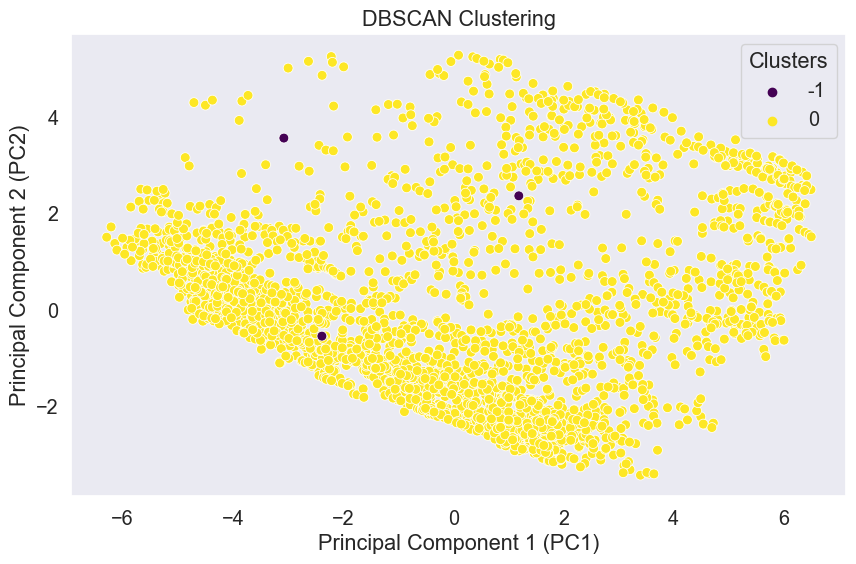

In [131]:
# Scatter plot of the first two principal components with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Dbscan_out_Labels', data=pca_scaled_out_df, palette="viridis", s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Clusters')
plt.show()

In [132]:
# Datapoints in each cluster
pca_scaled_out_df['Dbscan_out_Labels'].value_counts()

 0    2701
-1       3
Name: Dbscan_out_Labels, dtype: int64

In [133]:
# DBSCAN Model Silhouette score
db_sil2 = silhouette_score(pca_scaled_out_df,dbscan_out_labels)
db_sil2

0.023496470494555645

# PART 3: T-SNE

## Apply TSNE

In [134]:
# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df2)

In [135]:
X_tsne

array([[ 27.559067,  16.786972],
       [ -5.708753, -34.197037],
       [-40.512543,  32.16894 ],
       ...,
       [ 26.117228,  21.466192],
       [ 48.425503,   7.766132],
       [-53.822857, -15.431818]], dtype=float32)

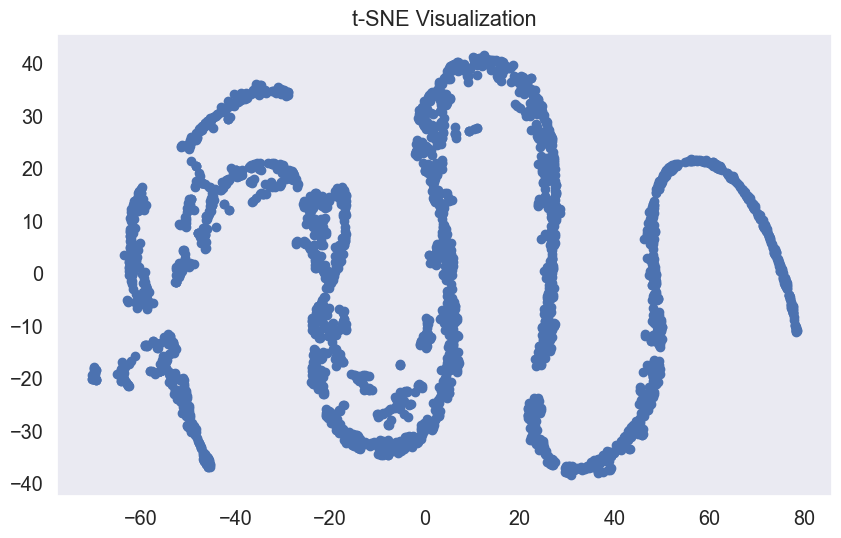

In [136]:
# Scatterplot to visualize TSNE components
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis')
plt.title('t-SNE Visualization')
plt.show()

In [137]:
# Compose TSNE components into DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df

Dimension 1  Dimension 2
0              28           17
1              -6          -34
2             -41           32
3             -23          -11
4             -38           33
...           ...          ...
2699          -28           19
2700           78          -11
2701           26           21
2702           48            8
2703          -54          -15

[2704 rows x 2 columns]

## K-Means Clustering

In [138]:
# K-means using TSNE
kmeans_tsne = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=3, random_state=42)

In [139]:
# Model labels
k_labels = kmeans_tsne.fit_predict(X_tsne)
k_labels

array([1, 0, 2, ..., 1, 1, 2])

In [140]:
# Dataframe with labels
tsne_df['K_Labels'] = k_labels
tsne_df

Dimension 1  Dimension 2  K_Labels
0              28           17         1
1              -6          -34         0
2             -41           32         2
3             -23          -11         0
4             -38           33         2
...           ...          ...       ...
2699          -28           19         2
2700           78          -11         1
2701           26           21         1
2702           48            8         1
2703          -54          -15         2

[2704 rows x 3 columns]

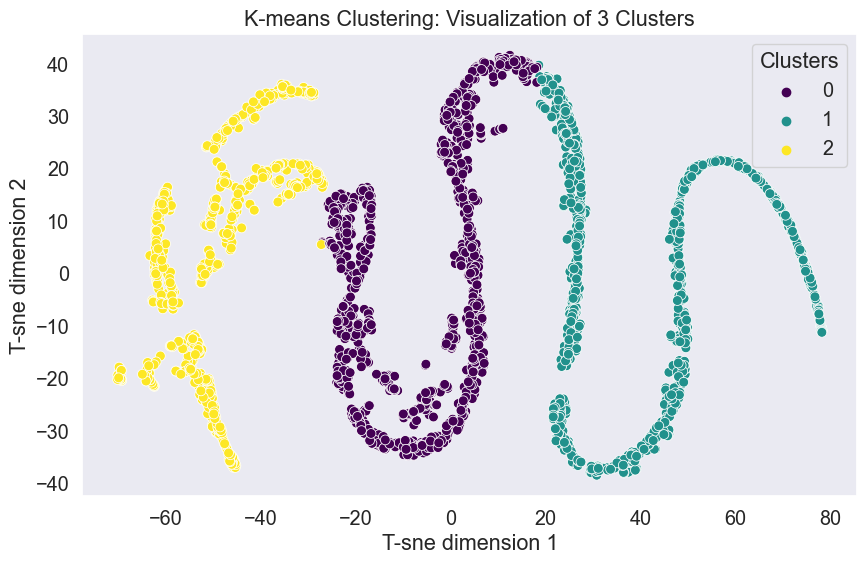

In [141]:
# Scatter plot of t-sne 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue=k_labels, data=tsne_df, palette="viridis", s=50)
plt.title('K-means Clustering: Visualization of 3 Clusters')
plt.xlabel('T-sne dimension 1')
plt.ylabel('T-sne dimension 2')
plt.legend(title='Clusters')
plt.show()

In [142]:
# Datapoints present in each cluster
tsne_df['K_Labels'].value_counts()

0    1017
1     959
2     728
Name: K_Labels, dtype: int64

### Grouping Results

In [143]:
# Grouping datapoints with respective labels
grp_kmeans_tsne = tsne_df.groupby(['K_Labels'])
for x,y in grp_kmeans_tsne:
    print(y)
    print('__________________________________________________________________________')

      Dimension 1  Dimension 2  K_Labels
1              -6          -34         0
3             -23          -11         0
6              -4          -34         0
10              2           14         0
12              2          -28         0
...           ...          ...       ...
2687            2          -26         0
2689           -0           33         0
2692          -17          -10         0
2697          -20           -1         0
2698           -1           30         0

[1017 rows x 3 columns]
__________________________________________________________________________
      Dimension 1  Dimension 2  K_Labels
0              28           17         1
14             25          -15         1
32             20           36         1
36             27           26         1
42             27           -3         1
...           ...          ...       ...
2690           44          -29         1
2691           25          -15         1
2700           78          -11         

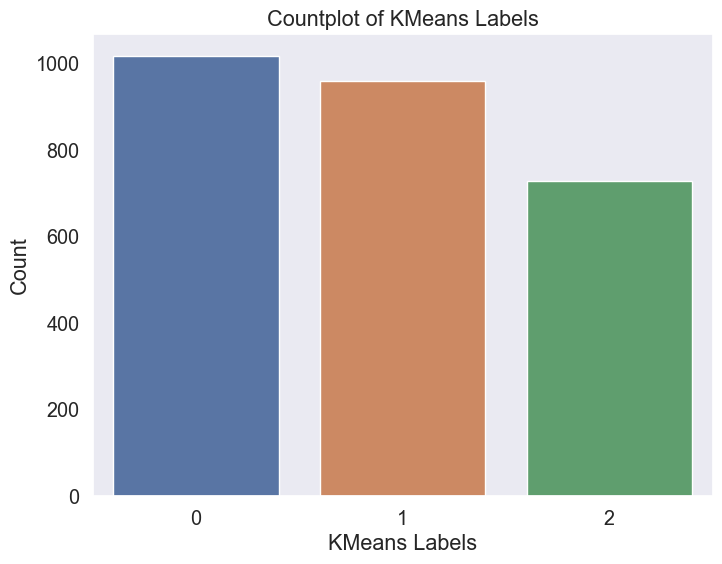

In [144]:
# Countplot of datapoints contained in each K-means label
plt.figure(figsize=(8, 6))
sns.countplot(x='K_Labels', data=tsne_df)
plt.title('Countplot of KMeans Labels')
plt.xlabel('KMeans Labels')
plt.ylabel('Count')
plt.show()

In [145]:
# Grouping labels based on feature means
display('After applying PCA and K-means Clustering on dataset:',df2.groupby(tsne_df['K_Labels']).agg(['mean']))

'After applying PCA and K-means Clustering on dataset:'

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
               mean              mean          mean    mean   
K_Labels                                                      
0                 0                 0         12621      99   
1                 0                 0        311579     109   
2                 0                 1           818     104   

         Days_to_Start_Business Energy_Usage          GDP Health_Exp_GDP  \
                           mean         mean         mean           mean   
K_Labels                                                                   
0                            46        11187  13031036403              0   
1                            29       138981 675841572184              0   
2                            43        10405   1290557467              0   

         Health_Exp_per_Capita Hours_to_do_Tax  ... Life_Expectancy_Female  \
                          mean            mean  ...                   mean   
K_Labels                                        ...                          
0                          622             292  ...                     69   
1                         1571             309  ...                     77   
2                          673             216  ...                     69   

         Life_Expectancy_Male Mobile_Phone_Usage Population_0_to_14  \
                         mean               mean               mean   
K_Labels                                                              
0                          64                  0                  0   
1                          71                  1                  0   
2                          65                  0                  0   

         Population_15_to_64 Population_above_65 Population_Total  \
                        mean                mean             mean   
K_Labels                                                            
0                          1                   0         10702352   
1                          1                   0         76040486   
2                          1                   0          1721710   

         Population_Urban Tourism_Inbound Tourism_Outbound  
                     mean            mean             mean  
K_Labels                                                    
0                       1       965523824        373665936  
1                       1     11193600387      10757581945  
2                       0       273979101         96874254  

[3 rows x 23 columns]

In [146]:
# Sort each column separately in ascending order based on mean values
mean_sorted_kmeans_tsne = df2.groupby(tsne_df['K_Labels']).agg(['mean'])
for col in mean_sorted_kmeans_tsne.columns:
    mean_sorted_kmeans_tsne = mean_sorted_kmeans_tsne.sort_values(by=col, ascending=True)
display(mean_sorted_kmeans_tsne)

Birth_Rate Business_Tax_Rate CO2_Emissions Country  \
               mean              mean          mean    mean   
K_Labels                                                      
2                 0                 1           818     104   
0                 0                 0         12621      99   
1                 0                 0        311579     109   

         Days_to_Start_Business Energy_Usage          GDP Health_Exp_GDP  \
                           mean         mean         mean           mean   
K_Labels                                                                   
2                            43        10405   1290557467              0   
0                            46        11187  13031036403              0   
1                            29       138981 675841572184              0   

         Health_Exp_per_Capita Hours_to_do_Tax  ... Life_Expectancy_Female  \
                          mean            mean  ...                   mean   
K_Labels                                        ...                          
2                          673             216  ...                     69   
0                          622             292  ...                     69   
1                         1571             309  ...                     77   

         Life_Expectancy_Male Mobile_Phone_Usage Population_0_to_14  \
                         mean               mean               mean   
K_Labels                                                              
2                          65                  0                  0   
0                          64                  0                  0   
1                          71                  1                  0   

         Population_15_to_64 Population_above_65 Population_Total  \
                        mean                mean             mean   
K_Labels                                                            
2                          1                   0          1721710   
0                          1                   0         10702352   
1                          1                   0         76040486   

         Population_Urban Tourism_Inbound Tourism_Outbound  
                     mean            mean             mean  
K_Labels                                                    
2                       0       273979101         96874254  
0                       1       965523824        373665936  
1                       1     11193600387      10757581945  

[3 rows x 23 columns]

In [147]:
# Sorting based on the mean values across all feature columns toghether
pd.set_option('display.float_format', lambda x: '%.0f' % x)
Total_mean_sorted_kmeans_tsne = df2.groupby(tsne_df['K_Labels']).agg(['mean']).mean(axis=1).sort_values(ascending=True)
Total_mean_sorted_kmeans_tsne

K_Labels
2      72310649
0     625258849
1   30342141206
dtype: float64

In [158]:
# KMeans Model Silhouette score using tsne
k_sil3 = silhouette_score(tsne_df,k_labels)
k_sil3

0.3769841832313171

In [161]:
# Silhouette score of all models
data = {
    'Model': ['KMeans (with outliers)', 'Hierarchical (with outliers)', 'DBSCAN (with outliers)',
              'KMeans (without outliers)', 'Hierarchical (without outliers)', 'DBSCAN (without outliers)',
              'KMeans (using tsne)'],
    'Silhouette_Score': [
        silhouette_score(pca_scaled_df, kmeans_labels),
        silhouette_score(pca_scaled_df, hier_labels),
        silhouette_score(pca_scaled_df, dbscan_labels),
        silhouette_score(pca_scaled_out_df, kmeans_out_labels),
        silhouette_score(pca_scaled_out_df, hier_out_labels),
        silhouette_score(pca_scaled_out_df, dbscan_out_labels),
        silhouette_score(tsne_df, k_labels)
    ]
}
print("Silhouette Scores:")
for model, score in zip(silhouette_df['Model'], silhouette_df['Silhouette_Score']):
    print(f"{model}: {score}")

Silhouette Scores:
KMeans (with outliers): 0.32493673936511963
Hierarchical (with outliers): 0.31840231445062855
DBSCAN (with outliers): 0.514099066312746
KMeans (without outliers): 0.3061635626247171
Hierarchical (without outliers): 0.2990512327439315
DBSCAN (without outliers): 0.023496470494555645
KMeans (using tsne): 0.3769841832313171
